In [1]:
 #Importing Necessary Modules
#--------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split

# Data loading

In [2]:
#getting the current path 
# Import the os module
import os

# Get the current working directory
cwd = os.getcwd()

In [3]:
cwd

'/Users/Kumar/Desktop/Life-expectency-prediction-model'

In [4]:
# Loading the data
#-------------------------------------
df = pd.read_csv('/Users/Kumar/Desktop/Life-expectency-prediction-model/Life Expectancy Data 2.csv')
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

# Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# lets describe each and every  variables in the dataset 
#Variable Descriptions
#country (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo)
#year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)
#status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards
#life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year
#adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%
#infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants
#alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
#percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)
#hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
#measles (Ratio) - number of reported Measles cases per 1000 population
#bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population
#under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population
#polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population
#total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure
#diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
#hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births
#gdp (Ratio) - Gross Domestic Product per capita
#population (Ratio) - population of a country
#thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)
#thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9
#income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
#schooling (Ratio) - average number of years of schooling of a population
#As previously indicated, changing the name of the variable thinness 1-19 years to thinness 10-19 years would be beneficial because it is a more true representation of what the variable signifies.

In [6]:
#lets divide the data into numeric columns and categorical columns

In [7]:
df_numeric = df.select_dtypes(np.number)

In [8]:
df_categorical = df.select_dtypes(include=['object']).columns

In [9]:
df_categorical

Index(['Country', 'Status'], dtype='object')

In [10]:
# Categorical Variable 1 :: Country
distinct_countries = df['Country'].unique()
distinct_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [11]:
#We have observed that for some country names there are whitespaces inside, for the sake of smooth learning going forward we will remove this white spaces within the values.
def remove_whitespace(x):
    """
    Helper function to remove any blank space from a string
    x: a string
    """
    try:
        # Remove spaces inside of the string
        x = "".join(x.split())

    except:
        pass
    return x

In [12]:
df.Country = df.Country.apply(remove_whitespace)

In [13]:
distinct_countries = df['Country'].unique()
distinct_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'AntiguaandBarbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia(PlurinationalStateof)', 'BosniaandHerzegovina',
       'Botswana', 'Brazil', 'BruneiDarussalam', 'Bulgaria',
       'BurkinaFaso', 'Burundi', "Côted'Ivoire", 'CaboVerde', 'Cambodia',
       'Cameroon', 'Canada', 'CentralAfricanRepublic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'CookIslands',
       'CostaRica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "DemocraticPeople'sRepublicofKorea",
       'DemocraticRepublicoftheCongo', 'Denmark', 'Djibouti', 'Dominica',
       'DominicanRepublic', 'Ecuador', 'Egypt', 'ElSalvador',
       'EquatorialGuinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Gren

In [14]:
# Categorical Variable 2 :: Status
distinct_status = df['Status'].unique()
distinct_status

array(['Developing', 'Developed'], dtype=object)

In [15]:
# Categorical Variable 2 :: Status
distinct_status = df['Status'].unique()
distinct_status

array(['Developing', 'Developed'], dtype=object)

In [16]:
#Changing column names
#------------------------
orig_cols = list(df.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').replace('-', '_').lower())
    
df.columns = new_cols
df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)
df.head(2)

country  year      status  life_expectancy  adult_mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   

   infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   

   polio  total_expenditure  diphtheria  hiv/aids         gdp  population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   

   thinness_1_19_years  thinness_5_9_years  income_composition_of_resources  \
0                 17.2                17.3                            0.479   
1                 17.5                17.5                            0.476   

   schooling  
0       10.1  
1       10.0  

[2 rows x 22 columns]

In [17]:
df.describe().iloc[:, 1:]

life_expectancy  adult_mortality  infant_deaths      alcohol  \
count      2928.000000      2928.000000    2938.000000  2744.000000   
mean         69.224932       164.796448      30.303948     4.602861   
std           9.523867       124.292079     117.926501     4.052413   
min          36.300000         1.000000       0.000000     0.010000   
25%          63.100000        74.000000       0.000000     0.877500   
50%          72.100000       144.000000       3.000000     3.755000   
75%          75.700000       228.000000      22.000000     7.702500   
max          89.000000       723.000000    1800.000000    17.870000   

       percentage_expenditure  hepatitis_b        measles          bmi  \
count             2938.000000  2385.000000    2938.000000  2904.000000   
mean               738.251295    80.940461    2419.592240    38.321247   
std               1987.914858    25.070016   11467.272489    20.044034   
min                  0.000000     1.000000       0.000000     1.000000   
25%                  4.685343    77.000000       0.000000    19.300000   
50%                 64.912906    92.000000      17.000000    43.500000   
75%                441.534144    97.000000     360.250000    56.200000   
max              19479.911610    99.000000  212183.000000    87.300000   

       under_five_deaths        polio  total_expenditure   diphtheria  \
count        2938.000000  2919.000000         2712.00000  2919.000000   
mean           42.035739    82.550188            5.93819    82.324084   
std           160.445548    23.428046            2.49832    23.716912   
min             0.000000     3.000000            0.37000     2.000000   
25%             0.000000    78.000000            4.26000    78.000000   
50%             4.000000    93.000000            5.75500    93.000000   
75%            28.000000    97.000000            7.49250    97.000000   
max          2500.000000    99.000000           17.60000    99.000000   

          hiv/aids            gdp    population  thinness_1_19_years  \
count  2938.000000    2490.000000  2.286000e+03          2904.000000   
mean      1.742103    7483.158469  1.275338e+07             4.839704   
std       5.077785   14270.169342  6.101210e+07             4.420195   
min       0.100000       1.681350  3.400000e+01             0.100000   
25%       0.100000     463.935626  1.957932e+05             1.600000   
50%       0.100000    1766.947595  1.386542e+06             3.300000   
75%       0.800000    5910.806335  7.420359e+06             7.200000   
max      50.600000  119172.741800  1.293859e+09            27.700000   

       thinness_5_9_years  income_composition_of_resources    schooling  
count         2904.000000                      2771.000000  2775.000000  
mean             4.870317                         0.627551    11.992793  
std              4.508882                         0.210904     3.358920  
min              0.100000                         0.000000     0.000000  
25%              1.500000                         0.493000    10.100000  
50%              3.300000                         0.677000    12.300000  
75%              7.200000                         0.779000    14.300000  
max             28.600000                         0.948000    20.700000

# Handling missing values¶
##Let's check data type and null/nonnull values of dataset.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  polio               

In [19]:
df.nunique(axis=0)

country                             193
year                                 16
status                                2
life_expectancy                     362
adult_mortality                     425
infant_deaths                       209
alcohol                            1076
percentage_expenditure             2328
hepatitis_b                          87
measles                             958
bmi                                 608
under_five_deaths                   252
polio                                73
total_expenditure                   818
diphtheria                           81
hiv/aids                            200
gdp                                2490
population                         2278
thinness_1_19_years                 200
thinness_5_9_years                  207
income_composition_of_resources     625
schooling                           173
dtype: int64

In [20]:
print(df.isnull().sum())

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_1_19_years                 34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64


# From the above figure we cansee that the misssing values are small and dropping them would lead to loss of information
#we can impute the missing values by interpolation techniques or filling them with mean or median
#The columns with null values are Life_expectancy, Adult_mortality, Alcohol, Hepatitis B, BMI, Polio,Total_exp

# lets find out the outliers to decide to replace missing values with mean or median using boxplot

#-replce with mean if there are very few outliers
#-replace with median if there are outliers
#interpolation

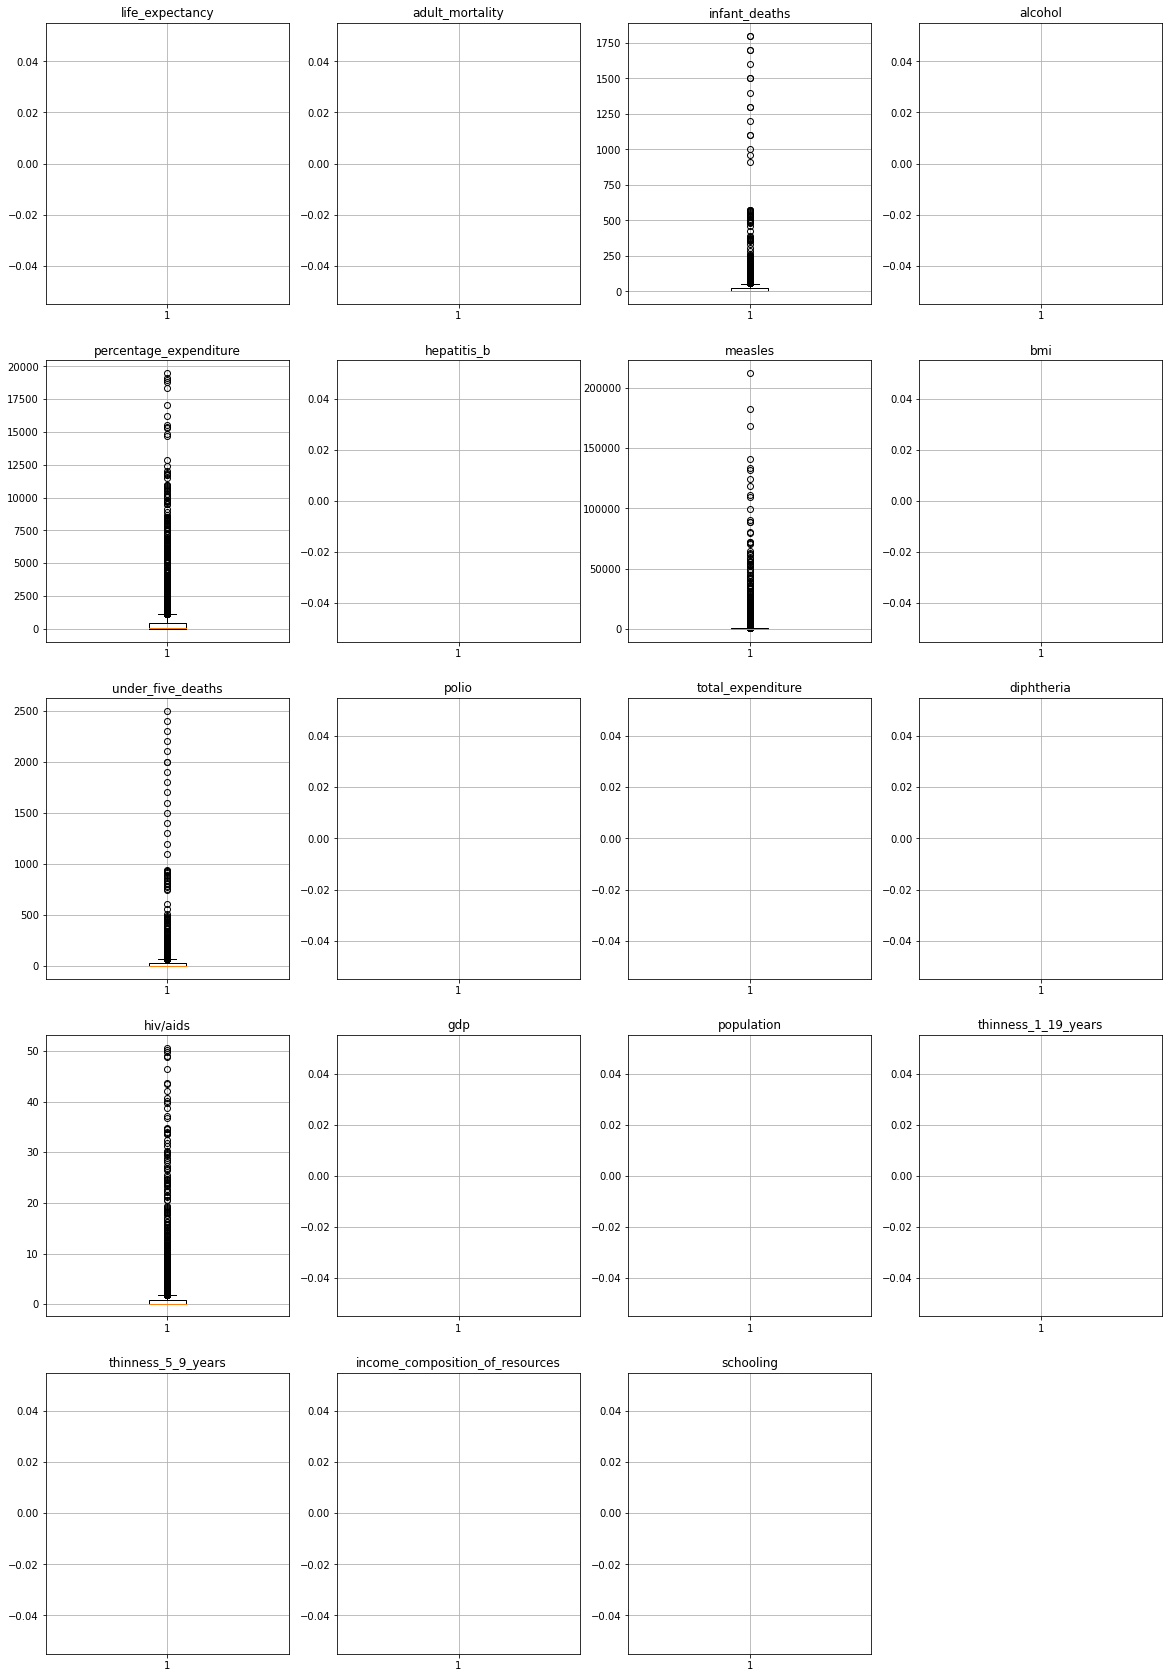

In [21]:

col_dict = {'life_expectancy':1,'adult_mortality':2,'infant_deaths':3,'alcohol':4,'percentage_expenditure':5,'hepatitis_b':6,'measles':7,'bmi':8,'under_five_deaths':9,'polio':10,'total_expenditure':11,'diphtheria':12,'hiv/aids':13,'gdp':14,'population':15,'thinness_1_19_years':16,'thinness_5_9_years':17,'income_composition_of_resources':18,'schooling':19}

# Detect outliers in each variable using box plots.
fig = plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable])
                     plt.title(variable)
                     plt.grid(True)
    
plt.show()

# As we have outliers it is not good to use replace missing values with the mean so we have two options

#lets try interpolation

In [22]:

df.groupby('country').apply(lambda group: group.interpolate(method= 'linear'))

country  year      status  life_expectancy  adult_mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

      ...  polio  total_expenditure  diphtheria  hiv/aids         gdp  \
0     ...    6.0               8.16        65.0       0.1  584.259210   
1     ...   58.0               8.18        62.0       0.1  612.696514   
2     ...   62.0               8.13        64.0       0.1  631.744976   
3     ...   67.0               8.52        67.0       0.1  669.959000   
4     ...   68.0               7.87        68.0       0.1   63.537231   
...   ...    ...                ...         ...       ...         ...   
2933  ...   67.0               7.13        65.0      33.6  454.366654   
2934  ...    7.0               6.52        68.0      36.7  453.351155   
2935  ...   73.0               6.53        71.0      39.8   57.348340   
2936  ...   76.0               6.16        75.0      42.1  548.587312   
2937  ...   78.0               7.10        78.0      43.5  547.358878   

      population  thinness_1_19_years  thinness_5_9_years  \
0     33736494.0                 17.2                17.3   
1       327582.0                 17.5                17.5   
2     31731688.0                 17.7                17.7   
3      3696958.0                 17.9                18.0   
4      2978599.0                 18.2                18.2   
...          ...                  ...                 ...   
2933  12777511.0                  9.4                 9.4   
2934  12633897.0                  9.8                 9.9   
2935    125525.0                  1.2                 1.3   
2936  12366165.0                  1.6                 1.7   
2937  12222251.0                 11.0                11.2   

      income_composition_of_resources  schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                     

In [23]:
print(df.isnull().sum())

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_1_19_years                 34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64


# well it didnt work because 
#1)countries data for null values ,might be zero
#2)The first value  might be null value and our method might not fill the first value
#next thing we can do is filling null values with median countrywise

In [24]:
imputed_data = []
for year in list(df.year.unique()):
    year_data = df[df.year == year].copy()
    for col in list(year_data.columns)[4:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    df.append(year_data)
    imputed_data.append(year_data)
df = pd.concat(imputed_data).copy()

In [25]:
df.isnull().sum()

country                             0
year                                0
status                              0
life_expectancy                    10
adult_mortality                     0
infant_deaths                       0
alcohol                             0
percentage_expenditure              0
hepatitis_b                         0
measles                             0
bmi                                 0
under_five_deaths                   0
polio                               0
total_expenditure                   0
diphtheria                          0
hiv/aids                            0
gdp                                 0
population                          0
thinness_1_19_years                 0
thinness_5_9_years                  0
income_composition_of_resources     0
schooling                           0
dtype: int64

In [26]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [27]:
df['life_expectancy'] = df['life_expectancy'].fillna(df['life_expectancy'].median())

In [28]:
df['life_expectancy'].isnull().sum()

0

In [29]:
df.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1_19_years                0
thinness_5_9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

# we have succesfully deleted the missing values by replacing with median

# dealing with oulliers

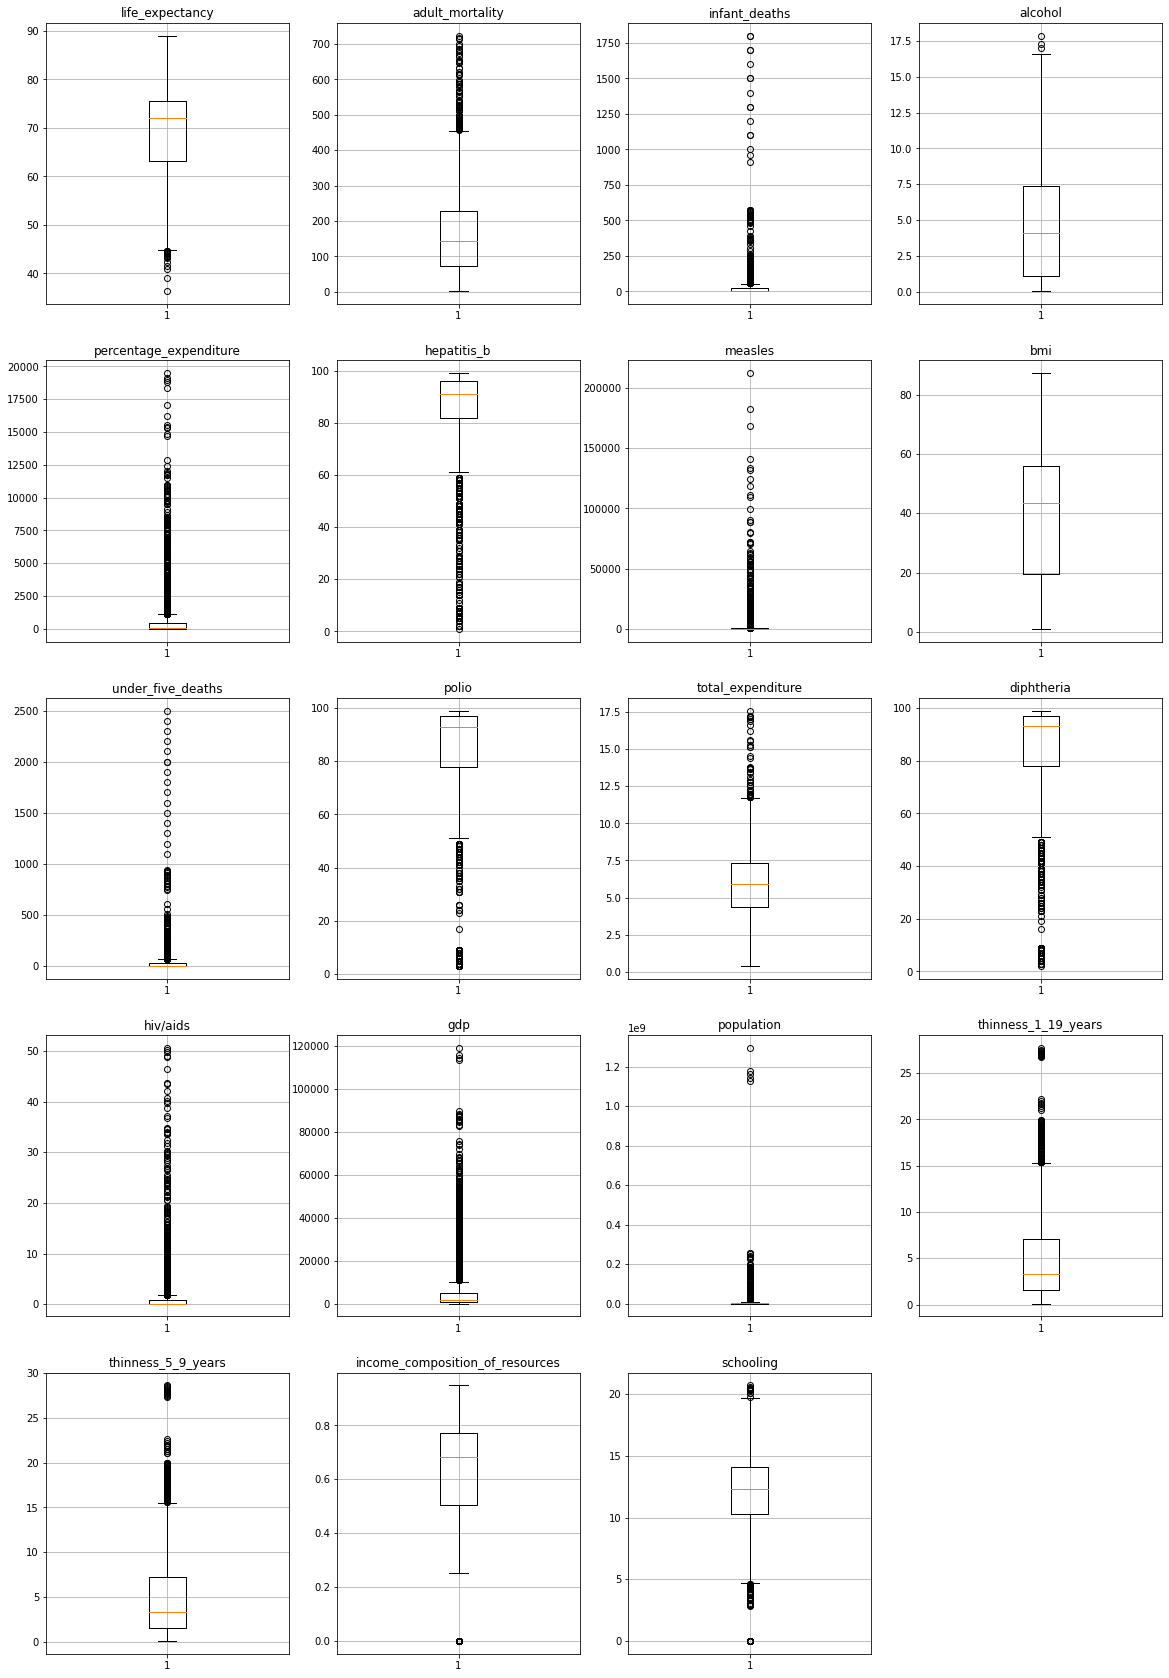

In [30]:
#dealing with oulliers
# Detect outliers in each variable using box plots.
fig = plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable])
                     plt.title(variable)
                     plt.grid(True)
    
plt.show()

In [31]:
#Infant_Deaths represents number of Infant Deaths per 1000 population. That is why number beyond 1000 is unrealistic. So we will remove them as outliers.

#Same applies to Measles and Under_five_deaths because both are number per 1000 population.
#The BMI values are very unrealistic  and more values are missing so lets drop that column 


In [32]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [33]:
df = df[df['infant_deaths'] < 1001]
df = df[df['measles'] < 1001]
df = df[df['under_five_deaths'] < 1001]


In [34]:
df.drop(['bmi'], axis=1, inplace=True)

In [35]:
df

country  year      status  life_expectancy  \
16                            Albania  2015  Developing             77.8   
32                            Algeria  2015  Developing             75.6   
48                             Angola  2015  Developing             52.4   
64                  AntiguaandBarbuda  2015  Developing             76.4   
80                          Argentina  2015  Developing             76.3   
...                               ...   ...         ...              ...   
2825                          Uruguay  2000  Developing             75.1   
2841                       Uzbekistan  2000  Developing             67.1   
2857                          Vanuatu  2000  Developing             69.0   
2873  Venezuela(BolivarianRepublicof)  2000  Developing             72.5   
2905                            Yemen  2000  Developing             68.0   

      adult_mortality  infant_deaths  alcohol  percentage_expenditure  \
16               74.0              0    4.600              364.975229   
32               19.0             21    5.285                0.000000   
48              335.0             66    5.285                0.000000   
64               13.0              0    5.285                0.000000   
80              116.0              8    5.285                0.000000   
...               ...            ...      ...                     ...   
2825            131.0              1    6.650              645.958382   
2841            189.0             30    1.600               48.509417   
2857             18.0              0    1.210               21.900752   
2873            168.0             11    8.010                0.000000   
2905            252.0             48    0.070                0.000000   

      hepatitis_b  measles  ...  polio  total_expenditure  diphtheria  \
16           99.0        0  ...   99.0               6.00        99.0   
32           95.0       63  ...   95.0               7.08        95.0   
48           64.0      118  ...    7.0               7.08        64.0   
64           99.0        0  ...   86.0               7.08        99.0   
80           94.0        0  ...   93.0               7.08        94.0   
...           ...      ...  ...    ...                ...         ...   
2825         92.0        0  ...   92.0               7.82         9.0   
2841         89.0       80  ...   99.0               5.29        99.0   
2857          7.0        9  ...   67.0               3.28        71.0   
2873          5.0       22  ...   86.0               4.91        77.0   
2905         14.0        0  ...   74.0               4.14        74.0   

      hiv/aids           gdp  population  thinness_1_19_years  \
16         0.1   3954.227830     28873.0                  1.2   
32         0.1   4132.762920  39871528.0                  6.0   
48         1.9   3695.793748   2785935.0                  8.3   
64         0.2  13566.954100   2076086.0                  3.3   
80         0.1  13467.123600  43417765.0                  1.0   
...        ...           ...         ...                  ...   
2825       0.1   6871.897677   3321245.0                  1.8   
2841       0.1    558.221144     24654.0                  3.4   
2857       0.1   1469.849149     18563.0                  1.7   
2873       0.1    828.989862   1243229.0                  1.8   
2905       0.1    828.989862   1243229.0                 14.1   

      thinness_5_9_years  income_composition_of_resources  schooling  
16                   1.3                            0.762       14.2  
32                   5.8                            0.743       14.4  
48                   8.2                            0.531       11.4  
64                   3.3                            0.784       13.9  
80                   0.9                            0.826       17.3  
...                  ...                              ...        ...  
2825                 1.7                            0.738       14.0  
2841          

In [36]:
y = df['life_expectancy']
X = df.drop(['life_expectancy'], axis=1)


In [37]:
# dependent variables or responses
X

country  year      status  adult_mortality  \
16                            Albania  2015  Developing             74.0   
32                            Algeria  2015  Developing             19.0   
48                             Angola  2015  Developing            335.0   
64                  AntiguaandBarbuda  2015  Developing             13.0   
80                          Argentina  2015  Developing            116.0   
...                               ...   ...         ...              ...   
2825                          Uruguay  2000  Developing            131.0   
2841                       Uzbekistan  2000  Developing            189.0   
2857                          Vanuatu  2000  Developing             18.0   
2873  Venezuela(BolivarianRepublicof)  2000  Developing            168.0   
2905                            Yemen  2000  Developing            252.0   

      infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  \
16                0    4.600              364.975229         99.0        0   
32               21    5.285                0.000000         95.0       63   
48               66    5.285                0.000000         64.0      118   
64                0    5.285                0.000000         99.0        0   
80                8    5.285                0.000000         94.0        0   
...             ...      ...                     ...          ...      ...   
2825              1    6.650              645.958382         92.0        0   
2841             30    1.600               48.509417         89.0       80   
2857              0    1.210               21.900752          7.0        9   
2873             11    8.010                0.000000          5.0       22   
2905             48    0.070                0.000000         14.0        0   

      under_five_deaths  polio  total_expenditure  diphtheria  hiv/aids  \
16                    0   99.0               6.00        99.0       0.1   
32                   24   95.0               7.08        95.0       0.1   
48                   98    7.0               7.08        64.0       1.9   
64                    0   86.0               7.08        99.0       0.2   
80                    9   93.0               7.08        94.0       0.1   
...                 ...    ...                ...         ...       ...   
2825                  1   92.0               7.82         9.0       0.1   
2841                 36   99.0               5.29        99.0       0.1   
2857                  0   67.0               3.28        71.0       0.1   
2873                 13   86.0               4.91        77.0       0.1   
2905                 66   74.0               4.14        74.0       0.1   

               gdp  population  thinness_1_19_years  thinness_5_9_years  \
16     3954.227830     28873.0                  1.2                 1.3   
32     4132.762920  39871528.0                  6.0                 5.8   
48     3695.793748   2785935.0                  8.3                 8.2   
64    13566.954100   2076086.0                  3.3                 3.3   
80    13467.123600  43417765.0                  1.0                 0.9   
...            ...         ...                  ...                 ...   
2825   6871.897677   3321245.0                  1.8                 1.7   
2841    558.221144     24654.0                  3.4                 3.4   
2857   1469.849149     18563.0                  1.7                 1.7   
2873    828.989862   1243229.0                  1.8                 1.7   
2905    828.989862   1243229.0                 14.1                14.1   

      income_composition_of_resources  schooling  
16                              0.762       14.2  
32                              0.743       14.4  
48                              0.531       11.4  
64                              0.784       13.9  
80                              0.826       17.3  
...                               ...        ...  
2825                 

In [38]:
y 

16      77.8
32      75.6
48      52.4
64      76.4
80      76.3
        ... 
2825    75.1
2841    67.1
2857    69.0
2873    72.5
2905    68.0
Name: life_expectancy, Length: 2413, dtype: float64

# categorical features and numerical ones are going to be treated differently.
# we split every column except the target in numerical and categorical

In [39]:

X_train_num = X.select_dtypes(include = np.number)
X_train_cat = X.select_dtypes(include = object)

In [40]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_train_num)
x_normalized = MinMaxtransformer.transform(X_train_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized,columns=X_train_num.columns)
x_normalized.head()
x_normalized

(2413, 18)


year  adult_mortality  infant_deaths   alcohol  percentage_expenditure  \
0      1.0         0.101108       0.000000  0.256999                0.018736   
1      1.0         0.024931       0.038251  0.295353                0.000000   
2      1.0         0.462604       0.120219  0.295353                0.000000   
3      1.0         0.016620       0.000000  0.295353                0.000000   
4      1.0         0.159280       0.014572  0.295353                0.000000   
...    ...              ...            ...       ...                     ...   
2408   0.0         0.180055       0.001821  0.371781                0.033160   
2409   0.0         0.260388       0.054645  0.089026                0.002490   
2410   0.0         0.023546       0.000000  0.067189                0.001124   
2411   0.0         0.231302       0.020036  0.447928                0.000000   
2412   0.0         0.347645       0.087432  0.003359                0.000000   

      hepatitis_b   measles  under_five_deaths     polio  total_expenditure  \
0        1.000000  0.000000           0.000000  1.000000           0.326756   
1        0.958763  0.063063           0.027304  0.958333           0.389437   
2        0.639175  0.118118           0.111490  0.041667           0.389437   
3        1.000000  0.000000           0.000000  0.864583           0.389437   
4        0.948454  0.000000           0.010239  0.937500           0.389437   
...           ...       ...                ...       ...                ...   
2408     0.927835  0.000000           0.001138  0.927083           0.432385   
2409     0.896907  0.080080           0.040956  1.000000           0.285548   
2410     0.051546  0.009009           0.000000  0.666667           0.168891   
2411     0.030928  0.022022           0.014790  0.864583           0.263494   
2412     0.123711  0.000000           0.075085  0.739583           0.218804   

      diphtheria  hiv/aids       gdp  population  thinness_1_19_years  \
0       1.000000  0.000000  0.033135    0.000145             0.056122   
1       0.958763  0.000000  0.034633    0.200675             0.301020   
2       0.639175  0.035644  0.030966    0.014022             0.418367   
3       1.000000  0.001980  0.113801    0.010449             0.163265   
4       0.948454  0.000000  0.112963    0.218524             0.045918   
...          ...       ...       ...         ...                  ...   
2408    0.072165  0.000000  0.057619    0.016716             0.086735   
2409    1.000000  0.000000  0.004637    0.000124             0.168367   
2410    0.711340  0.000000  0.012287    0.000093             0.081633   
2411    0.773196  0.000000  0.006909    0.006257             0.086735   
2412    0.742268  0.000000  0.006909    0.006257             0.714286   

      thinness_5_9_years  income_composition_of_resources  schooling  
0               0.060606                         0.803797   0.685990  
1               0.287879                         0.783755   0.695652  
2               0.409091                         0.560127   0.550725  
3               0.161616                         0.827004   0.671498  
4               0.040404                         0.871308   0.835749  
...                  ...                              ...        ...  
2408            0.080808                         0.778481   0.676329  
2409            0.166667                         0.000000   0.512077  
2410            0.080808                         0.000000   0.463768  
2411            0.080808                         0.706751   0.512077  
2412            0.707071                         0.459916   0.371981  

[2413 rows x 18 columns]

In [41]:
X_train_cat = X.select_dtypes(include = 'object')
X_train_cat

country      status
16                            Albania  Developing
32                            Algeria  Developing
48                             Angola  Developing
64                  AntiguaandBarbuda  Developing
80                          Argentina  Developing
...                               ...         ...
2825                          Uruguay  Developing
2841                       Uzbekistan  Developing
2857                          Vanuatu  Developing
2873  Venezuela(BolivarianRepublicof)  Developing
2905                            Yemen  Developing

[2413 rows x 2 columns]

In [42]:
#One Hot/Label Encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names(input_features=X_train_cat.columns)
onehot_encoded= pd.DataFrame(encoded, columns=cols)
onehot_encoded#.head()

country_Albania  country_Algeria  country_Angola  \
0                 1.0              0.0             0.0   
1                 0.0              1.0             0.0   
2                 0.0              0.0             1.0   
3                 0.0              0.0             0.0   
4                 0.0              0.0             0.0   
...               ...              ...             ...   
2408              0.0              0.0             0.0   
2409              0.0              0.0             0.0   
2410              0.0              0.0             0.0   
2411              0.0              0.0             0.0   
2412              0.0              0.0             0.0   

      country_AntiguaandBarbuda  country_Argentina  country_Armenia  \
0                           0.0                0.0              0.0   
1                           0.0                0.0              0.0   
2                           0.0                0.0              0.0   
3                           1.0                0.0              0.0   
4                           0.0                1.0              0.0   
...                         ...                ...              ...   
2408                        0.0                0.0              0.0   
2409                        0.0                0.0              0.0   
2410                        0.0                0.0              0.0   
2411                        0.0                0.0              0.0   
2412                        0.0                0.0              0.0   

      country_Australia  country_Austria  country_Azerbaijan  country_Bahamas  \
0                   0.0              0.0                 0.0              0.0   
1                   0.0              0.0                 0.0              0.0   
2                   0.0              0.0                 0.0              0.0   
3                   0.0              0.0                 0.0              0.0   
4                   0.0              0.0                 0.0              0.0   
...                 ...              ...                 ...              ...   
2408                0.0              0.0                 0.0              0.0   
2409                0.0              0.0                 0.0              0.0   
2410                0.0              0.0                 0.0              0.0   
2411                0.0              0.0                 0.0              0.0   
2412                0.0              0.0                 0.0              0.0   

      ...  country_UnitedStatesofAmerica  country_Uruguay  country_Uzbekistan  \
0     ...                            0.0              0.0                 0.0   
1     ...                            0.0              0.0                 0.0   
2     ...                            0.0              0.0                 0.0   
3     ...                            0.0              0.0                 0.0   
4     ...                            0.0              0.0                 0.0   
...   ...                            ...              ...                 ...   
2408  ...                            0.0              1.0                 0.0   
2409  ...                            0.0              0.0                 1.0   
2410  ...                            0.0              0.0                 0.0   
2411  ...                            0.0              0.0                 0.0   
2412  ...                            0.0              0.0                 0.0   

      country_Vanuatu  country_Venezuela(BolivarianRepublicof)  \
0                 0.0                                      0.0   
1                 0.0                                      0.0   
2                 0.0                                      0.0   
3                 0.0                                      0.0   
4                 0.0                                      0.0   
...               ...                                      ...   
2408              0.0                           

# Concat DataFrames

In [43]:
#Concat DataFrames
X_train_concat = pd.merge(X_train_num.reset_index(drop=True), onehot_encoded.reset_index(drop=True), right_index= True, left_index= True)
X_train_concat

year  adult_mortality  infant_deaths  alcohol  percentage_expenditure  \
0     2015             74.0              0    4.600              364.975229   
1     2015             19.0             21    5.285                0.000000   
2     2015            335.0             66    5.285                0.000000   
3     2015             13.0              0    5.285                0.000000   
4     2015            116.0              8    5.285                0.000000   
...    ...              ...            ...      ...                     ...   
2408  2000            131.0              1    6.650              645.958382   
2409  2000            189.0             30    1.600               48.509417   
2410  2000             18.0              0    1.210               21.900752   
2411  2000            168.0             11    8.010                0.000000   
2412  2000            252.0             48    0.070                0.000000   

      hepatitis_b  measles  under_five_deaths  polio  total_expenditure  ...  \
0            99.0        0                  0   99.0               6.00  ...   
1            95.0       63                 24   95.0               7.08  ...   
2            64.0      118                 98    7.0               7.08  ...   
3            99.0        0                  0   86.0               7.08  ...   
4            94.0        0                  9   93.0               7.08  ...   
...           ...      ...                ...    ...                ...  ...   
2408         92.0        0                  1   92.0               7.82  ...   
2409         89.0       80                 36   99.0               5.29  ...   
2410          7.0        9                  0   67.0               3.28  ...   
2411          5.0       22                 13   86.0               4.91  ...   
2412         14.0        0                 66   74.0               4.14  ...   

      country_UnitedStatesofAmerica  country_Uruguay  country_Uzbekistan  \
0                               0.0              0.0                 0.0   
1                               0.0              0.0                 0.0   
2                               0.0              0.0                 0.0   
3                               0.0              0.0                 0.0   
4                               0.0              0.0                 0.0   
...                             ...              ...                 ...   
2408                            0.0              1.0                 0.0   
2409                            0.0              0.0                 1.0   
2410                            0.0              0.0                 0.0   
2411                            0.0              0.0                 0.0   
2412                            0.0              0.0                 0.0   

      country_Vanuatu  country_Venezuela(BolivarianRepublicof)  \
0                 0.0                                      0.0   
1                 0.0                                      0.0   
2                 0.0                                      0.0   
3                 0.0                                      0.0   
4                 0.0                                      0.0   
...               ...                                      ...   
2408              0.0                                      0.0   
2409              0.0                                      0.0   
2410              1.0                                      0.0   
2411              0.0                                      1.0   
2412              0.0                                      0.0   

      country_VietNam  country_Yemen  country_Zambia  country_Zimbabwe  \
0                 0.0            0.0             0.0               0.0   
1                 0.0            0.0             0.0               0.0   
2                 0.0            0.0             0.0               0.0   
3                 0.0            0.0             0.0               0.0   
4                 0.

In [44]:
# independent variables or predictors
X = X_train_concat.copy()

In [45]:
X.shape

(2413, 208)

In [46]:
# dependent variables or responses
y
y.shape

(2413,)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1930, 208)
(483, 208)
(1930,)
(483,)


In [49]:
print(x_normalized.shape)

(2413, 18)


In [50]:
# dependent variables or responses

y.shape

(2413,)

In [51]:
newdf = pd.DataFrame(X_train_concat)

In [52]:
newdf.columns = X.columns

In [53]:
newdf

year  adult_mortality  infant_deaths  alcohol  percentage_expenditure  \
0     2015             74.0              0    4.600              364.975229   
1     2015             19.0             21    5.285                0.000000   
2     2015            335.0             66    5.285                0.000000   
3     2015             13.0              0    5.285                0.000000   
4     2015            116.0              8    5.285                0.000000   
...    ...              ...            ...      ...                     ...   
2408  2000            131.0              1    6.650              645.958382   
2409  2000            189.0             30    1.600               48.509417   
2410  2000             18.0              0    1.210               21.900752   
2411  2000            168.0             11    8.010                0.000000   
2412  2000            252.0             48    0.070                0.000000   

      hepatitis_b  measles  under_five_deaths  polio  total_expenditure  ...  \
0            99.0        0                  0   99.0               6.00  ...   
1            95.0       63                 24   95.0               7.08  ...   
2            64.0      118                 98    7.0               7.08  ...   
3            99.0        0                  0   86.0               7.08  ...   
4            94.0        0                  9   93.0               7.08  ...   
...           ...      ...                ...    ...                ...  ...   
2408         92.0        0                  1   92.0               7.82  ...   
2409         89.0       80                 36   99.0               5.29  ...   
2410          7.0        9                  0   67.0               3.28  ...   
2411          5.0       22                 13   86.0               4.91  ...   
2412         14.0        0                 66   74.0               4.14  ...   

      country_UnitedStatesofAmerica  country_Uruguay  country_Uzbekistan  \
0                               0.0              0.0                 0.0   
1                               0.0              0.0                 0.0   
2                               0.0              0.0                 0.0   
3                               0.0              0.0                 0.0   
4                               0.0              0.0                 0.0   
...                             ...              ...                 ...   
2408                            0.0              1.0                 0.0   
2409                            0.0              0.0                 1.0   
2410                            0.0              0.0                 0.0   
2411                            0.0              0.0                 0.0   
2412                            0.0              0.0                 0.0   

      country_Vanuatu  country_Venezuela(BolivarianRepublicof)  \
0                 0.0                                      0.0   
1                 0.0                                      0.0   
2                 0.0                                      0.0   
3                 0.0                                      0.0   
4                 0.0                                      0.0   
...               ...                                      ...   
2408              0.0                                      0.0   
2409              0.0                                      0.0   
2410              1.0                                      0.0   
2411              0.0                                      1.0   
2412              0.0                                      0.0   

      country_VietNam  country_Yemen  country_Zambia  country_Zimbabwe  \
0                 0.0            0.0             0.0               0.0   
1                 0.0            0.0             0.0               0.0   
2                 0.0            0.0             0.0               0.0   
3                 0.0            0.0             0.0               0.0   
4                 0.

In [56]:
df.corr()

year  life_expectancy  adult_mortality  \
year                             1.000000         0.107639        -0.064023   
life_expectancy                  0.107639         1.000000        -0.715559   
adult_mortality                 -0.064023        -0.715559         1.000000   
infant_deaths                    0.018111        -0.392813         0.281732   
alcohol                         -0.089815         0.399256        -0.190442   
percentage_expenditure           0.018897         0.380094        -0.241081   
hepatitis_b                      0.042406         0.157648        -0.124690   
measles                         -0.011958        -0.206265         0.138337   
under_five_deaths                0.011966        -0.424943         0.304417   
polio                            0.038424         0.376815        -0.245487   
total_expenditure                0.093097         0.200565        -0.114551   
diphtheria                       0.078748         0.386250        -0.236730   
hiv/aids                        -0.113317        -0.566456         0.529402   
gdp                              0.083294         0.426623        -0.279610   
population                       0.032442         0.026010         0.012165   
thinness_1_19_years              0.007417        -0.519366         0.368370   
thinness_5_9_years               0.008749        -0.521943         0.373717   
income_composition_of_resources  0.215795         0.675471        -0.451907   
schooling                        0.153900         0.709358        -0.457631   

                                 infant_deaths   alcohol  \
year                                  0.018111 -0.089815   
life_expectancy                      -0.392813  0.399256   
adult_mortality                       0.281732 -0.190442   
infant_deaths                         1.000000 -0.189258   
alcohol                              -0.189258  1.000000   
percentage_expenditure               -0.138886  0.325231   
hepatitis_b                          -0.111806  0.072569   
measles                               0.308503 -0.142467   
under_five_deaths                     0.990513 -0.187782   
polio                                -0.215131  0.176594   
total_expenditure                    -0.057592  0.285403   
diphtheria                           -0.217287  0.185149   
hiv/aids                              0.140725 -0.066817   
gdp                                  -0.166038  0.291728   
population                            0.243327  0.058674   
thinness_1_19_years                   0.297053 -0.436402   
thinness_5_9_years                    0.310290 -0.423380   
income_composition_of_resources      -0.239067  0.417376   
schooling                            -0.316685  0.486623   

                                 percentage_expenditure  hepatitis_b  \
year                                           0.018897     0.042406   
life_expectancy                                0.380094     0.157648   
adult_mortality                               -0.241081    -0.124690   
infant_deaths                                 -0.138886    -0.111806   
alcohol                                        0.325231     0.072569   
percentage_expenditure                         1.000000     0.022965   
hepatitis_b                                    0.022965     1.000000   
measles                                        0.002001    -0.088388   
under_five_deaths                             -0.135932    -0.120616   
polio                                          0.121978     0.385338   
total_expenditure                              0.154580     0.038388   
diphtheria                                     0.117210     0.497436   
hiv/aids                                      -0.093052    -0.103485   
gdp                                            0.903084     0.063193   
population                                     0.029770    -0.028660   
thinness_1_19_years                           -0.259793    -0.028658   
thinness_5_9_years             

#  Treating outliers using IQR method

In [57]:
#def a feunction to find out the upperlimt and lower limit of each column pf thje dataset and replacing the dataset 
def find_boundaries(df,variables):
    
    #LETS find the IQR
    Q1 = df[variables].quantile(.25)
    Q3 = df[variables].quantile(.75)
    IQR = Q3-Q1
    lower_boundary = Q1 -1.5*IQR
    upper_boundary = Q3 +1.5*IQR
    
    return lower_boundary,upper_boundary

In [58]:
newdfnumeric = newdf.select_dtypes(np.number)

In [59]:
def win(x) :
    if x> upper_boundaries:
        
        return upper_boundaries
    elif x< lower_boundaries:
        return lower_boundaries
    else :
         return x

# box plot to represent dataset visually after removing outliers  

year 2024.0
year 1992.0


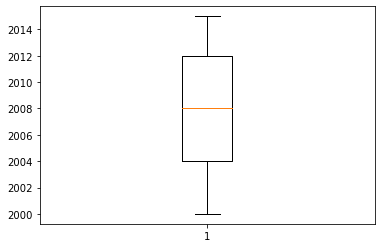

adult_mortality 429.5
adult_mortality -142.5


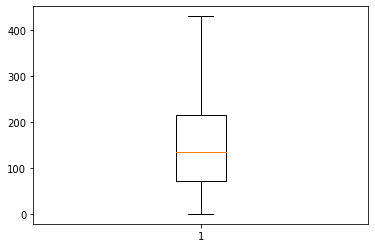

infant_deaths 25.0
infant_deaths -15.0


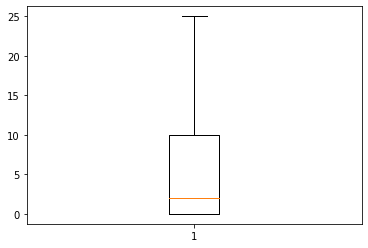

alcohol 17.285
alcohol -8.275


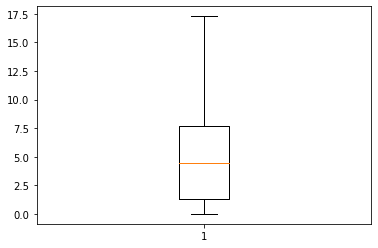

percentage_expenditure 1310.0768147019999
percentage_expenditure -776.50541117


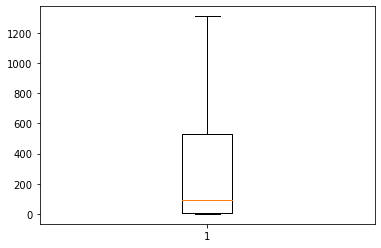

hepatitis_b 112.5
hepatitis_b 68.5


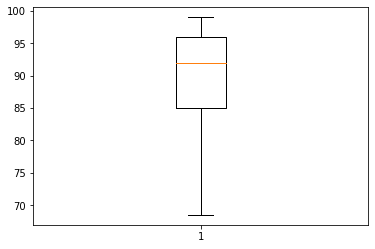

measles 165.0
measles -99.0


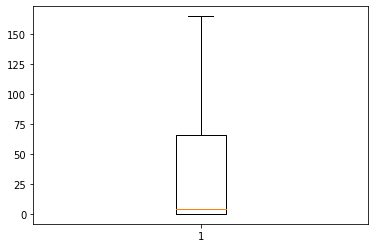

under_five_deaths 30.0
under_five_deaths -18.0


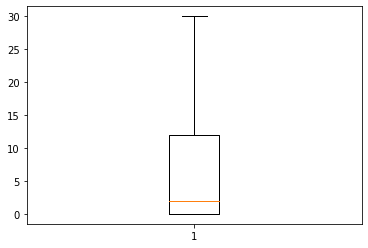

polio 116.5
polio 64.5


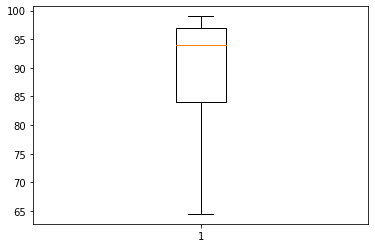

total_expenditure 11.865
total_expenditure 0.22499999999999964


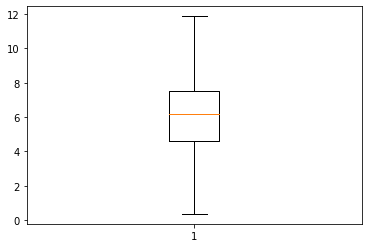

diphtheria 116.5
diphtheria 64.5


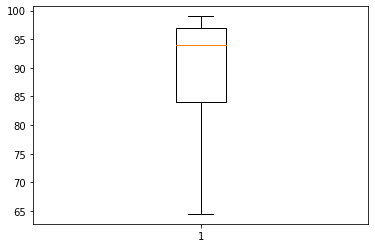

hiv/aids 0.8500000000000001
hiv/aids -0.3500000000000001


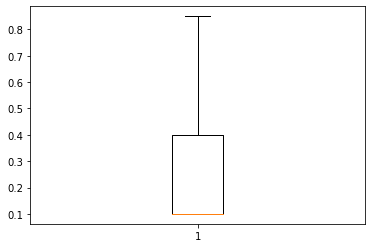

gdp 13181.856665
gdp -6731.149454999999


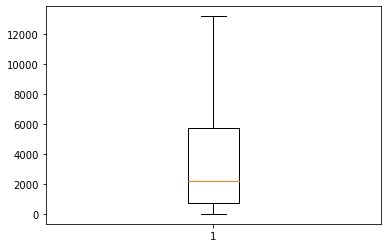

population 8300171.5
population -4456904.5


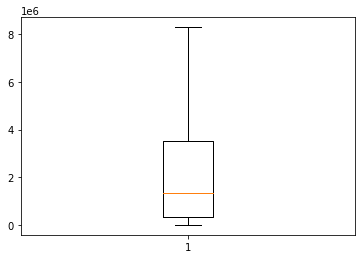

thinness_1_19_years 13.75
thinness_1_19_years -5.8500000000000005


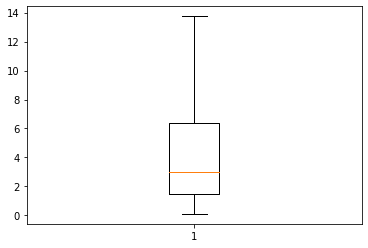

thinness_5_9_years 13.65
thinness_5_9_years -5.950000000000001


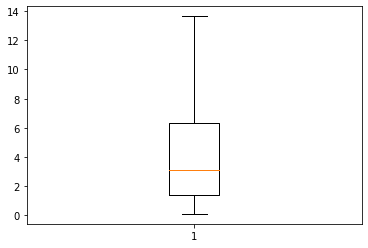

income_composition_of_resources 1.1365
income_composition_of_resources 0.20450000000000007


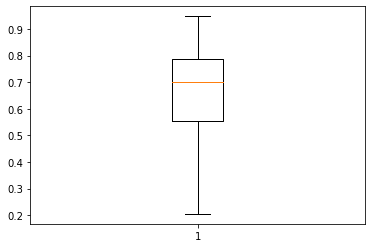

schooling 19.950000000000003
schooling 5.149999999999998


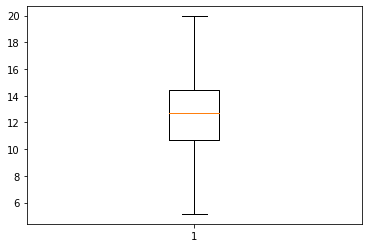

country_Albania 0.0
country_Albania 0.0


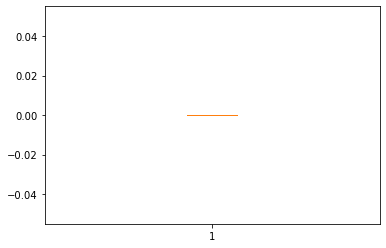

country_Algeria 0.0
country_Algeria 0.0


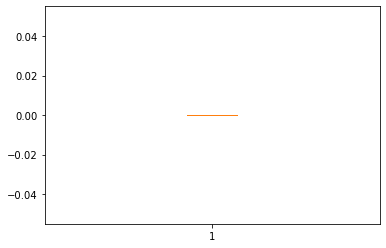

country_Angola 0.0
country_Angola 0.0


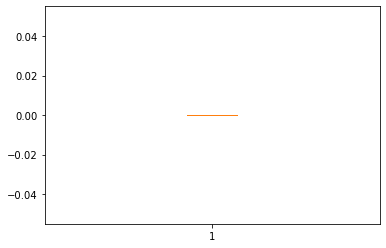

country_AntiguaandBarbuda 0.0
country_AntiguaandBarbuda 0.0


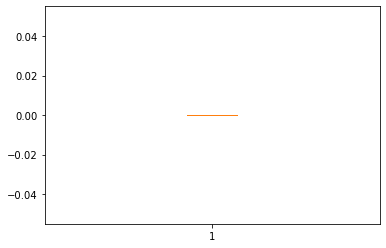

country_Argentina 0.0
country_Argentina 0.0


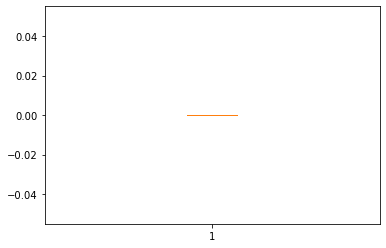

country_Armenia 0.0
country_Armenia 0.0


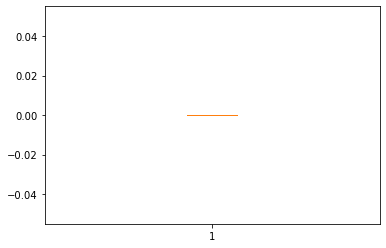

country_Australia 0.0
country_Australia 0.0


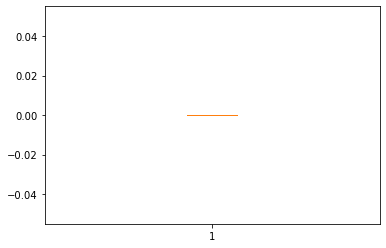

country_Austria 0.0
country_Austria 0.0


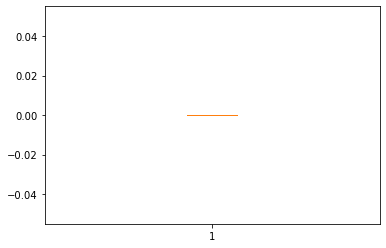

country_Azerbaijan 0.0
country_Azerbaijan 0.0


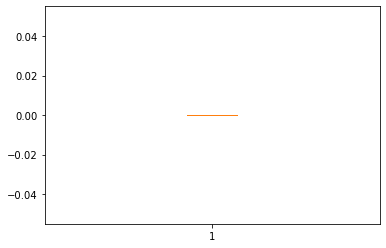

country_Bahamas 0.0
country_Bahamas 0.0


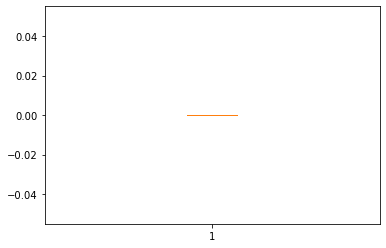

country_Bahrain 0.0
country_Bahrain 0.0


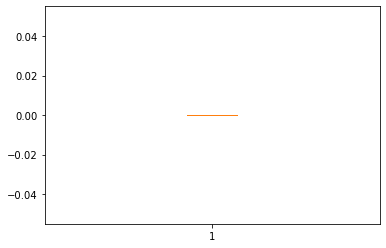

country_Bangladesh 0.0
country_Bangladesh 0.0


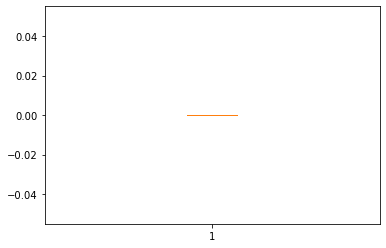

country_Barbados 0.0
country_Barbados 0.0


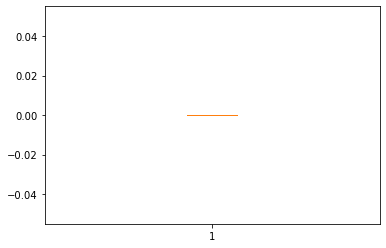

country_Belarus 0.0
country_Belarus 0.0


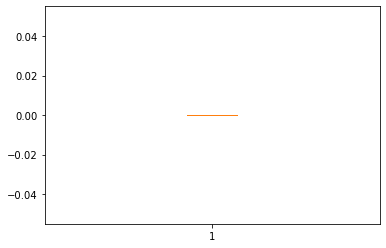

country_Belgium 0.0
country_Belgium 0.0


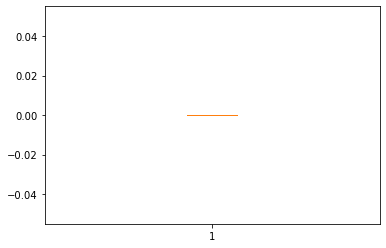

country_Belize 0.0
country_Belize 0.0


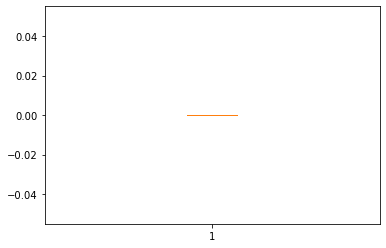

country_Benin 0.0
country_Benin 0.0


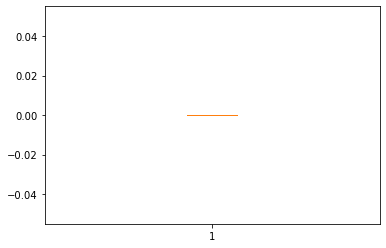

country_Bhutan 0.0
country_Bhutan 0.0


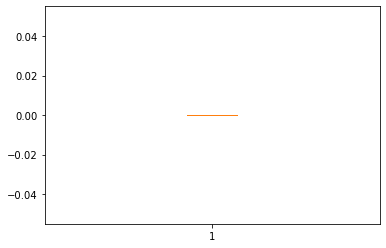

country_Bolivia(PlurinationalStateof) 0.0
country_Bolivia(PlurinationalStateof) 0.0


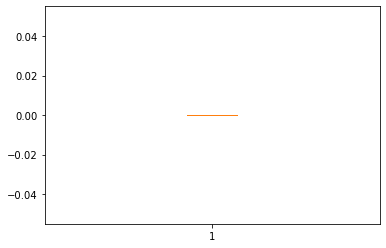

country_BosniaandHerzegovina 0.0
country_BosniaandHerzegovina 0.0


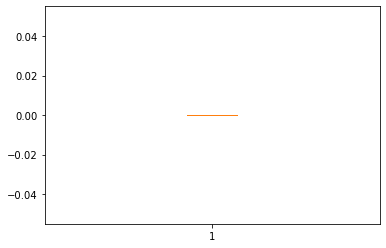

country_Botswana 0.0
country_Botswana 0.0


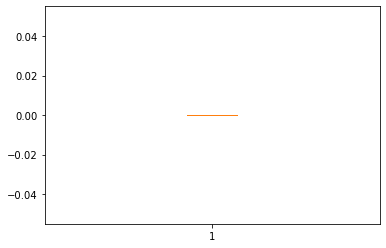

country_Brazil 0.0
country_Brazil 0.0


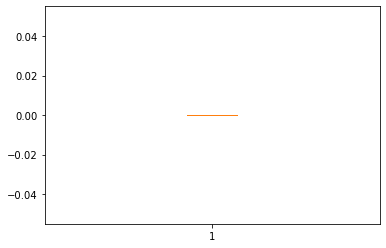

country_BruneiDarussalam 0.0
country_BruneiDarussalam 0.0


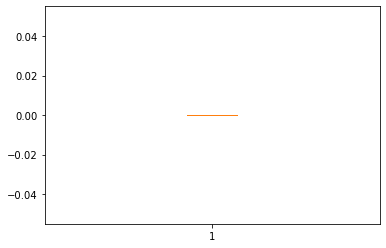

country_Bulgaria 0.0
country_Bulgaria 0.0


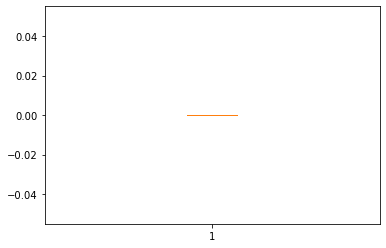

country_BurkinaFaso 0.0
country_BurkinaFaso 0.0


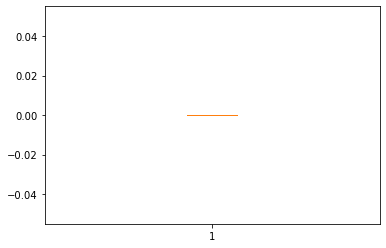

country_Burundi 0.0
country_Burundi 0.0


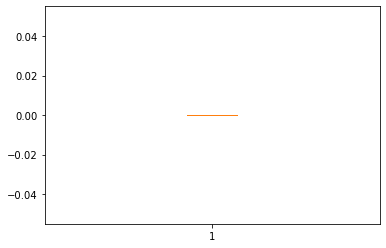

country_CaboVerde 0.0
country_CaboVerde 0.0


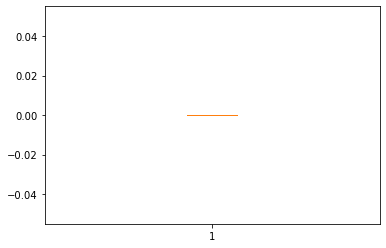

country_Cambodia 0.0
country_Cambodia 0.0


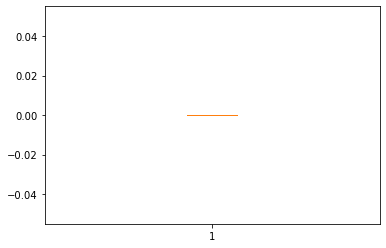

country_Cameroon 0.0
country_Cameroon 0.0


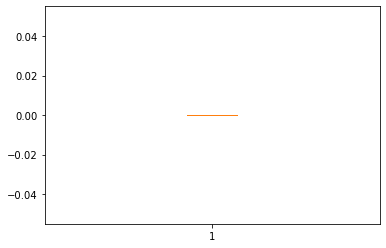

country_Canada 0.0
country_Canada 0.0


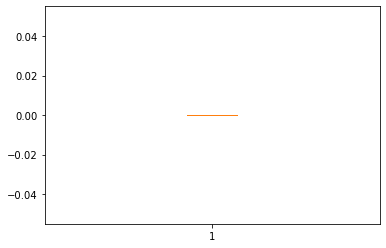

country_CentralAfricanRepublic 0.0
country_CentralAfricanRepublic 0.0


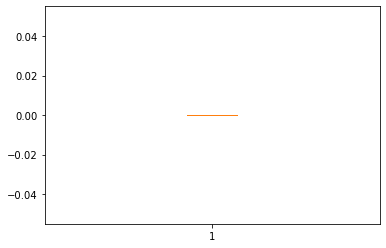

country_Chad 0.0
country_Chad 0.0


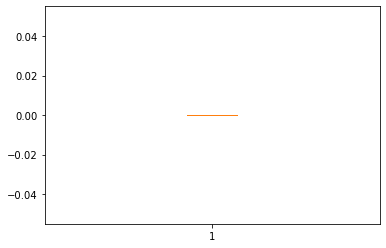

country_Chile 0.0
country_Chile 0.0


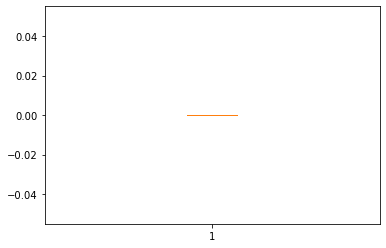

country_Colombia 0.0
country_Colombia 0.0


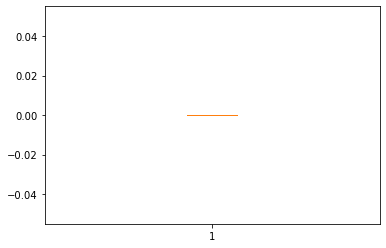

country_Comoros 0.0
country_Comoros 0.0


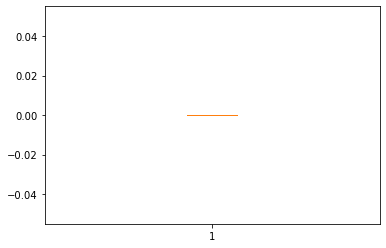

country_Congo 0.0
country_Congo 0.0


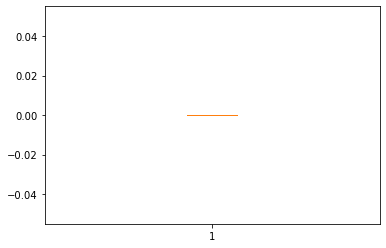

country_CookIslands 0.0
country_CookIslands 0.0


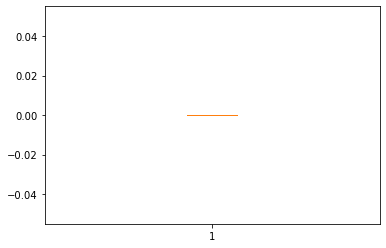

country_CostaRica 0.0
country_CostaRica 0.0


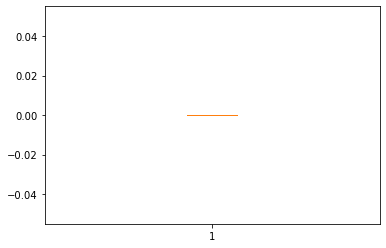

country_Croatia 0.0
country_Croatia 0.0


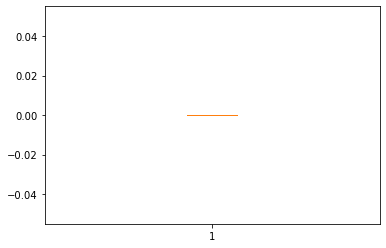

country_Cuba 0.0
country_Cuba 0.0


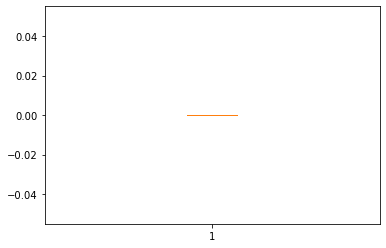

country_Cyprus 0.0
country_Cyprus 0.0


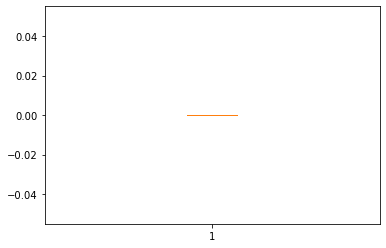

country_Czechia 0.0
country_Czechia 0.0


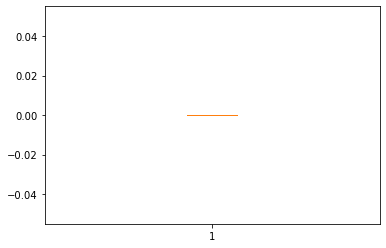

country_Côted'Ivoire 0.0
country_Côted'Ivoire 0.0


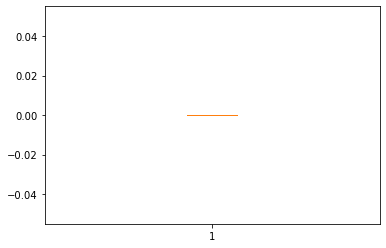

country_DemocraticPeople'sRepublicofKorea 0.0
country_DemocraticPeople'sRepublicofKorea 0.0


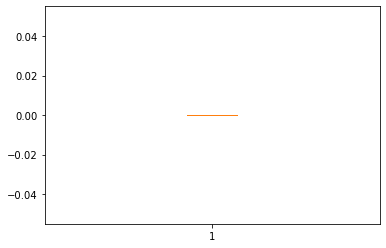

country_DemocraticRepublicoftheCongo 0.0
country_DemocraticRepublicoftheCongo 0.0


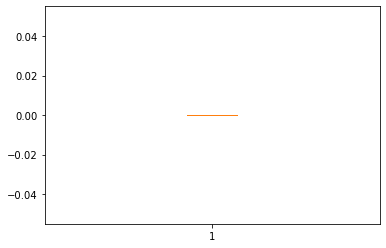

country_Denmark 0.0
country_Denmark 0.0


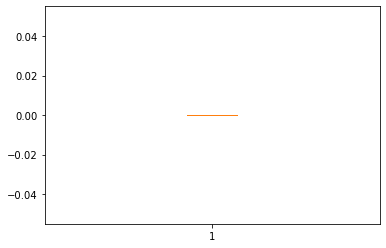

country_Djibouti 0.0
country_Djibouti 0.0


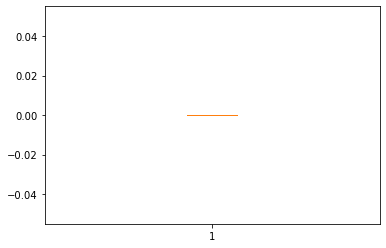

country_Dominica 0.0
country_Dominica 0.0


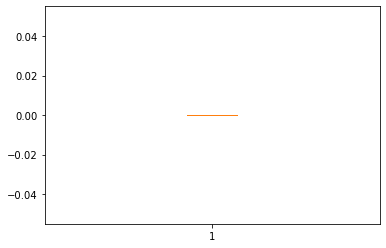

country_DominicanRepublic 0.0
country_DominicanRepublic 0.0


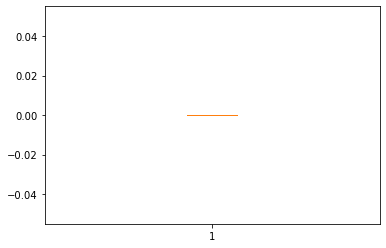

country_Ecuador 0.0
country_Ecuador 0.0


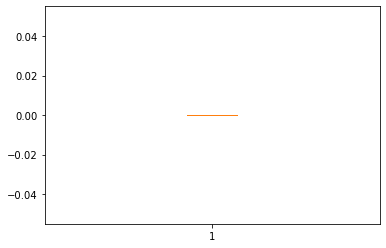

country_Egypt 0.0
country_Egypt 0.0


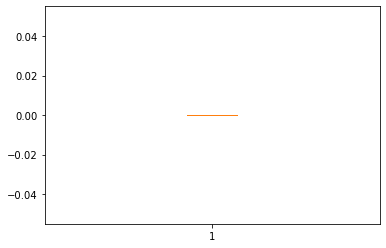

country_ElSalvador 0.0
country_ElSalvador 0.0


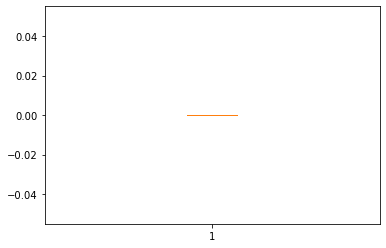

country_EquatorialGuinea 0.0
country_EquatorialGuinea 0.0


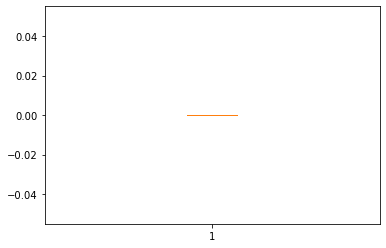

country_Eritrea 0.0
country_Eritrea 0.0


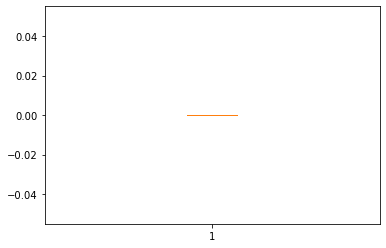

country_Estonia 0.0
country_Estonia 0.0


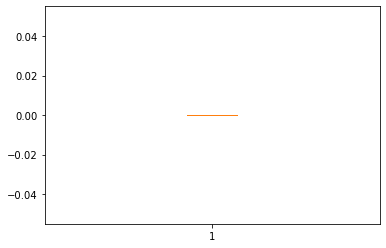

country_Ethiopia 0.0
country_Ethiopia 0.0


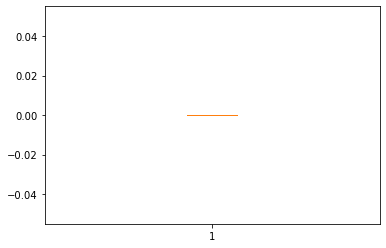

country_Fiji 0.0
country_Fiji 0.0


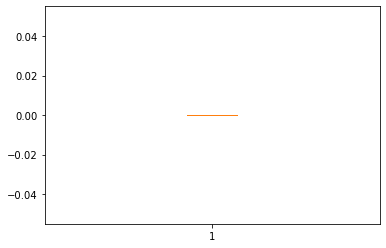

country_Finland 0.0
country_Finland 0.0


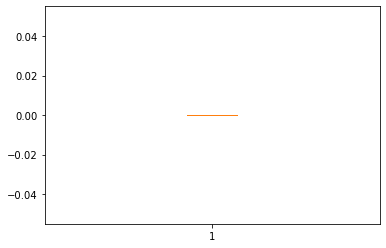

country_France 0.0
country_France 0.0


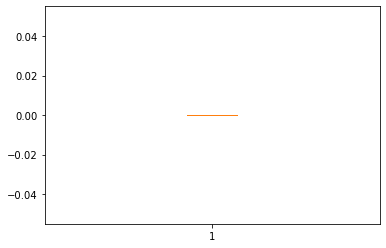

country_Gabon 0.0
country_Gabon 0.0


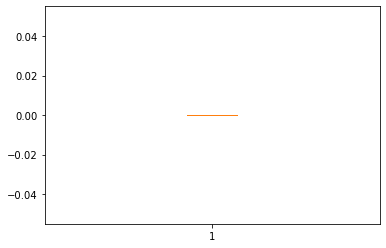

country_Gambia 0.0
country_Gambia 0.0


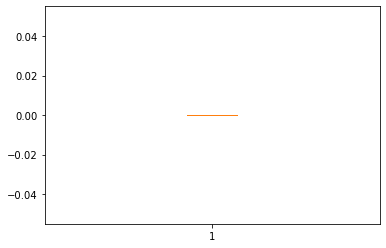

country_Georgia 0.0
country_Georgia 0.0


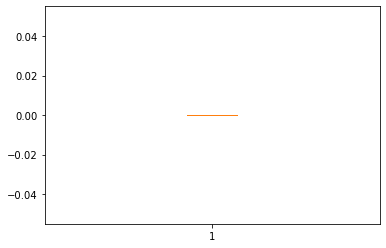

country_Germany 0.0
country_Germany 0.0


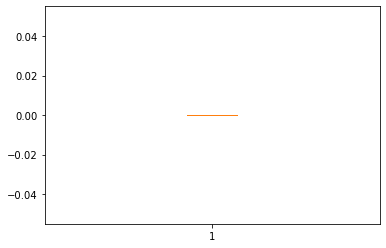

country_Ghana 0.0
country_Ghana 0.0


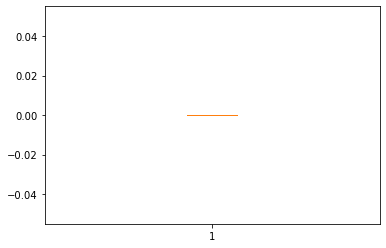

country_Greece 0.0
country_Greece 0.0


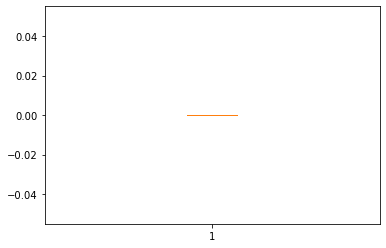

country_Grenada 0.0
country_Grenada 0.0


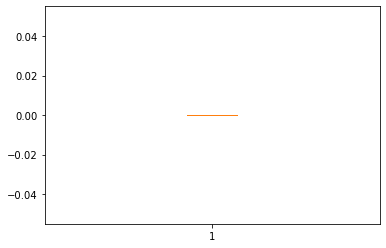

country_Guatemala 0.0
country_Guatemala 0.0


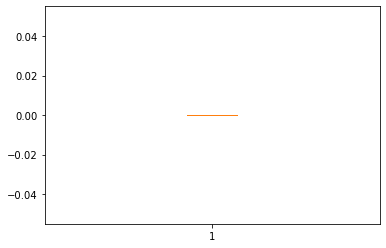

country_Guinea 0.0
country_Guinea 0.0


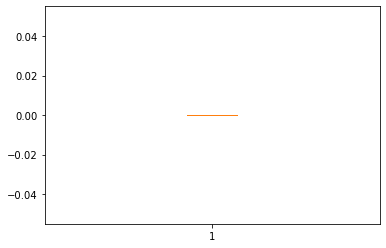

country_Guinea-Bissau 0.0
country_Guinea-Bissau 0.0


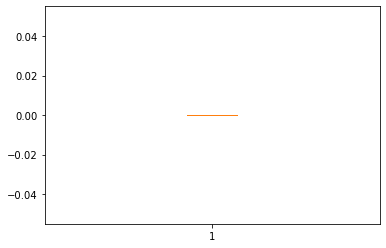

country_Guyana 0.0
country_Guyana 0.0


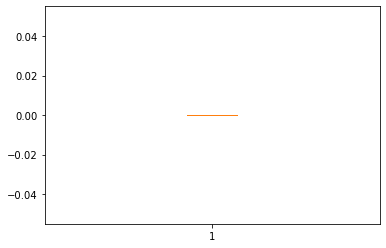

country_Haiti 0.0
country_Haiti 0.0


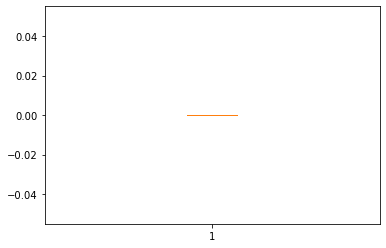

country_Honduras 0.0
country_Honduras 0.0


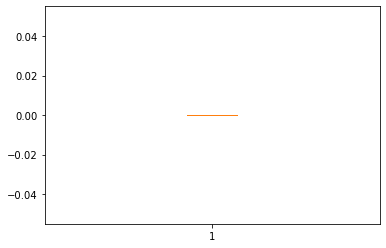

country_Hungary 0.0
country_Hungary 0.0


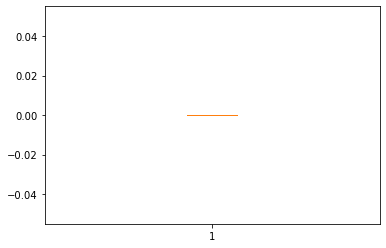

country_Iceland 0.0
country_Iceland 0.0


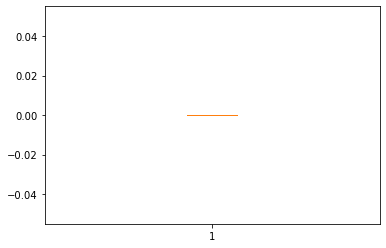

country_Iran(IslamicRepublicof) 0.0
country_Iran(IslamicRepublicof) 0.0


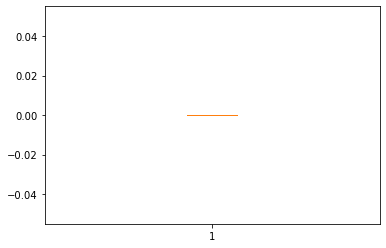

country_Iraq 0.0
country_Iraq 0.0


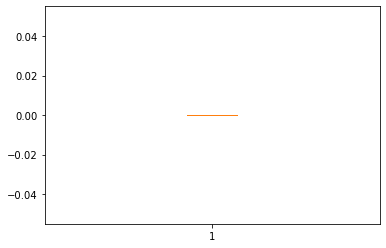

country_Ireland 0.0
country_Ireland 0.0


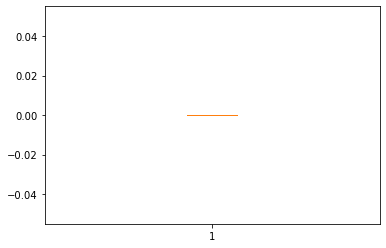

country_Israel 0.0
country_Israel 0.0


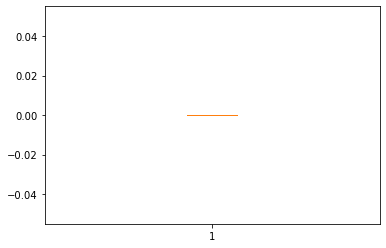

country_Italy 0.0
country_Italy 0.0


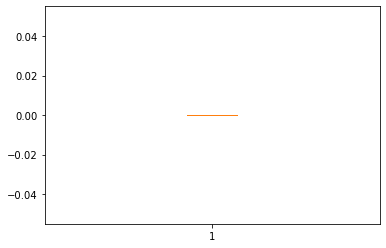

country_Jamaica 0.0
country_Jamaica 0.0


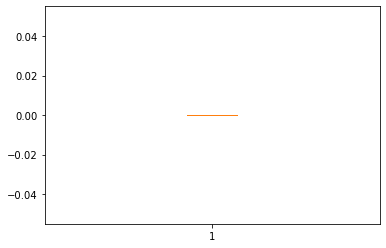

country_Japan 0.0
country_Japan 0.0


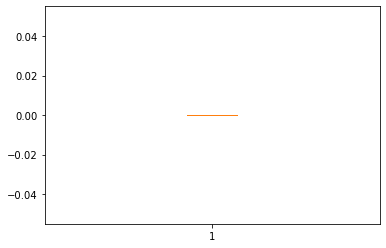

country_Jordan 0.0
country_Jordan 0.0


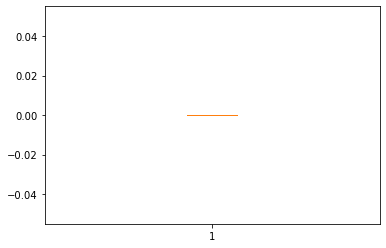

country_Kazakhstan 0.0
country_Kazakhstan 0.0


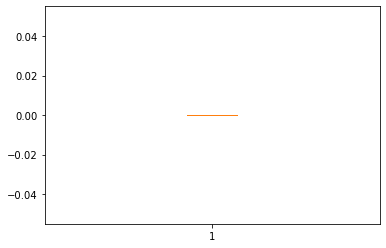

country_Kenya 0.0
country_Kenya 0.0


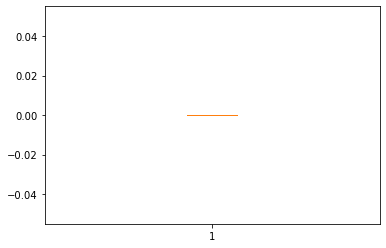

country_Kiribati 0.0
country_Kiribati 0.0


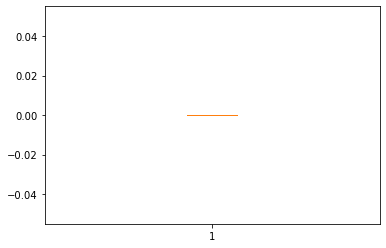

country_Kuwait 0.0
country_Kuwait 0.0


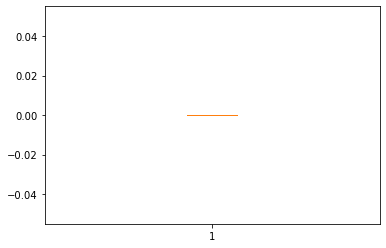

country_Kyrgyzstan 0.0
country_Kyrgyzstan 0.0


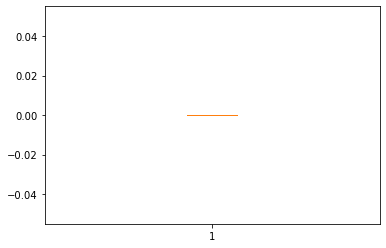

country_LaoPeople'sDemocraticRepublic 0.0
country_LaoPeople'sDemocraticRepublic 0.0


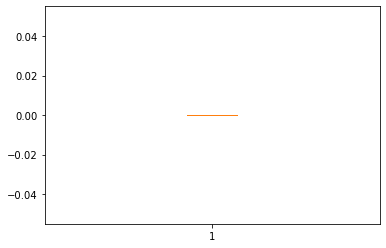

country_Latvia 0.0
country_Latvia 0.0


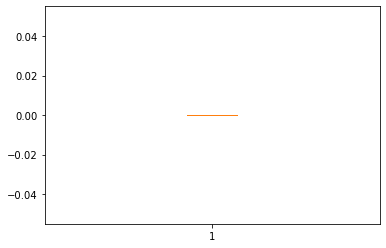

country_Lebanon 0.0
country_Lebanon 0.0


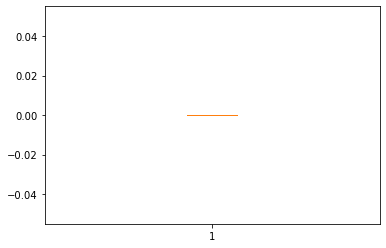

country_Lesotho 0.0
country_Lesotho 0.0


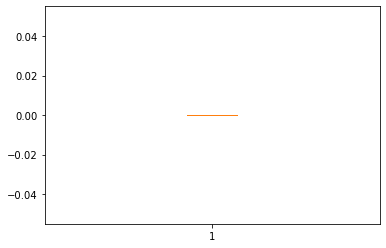

country_Liberia 0.0
country_Liberia 0.0


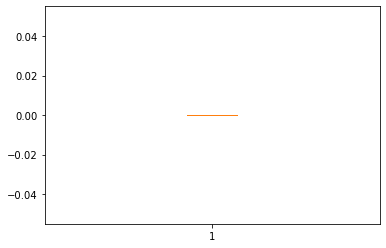

country_Libya 0.0
country_Libya 0.0


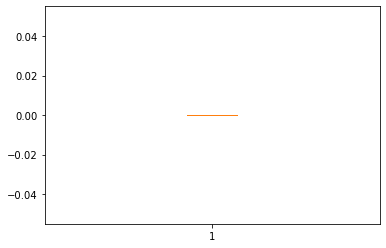

country_Lithuania 0.0
country_Lithuania 0.0


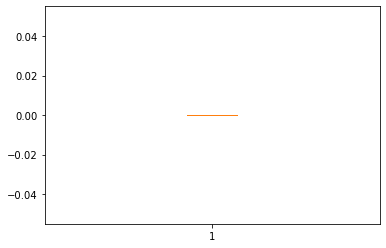

country_Luxembourg 0.0
country_Luxembourg 0.0


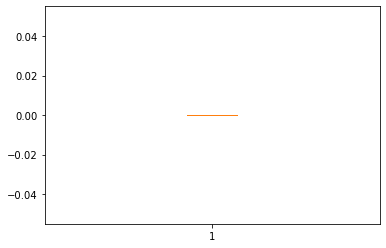

country_Madagascar 0.0
country_Madagascar 0.0


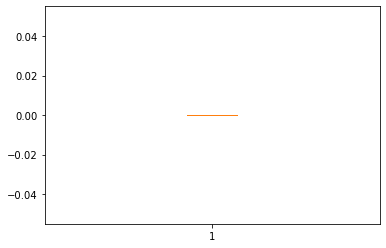

country_Malawi 0.0
country_Malawi 0.0


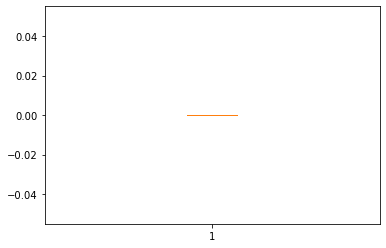

country_Malaysia 0.0
country_Malaysia 0.0


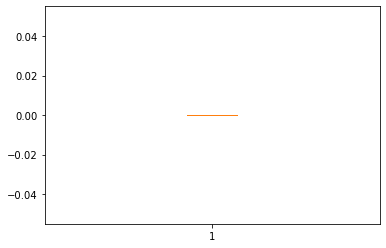

country_Maldives 0.0
country_Maldives 0.0


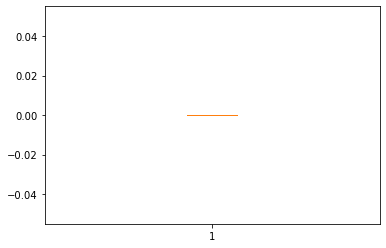

country_Mali 0.0
country_Mali 0.0


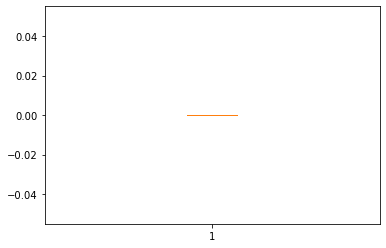

country_Malta 0.0
country_Malta 0.0


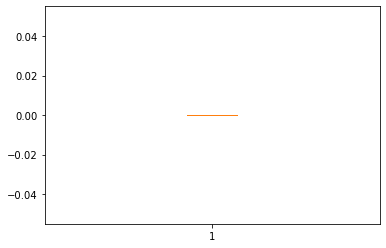

country_MarshallIslands 0.0
country_MarshallIslands 0.0


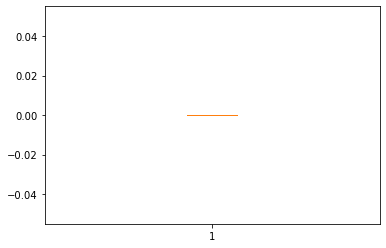

country_Mauritania 0.0
country_Mauritania 0.0


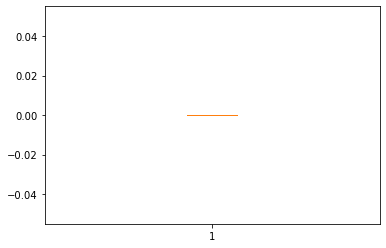

country_Mauritius 0.0
country_Mauritius 0.0


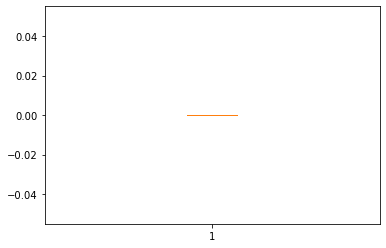

country_Mexico 0.0
country_Mexico 0.0


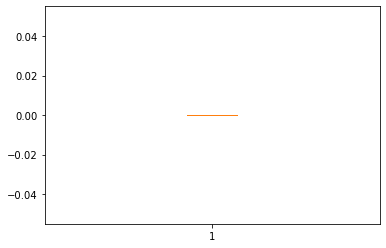

country_Micronesia(FederatedStatesof) 0.0
country_Micronesia(FederatedStatesof) 0.0


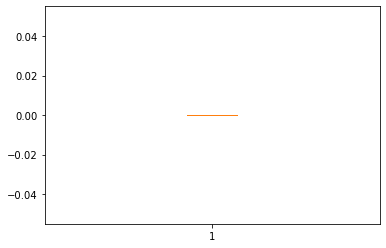

country_Monaco 0.0
country_Monaco 0.0


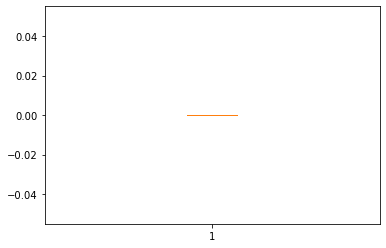

country_Mongolia 0.0
country_Mongolia 0.0


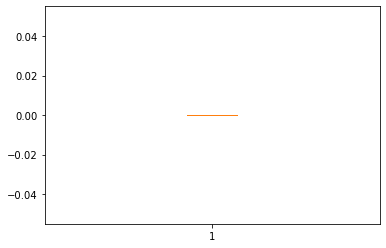

country_Montenegro 0.0
country_Montenegro 0.0


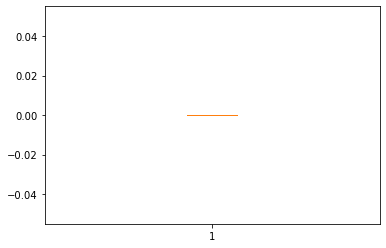

country_Morocco 0.0
country_Morocco 0.0


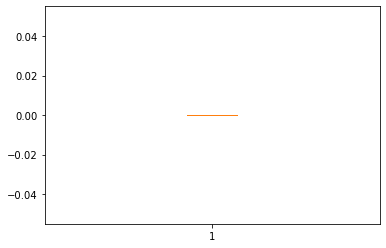

country_Mozambique 0.0
country_Mozambique 0.0


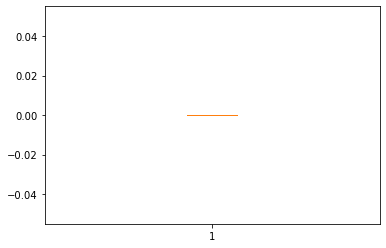

country_Myanmar 0.0
country_Myanmar 0.0


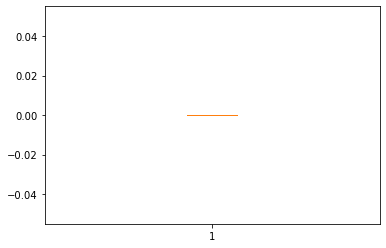

country_Namibia 0.0
country_Namibia 0.0


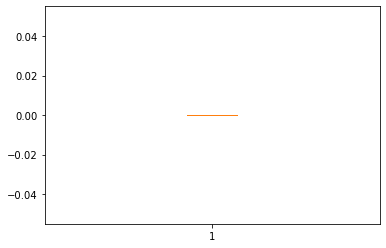

country_Nauru 0.0
country_Nauru 0.0


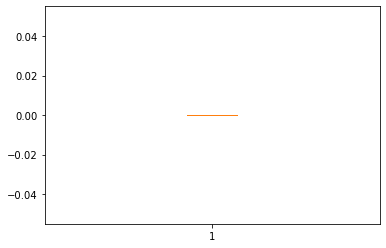

country_Nepal 0.0
country_Nepal 0.0


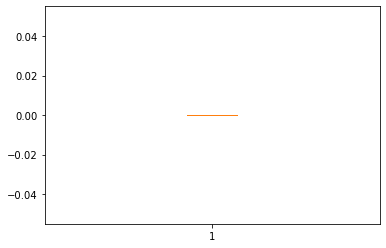

country_Netherlands 0.0
country_Netherlands 0.0


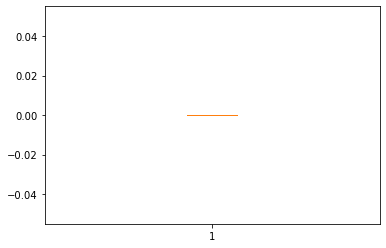

country_NewZealand 0.0
country_NewZealand 0.0


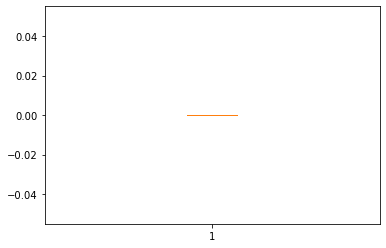

country_Nicaragua 0.0
country_Nicaragua 0.0


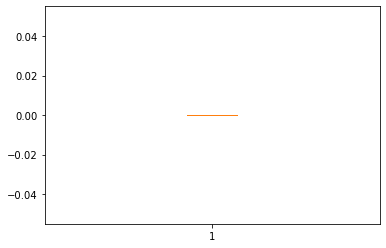

country_Niger 0.0
country_Niger 0.0


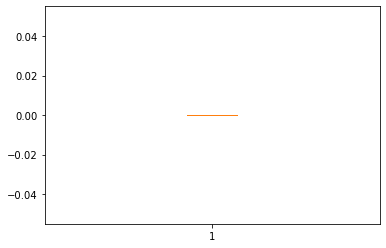

country_Nigeria 0.0
country_Nigeria 0.0


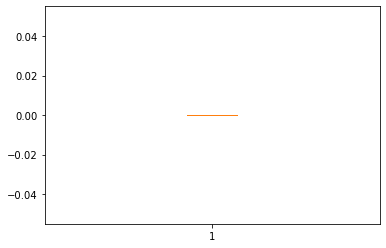

country_Niue 0.0
country_Niue 0.0


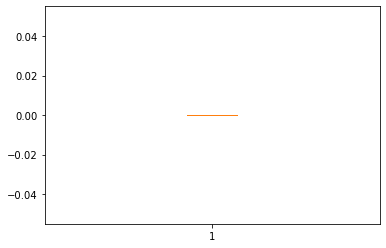

country_Norway 0.0
country_Norway 0.0


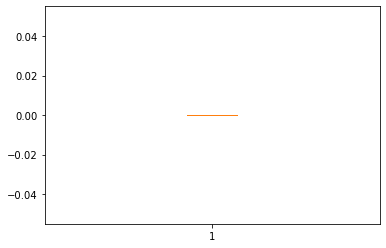

country_Oman 0.0
country_Oman 0.0


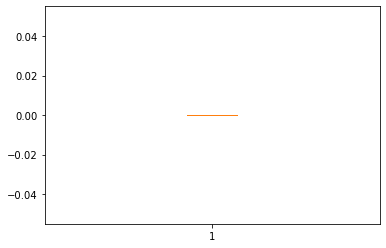

country_Pakistan 0.0
country_Pakistan 0.0


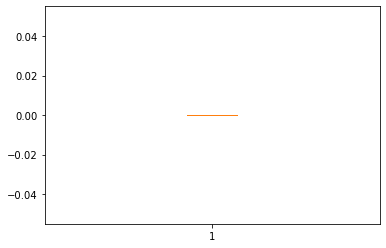

country_Palau 0.0
country_Palau 0.0


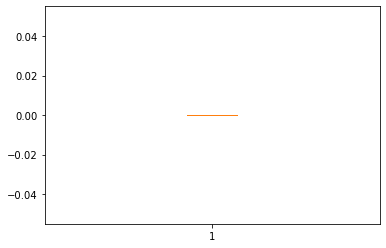

country_Panama 0.0
country_Panama 0.0


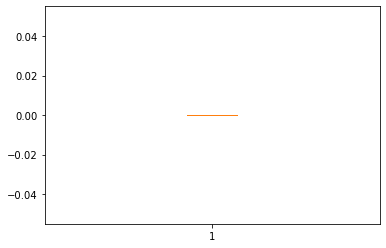

country_PapuaNewGuinea 0.0
country_PapuaNewGuinea 0.0


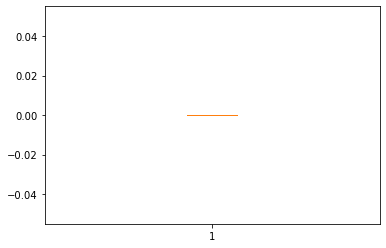

country_Paraguay 0.0
country_Paraguay 0.0


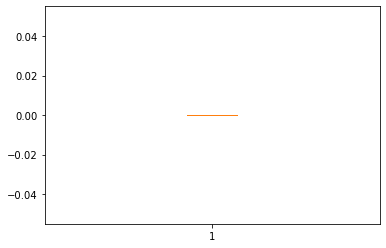

country_Peru 0.0
country_Peru 0.0


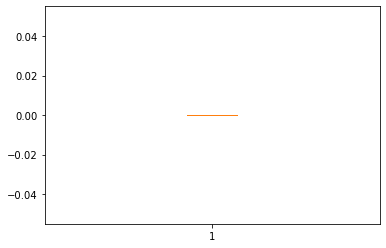

country_Philippines 0.0
country_Philippines 0.0


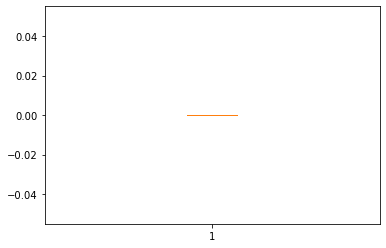

country_Poland 0.0
country_Poland 0.0


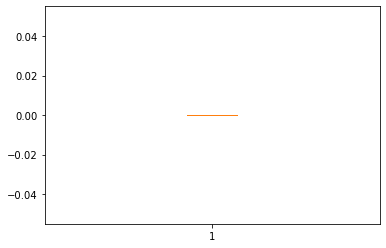

country_Portugal 0.0
country_Portugal 0.0


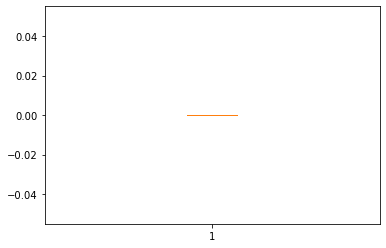

country_Qatar 0.0
country_Qatar 0.0


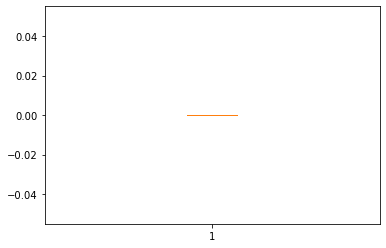

country_RepublicofKorea 0.0
country_RepublicofKorea 0.0


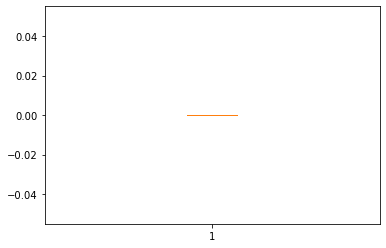

country_RepublicofMoldova 0.0
country_RepublicofMoldova 0.0


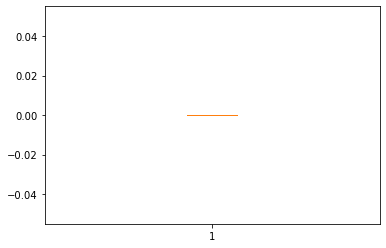

country_Romania 0.0
country_Romania 0.0


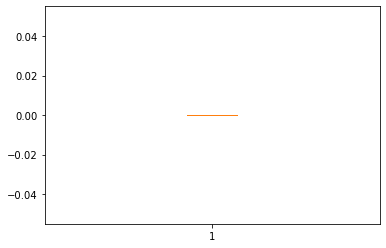

country_RussianFederation 0.0
country_RussianFederation 0.0


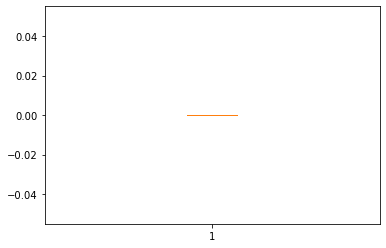

country_Rwanda 0.0
country_Rwanda 0.0


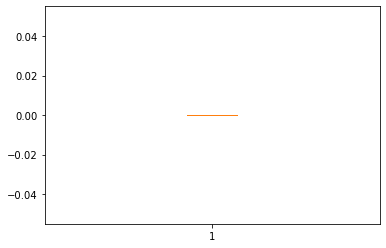

country_SaintKittsandNevis 0.0
country_SaintKittsandNevis 0.0


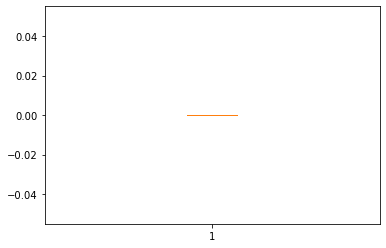

country_SaintLucia 0.0
country_SaintLucia 0.0


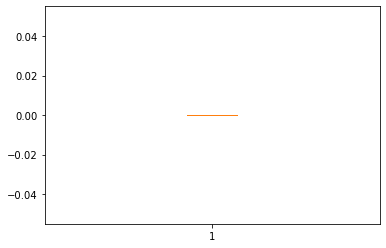

country_SaintVincentandtheGrenadines 0.0
country_SaintVincentandtheGrenadines 0.0


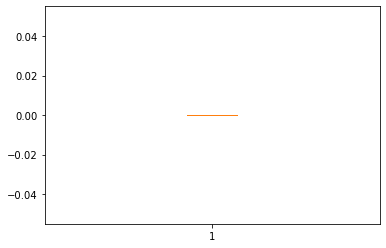

country_Samoa 0.0
country_Samoa 0.0


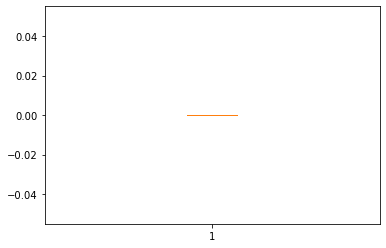

country_SanMarino 0.0
country_SanMarino 0.0


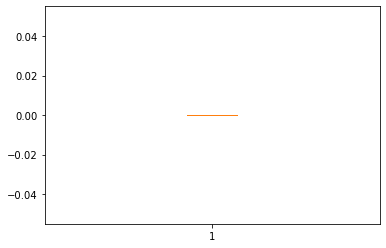

country_SaoTomeandPrincipe 0.0
country_SaoTomeandPrincipe 0.0


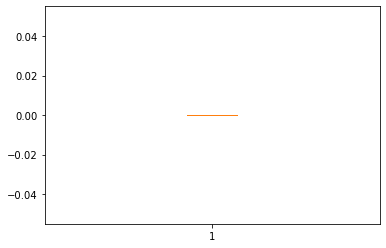

country_SaudiArabia 0.0
country_SaudiArabia 0.0


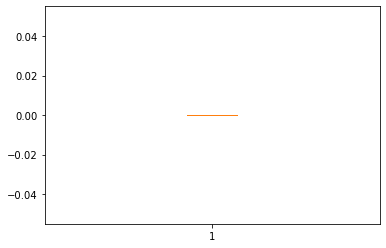

country_Senegal 0.0
country_Senegal 0.0


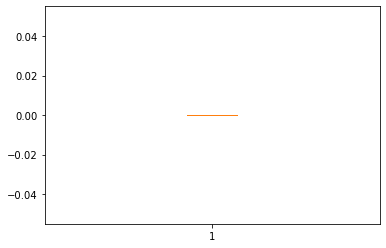

country_Serbia 0.0
country_Serbia 0.0


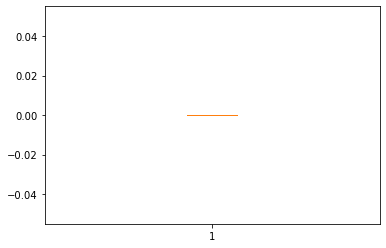

country_Seychelles 0.0
country_Seychelles 0.0


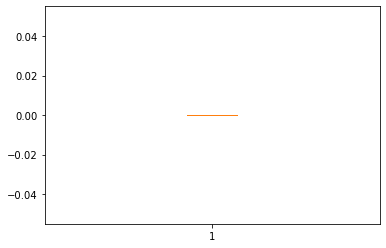

country_SierraLeone 0.0
country_SierraLeone 0.0


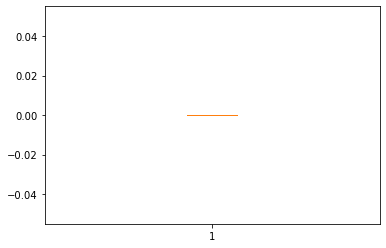

country_Singapore 0.0
country_Singapore 0.0


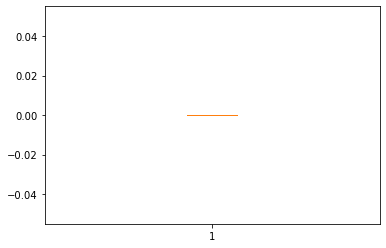

country_Slovakia 0.0
country_Slovakia 0.0


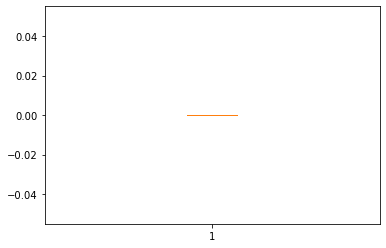

country_Slovenia 0.0
country_Slovenia 0.0


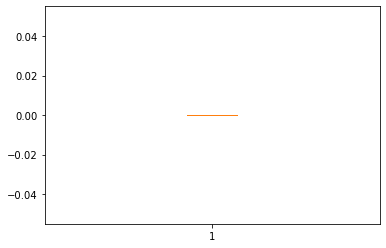

country_SolomonIslands 0.0
country_SolomonIslands 0.0


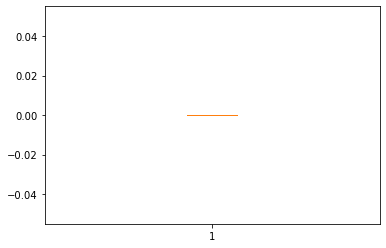

country_Somalia 0.0
country_Somalia 0.0


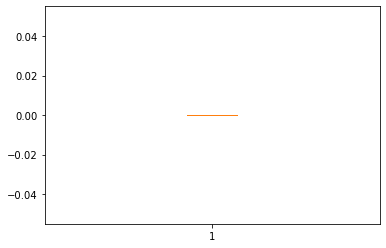

country_SouthAfrica 0.0
country_SouthAfrica 0.0


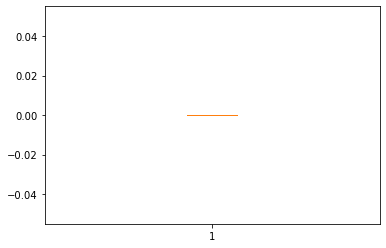

country_SouthSudan 0.0
country_SouthSudan 0.0


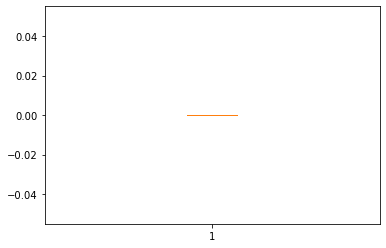

country_Spain 0.0
country_Spain 0.0


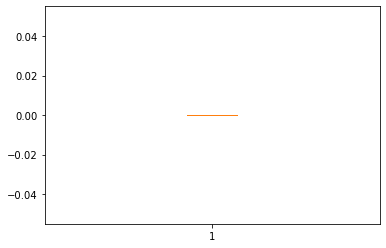

country_SriLanka 0.0
country_SriLanka 0.0


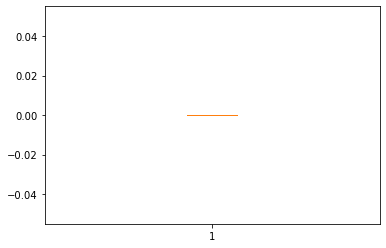

country_Sudan 0.0
country_Sudan 0.0


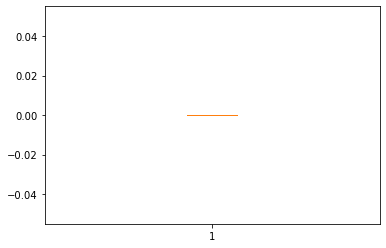

country_Suriname 0.0
country_Suriname 0.0


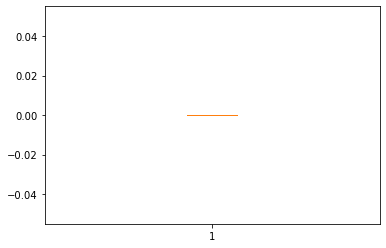

country_Swaziland 0.0
country_Swaziland 0.0


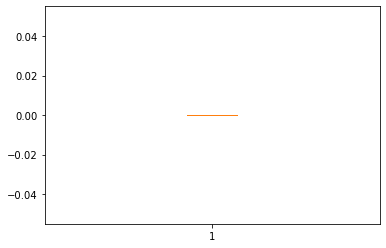

country_Sweden 0.0
country_Sweden 0.0


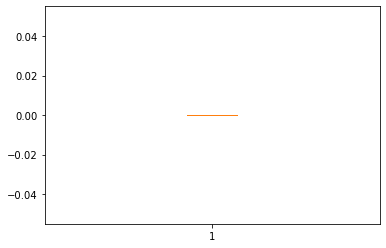

country_Switzerland 0.0
country_Switzerland 0.0


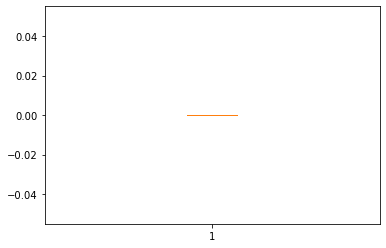

country_SyrianArabRepublic 0.0
country_SyrianArabRepublic 0.0


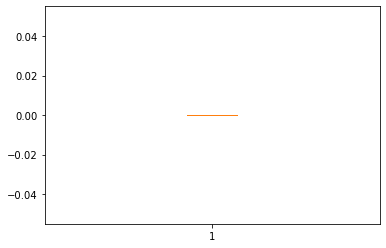

country_Tajikistan 0.0
country_Tajikistan 0.0


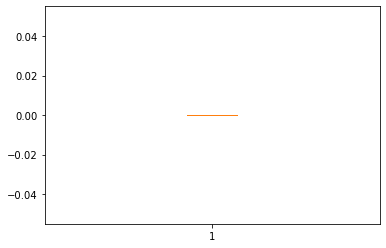

country_Thailand 0.0
country_Thailand 0.0


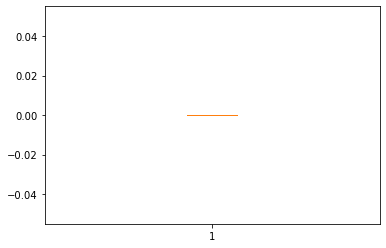

country_TheformerYugoslavrepublicofMacedonia 0.0
country_TheformerYugoslavrepublicofMacedonia 0.0


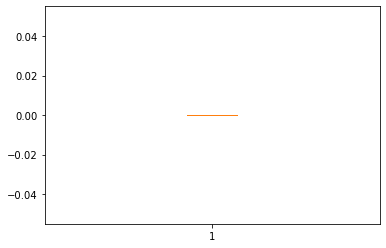

country_Timor-Leste 0.0
country_Timor-Leste 0.0


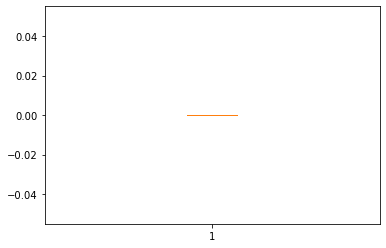

country_Togo 0.0
country_Togo 0.0


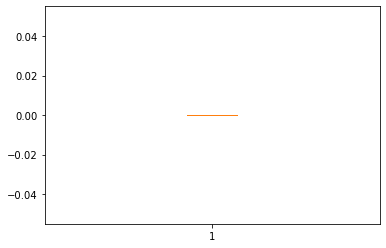

country_Tonga 0.0
country_Tonga 0.0


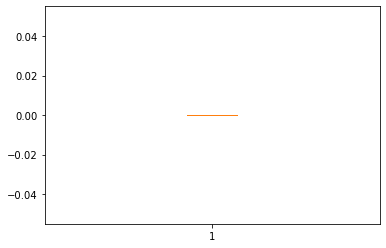

country_TrinidadandTobago 0.0
country_TrinidadandTobago 0.0


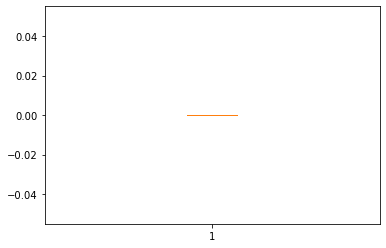

country_Tunisia 0.0
country_Tunisia 0.0


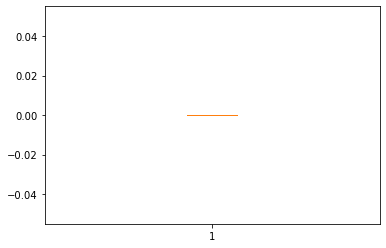

country_Turkey 0.0
country_Turkey 0.0


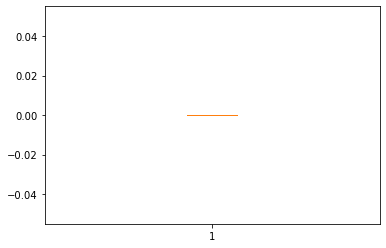

country_Turkmenistan 0.0
country_Turkmenistan 0.0


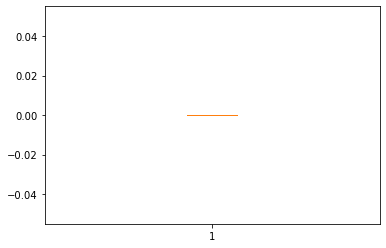

country_Tuvalu 0.0
country_Tuvalu 0.0


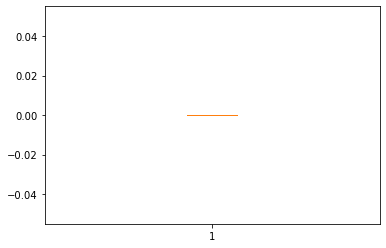

country_Uganda 0.0
country_Uganda 0.0


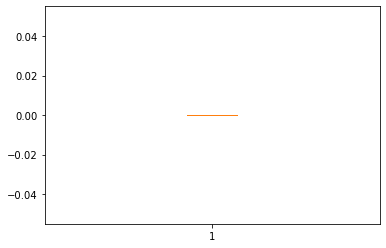

country_Ukraine 0.0
country_Ukraine 0.0


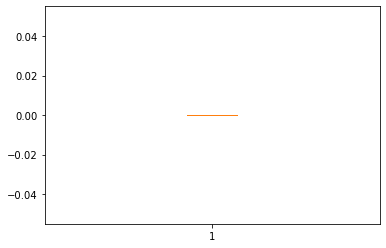

country_UnitedArabEmirates 0.0
country_UnitedArabEmirates 0.0


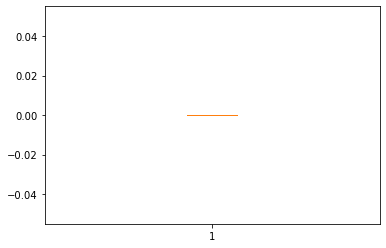

country_UnitedKingdomofGreatBritainandNorthernIreland 0.0
country_UnitedKingdomofGreatBritainandNorthernIreland 0.0


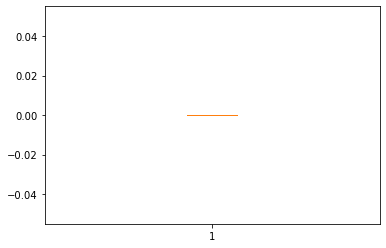

country_UnitedRepublicofTanzania 0.0
country_UnitedRepublicofTanzania 0.0


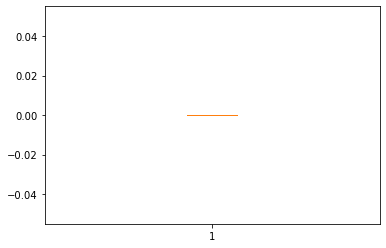

country_UnitedStatesofAmerica 0.0
country_UnitedStatesofAmerica 0.0


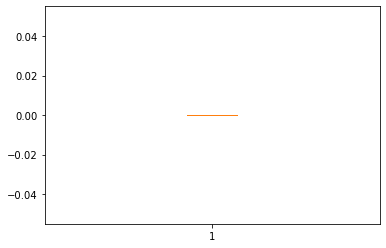

country_Uruguay 0.0
country_Uruguay 0.0


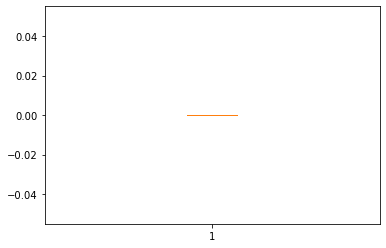

country_Uzbekistan 0.0
country_Uzbekistan 0.0


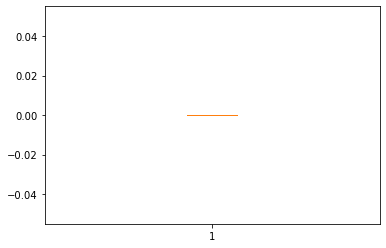

country_Vanuatu 0.0
country_Vanuatu 0.0


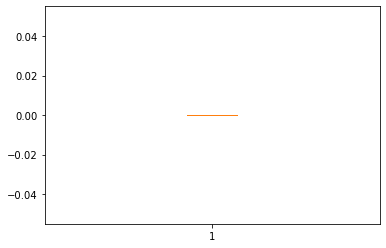

country_Venezuela(BolivarianRepublicof) 0.0
country_Venezuela(BolivarianRepublicof) 0.0


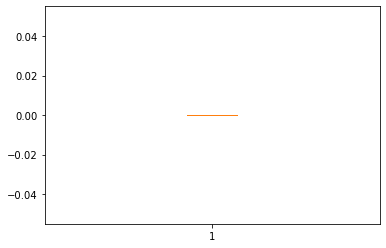

country_VietNam 0.0
country_VietNam 0.0


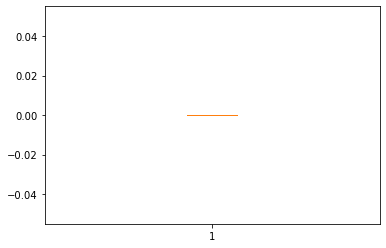

country_Yemen 0.0
country_Yemen 0.0


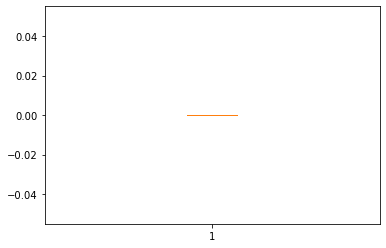

country_Zambia 0.0
country_Zambia 0.0


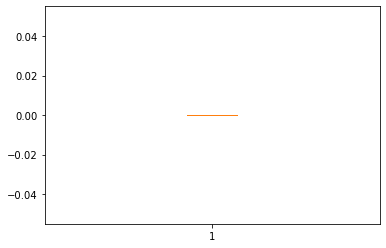

country_Zimbabwe 0.0
country_Zimbabwe 0.0


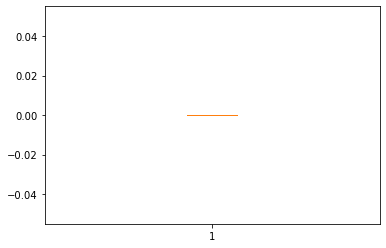

status_Developing 1.0
status_Developing 1.0


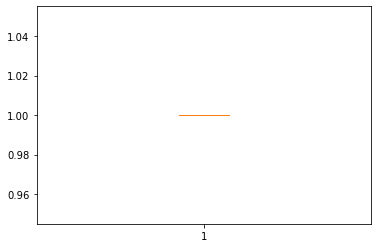

life_expentancy 92.94999999999999
life_expentancy 49.350000000000016


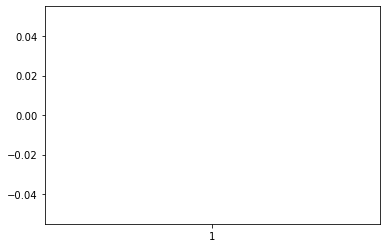

In [60]:
#box plot to represent dataset visually after removing outliers
dfo= pd.DataFrame()
for col in newdfnumeric.columns:
  
    lower_boundaries,upper_boundaries = find_boundaries(newdf,col)
    print(col , upper_boundaries)
    print(col , lower_boundaries)
   # df_[col]=np.where(df[col]> upper_boundaries,upper_boundaries,df[col])
    #df_[col]=np.where(df[col]< lower_boundaries,lower_boundaries,df[col])
    dfo[col] = newdf[col].apply(win)
    plt.boxplot(dfo[col])
    plt.show()

# we have now succesfully removed all the outliers 

In [61]:
# defining afunction which prints the count and also percentage of outliers  after removing outliers in the dataset
cont_vars = list(dfo.columns)[3:]
def outlier_count(col, data=dfo):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [62]:
for col in cont_vars:
    outlier_count(col)

---------------alcohol---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------percentage_expenditure---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------hepatitis_b---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------measles---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------under_five_deaths---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------polio---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------total_expenditure---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------diphtheria---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------hiv/aids---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------gdp---------------
Number of outliers: 0
Percent of data that 

# data exploration and visual exploration of the dataset

# show the distribution plot for every numerical column after removing the outliers

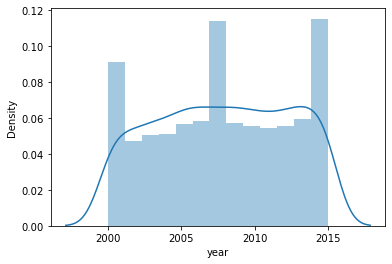

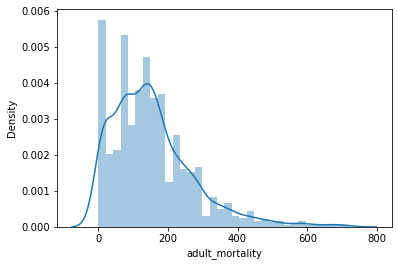

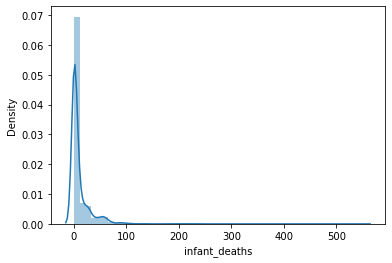

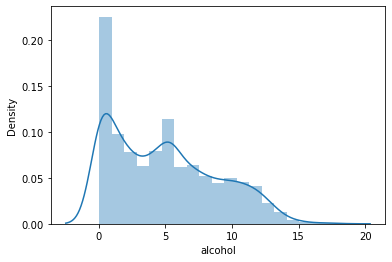

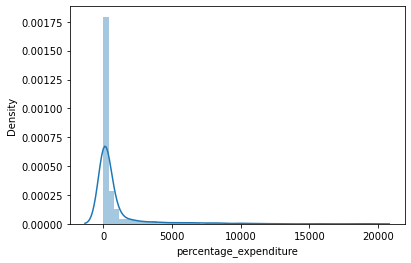

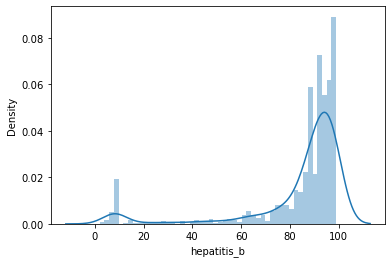

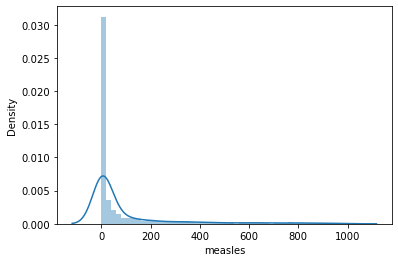

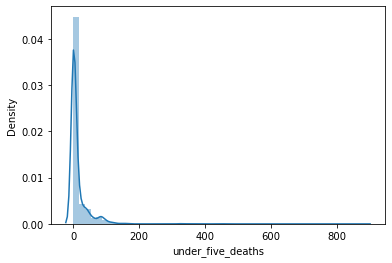

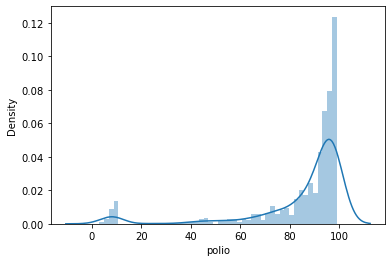

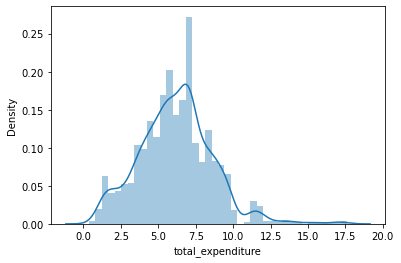

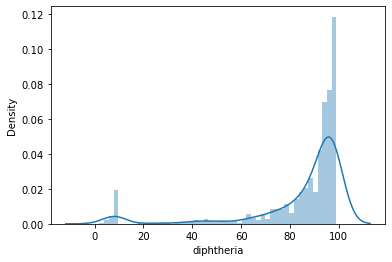

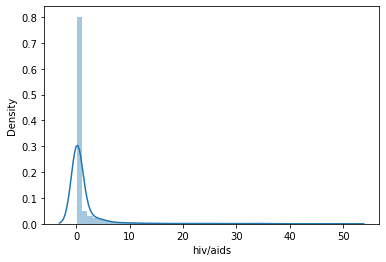

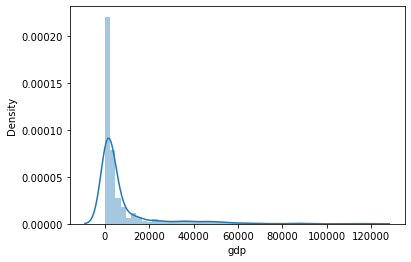

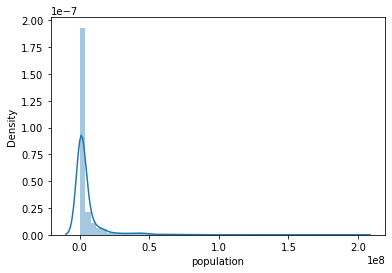

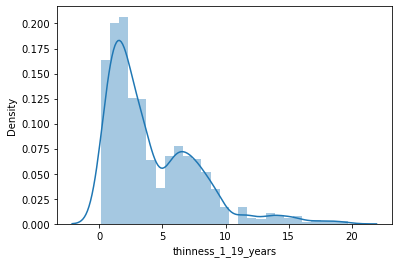

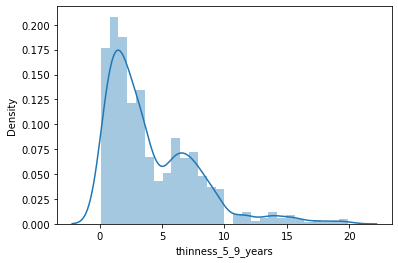

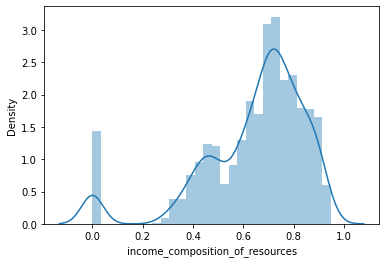

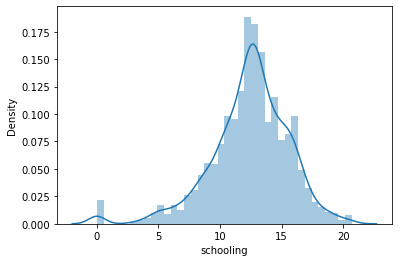

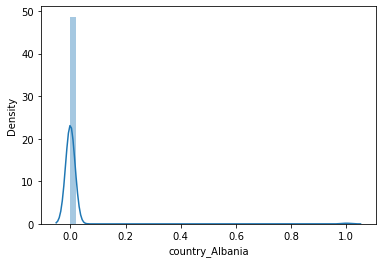

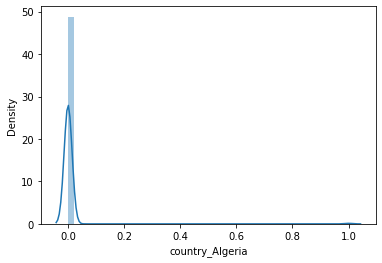

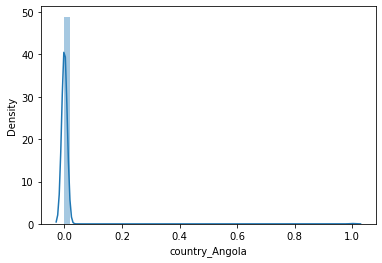

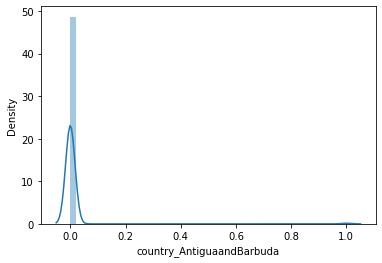

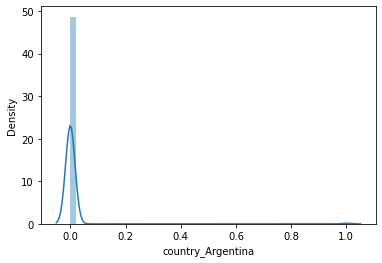

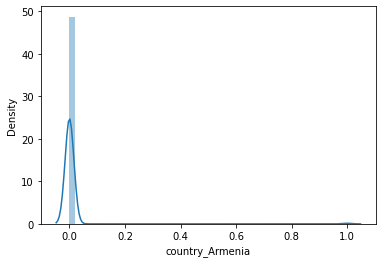

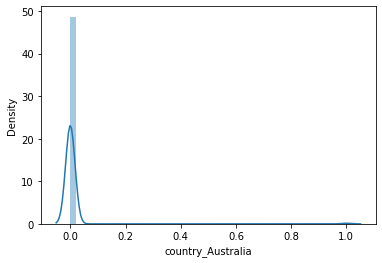

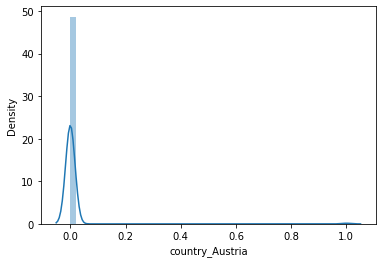

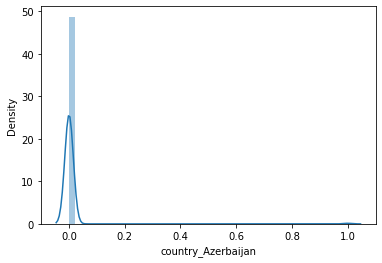

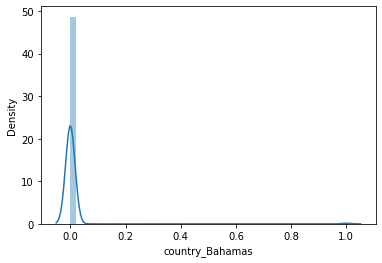

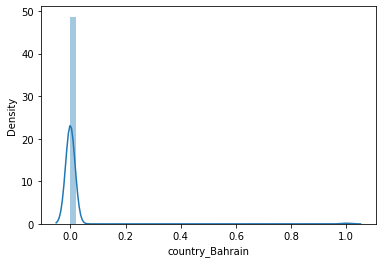

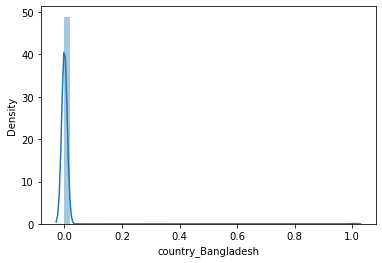

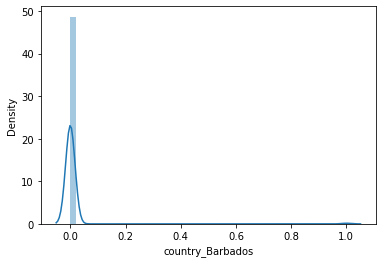

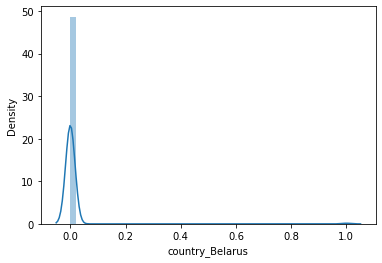

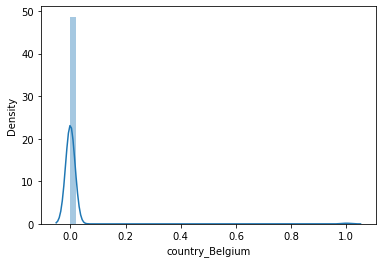

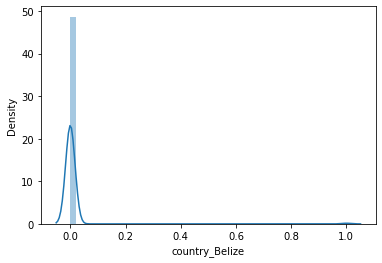

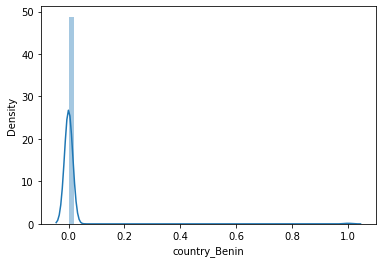

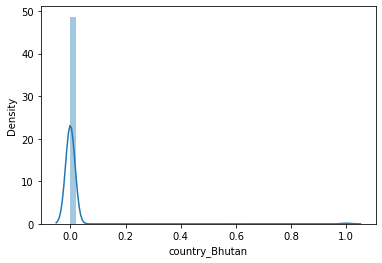

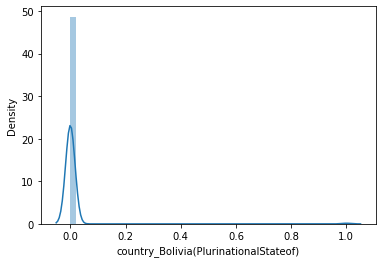

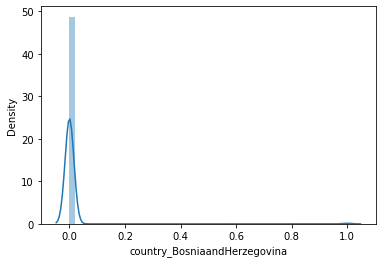

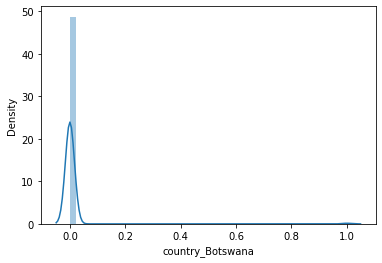

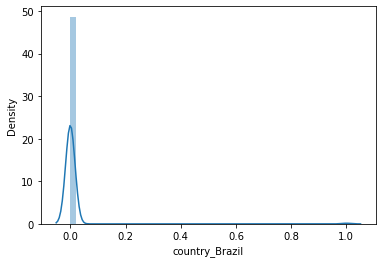

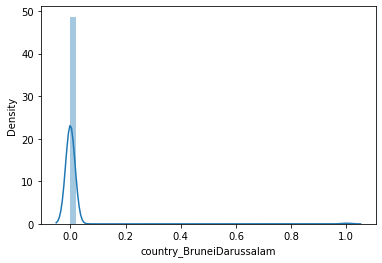

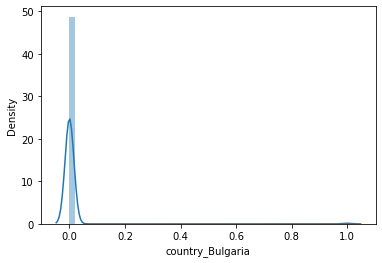

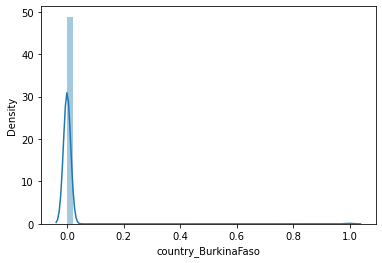

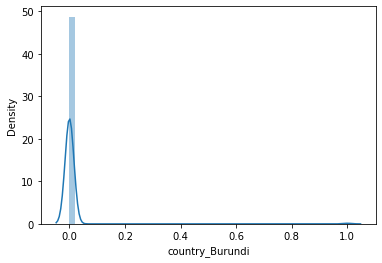

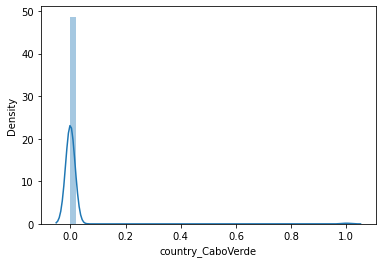

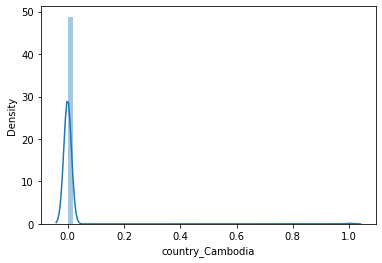

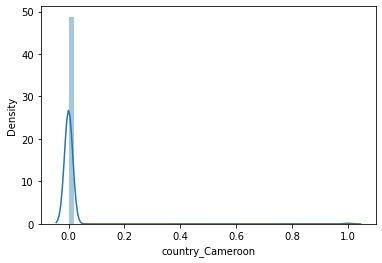

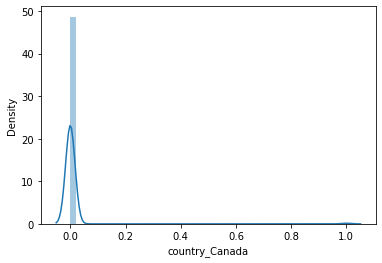

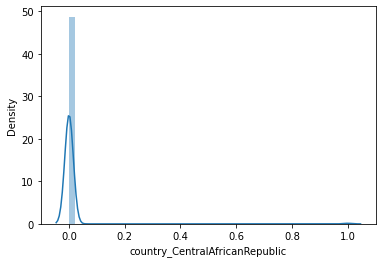

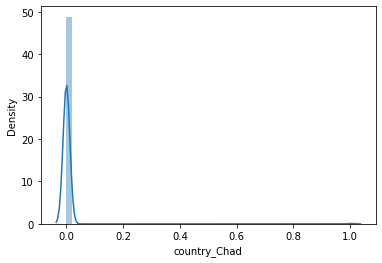

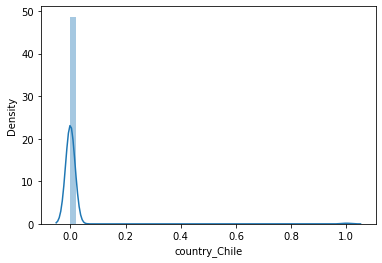

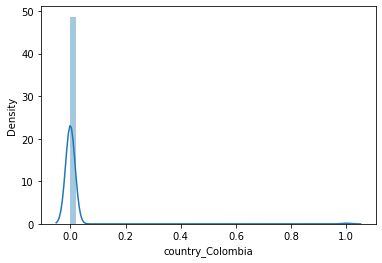

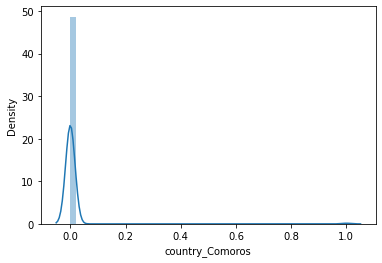

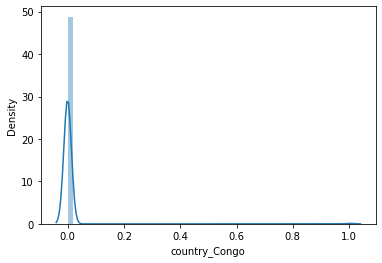

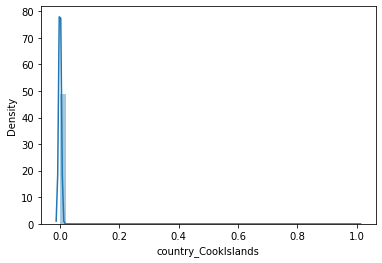

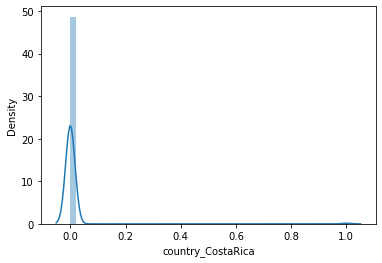

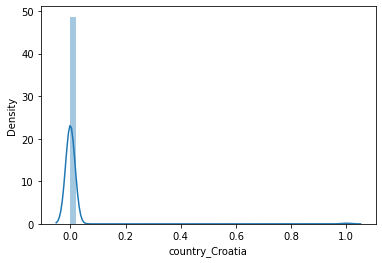

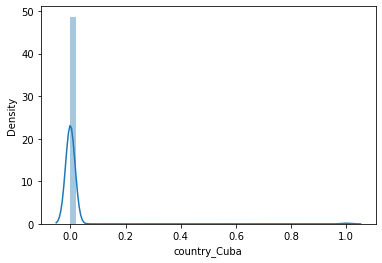

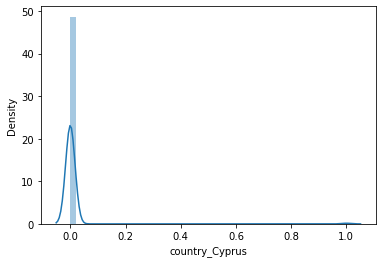

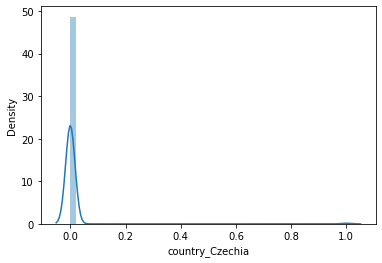

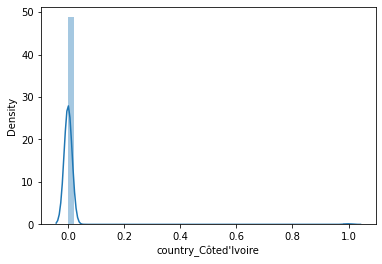

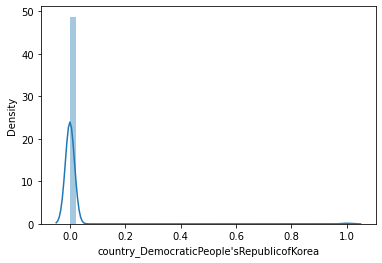

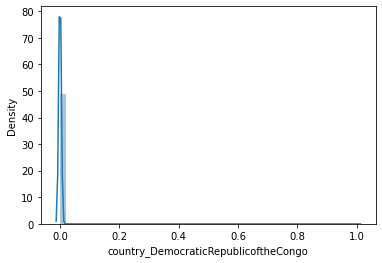

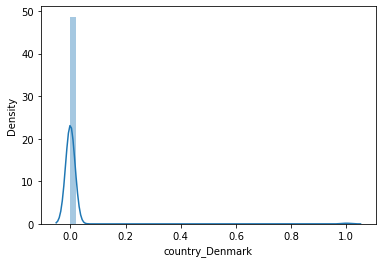

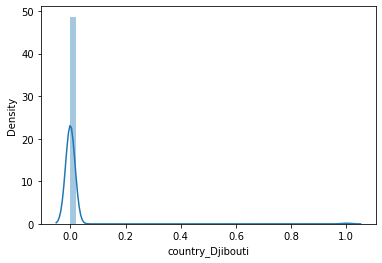

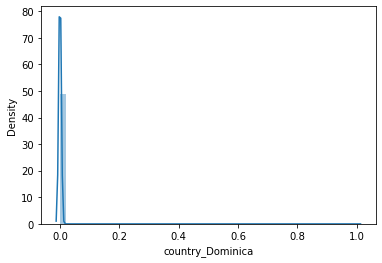

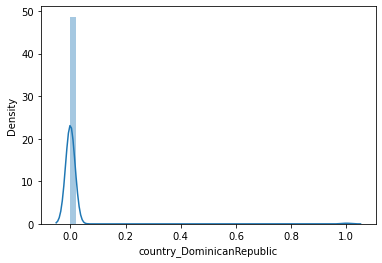

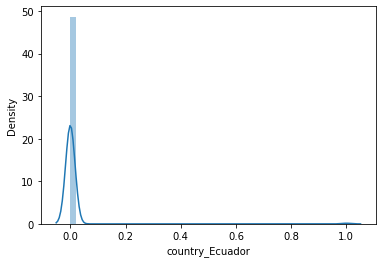

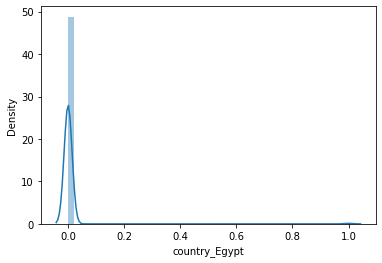

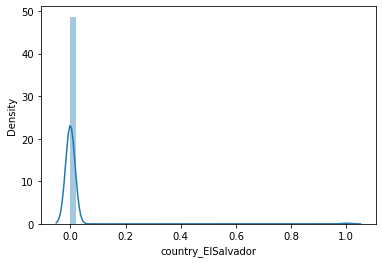

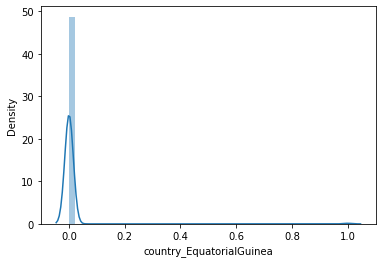

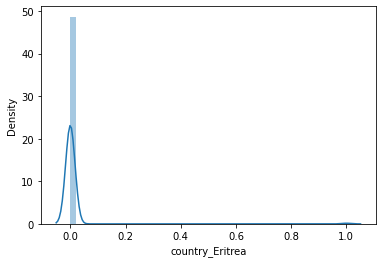

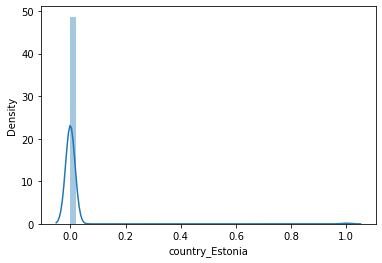

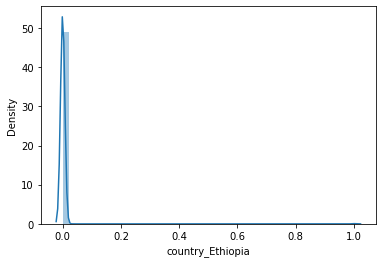

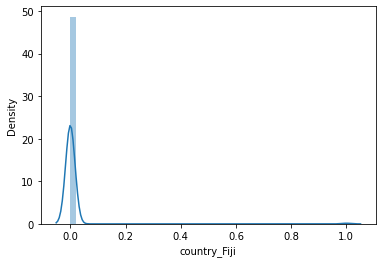

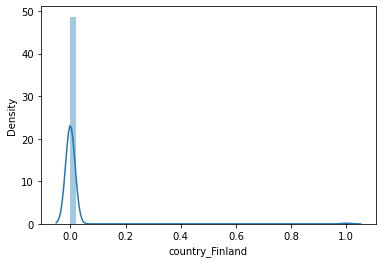

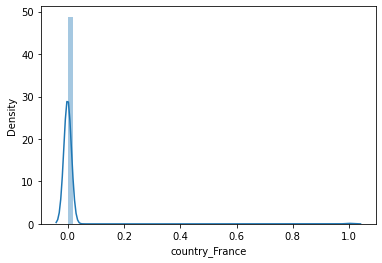

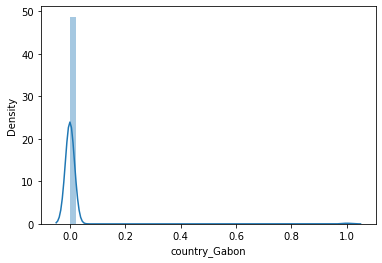

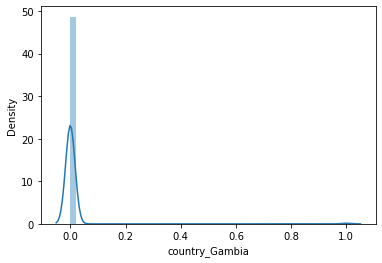

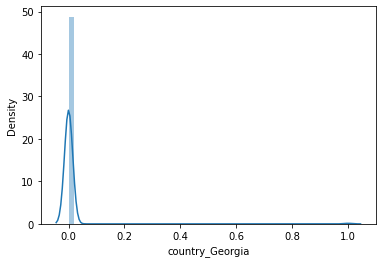

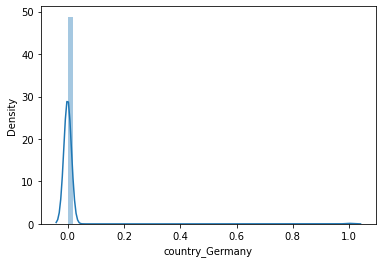

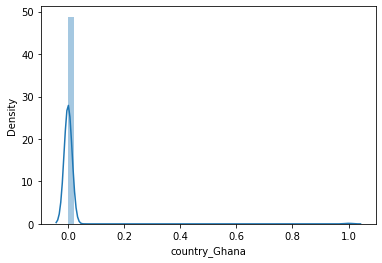

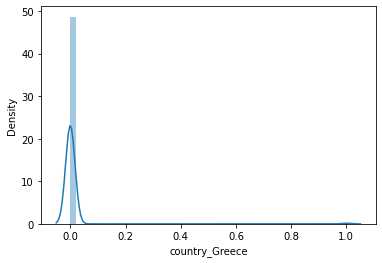

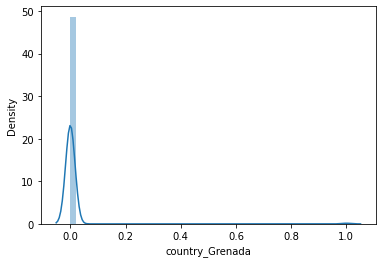

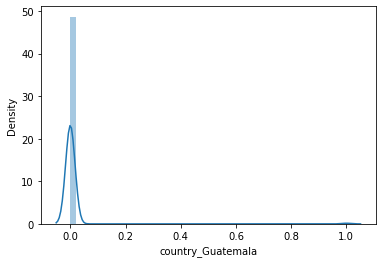

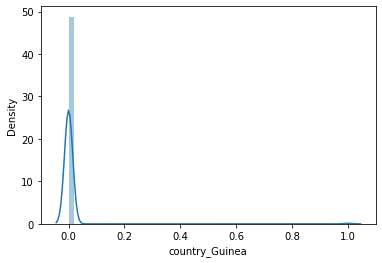

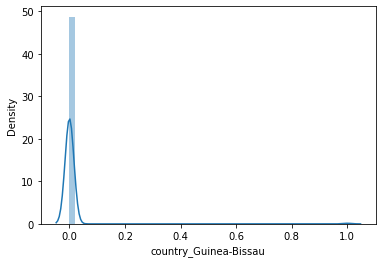

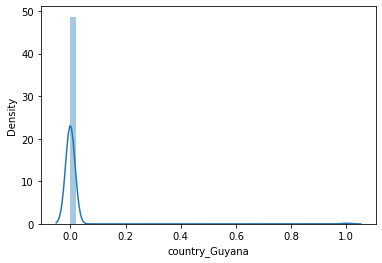

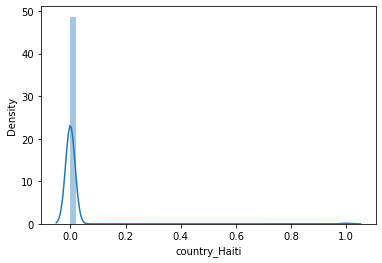

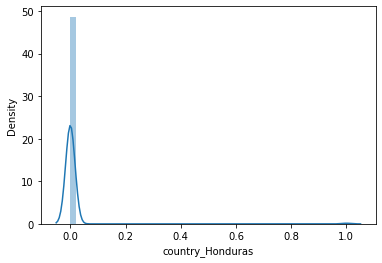

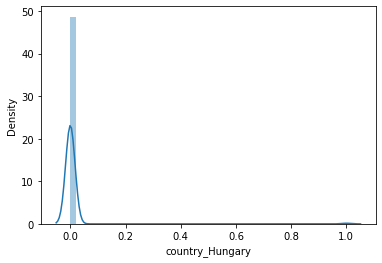

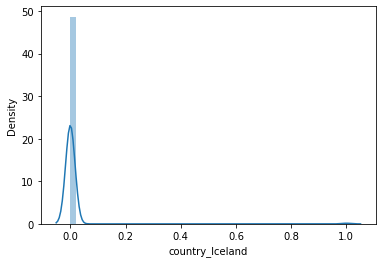

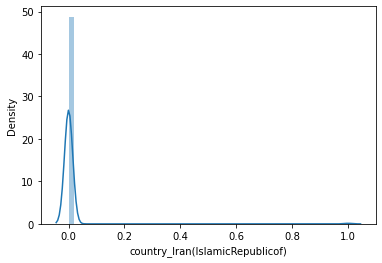

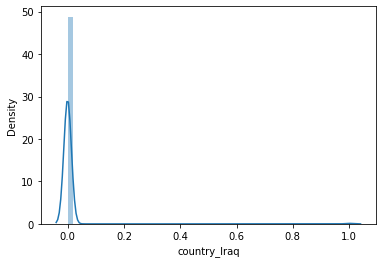

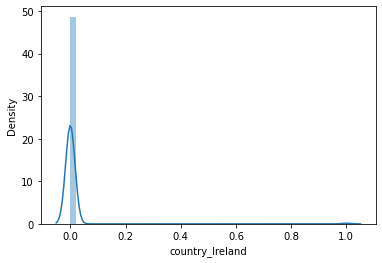

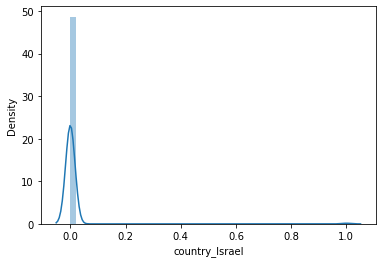

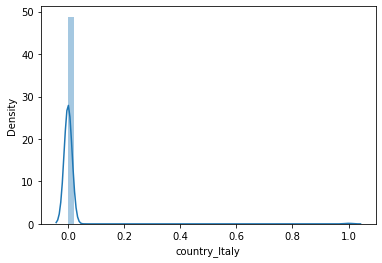

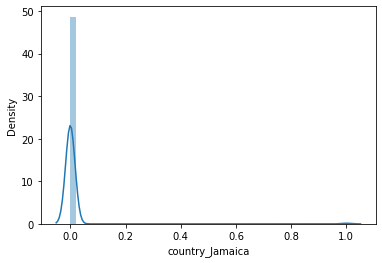

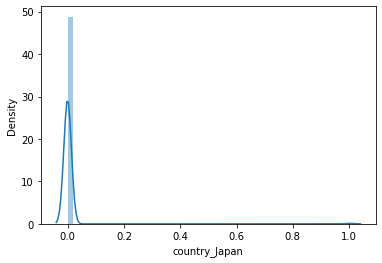

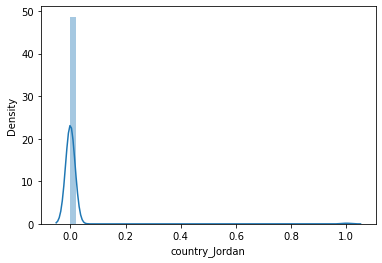

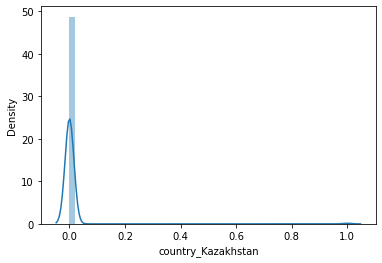

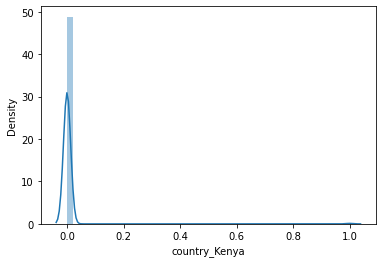

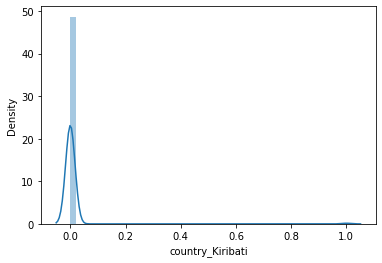

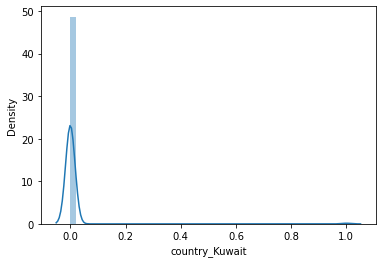

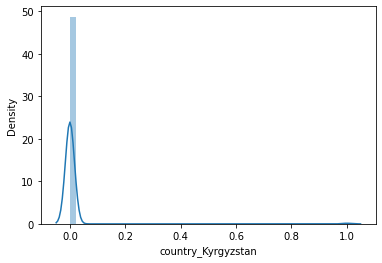

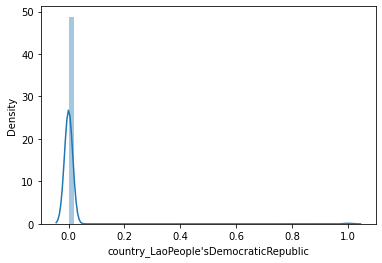

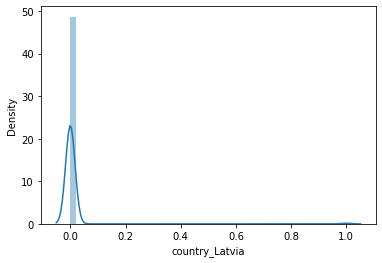

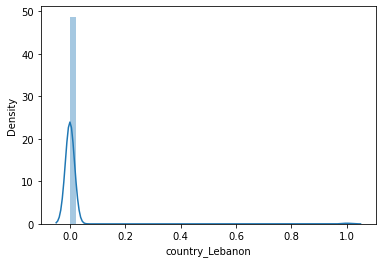

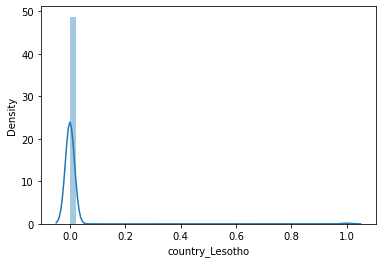

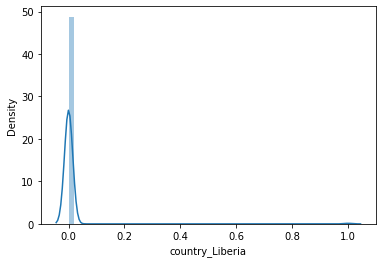

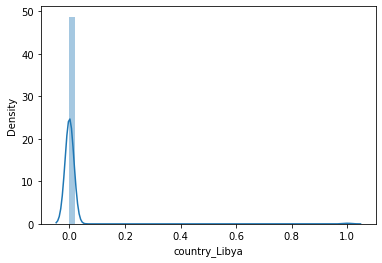

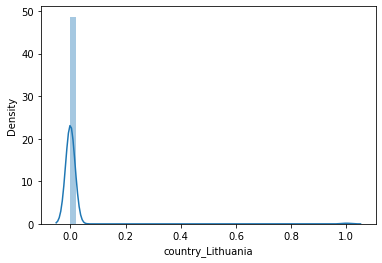

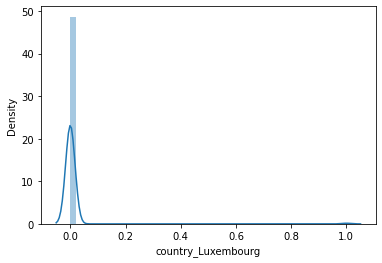

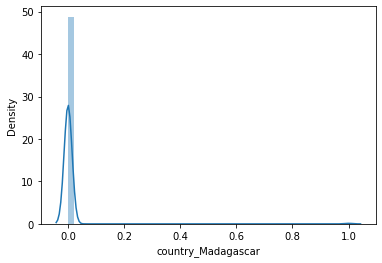

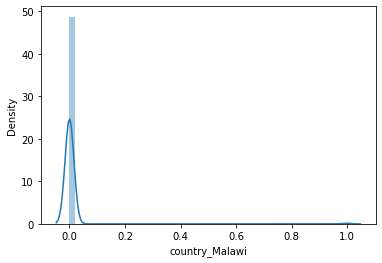

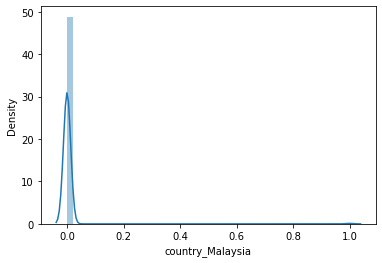

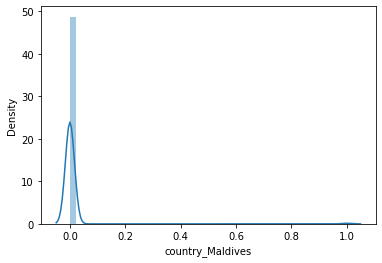

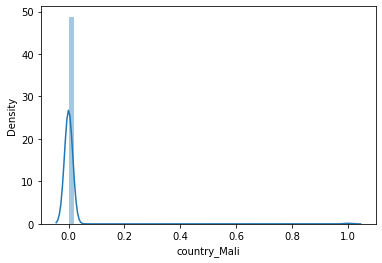

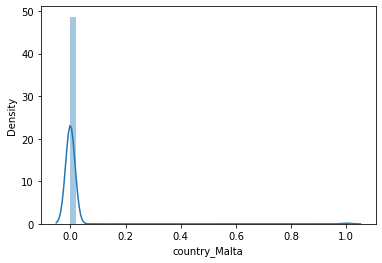

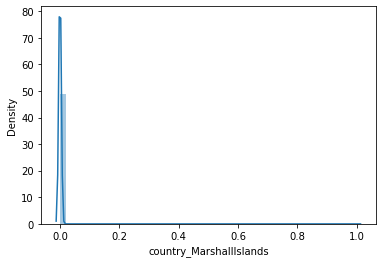

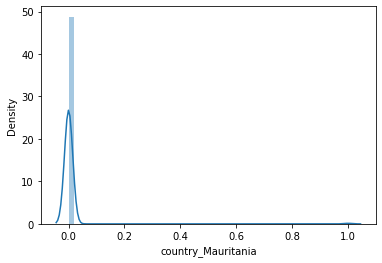

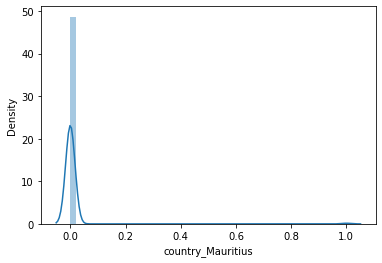

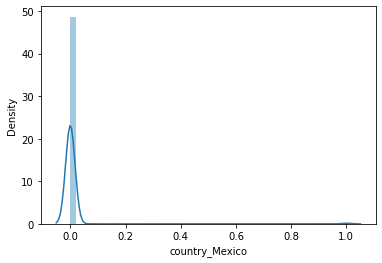

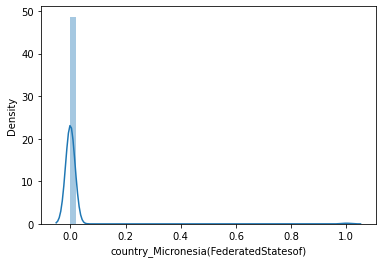

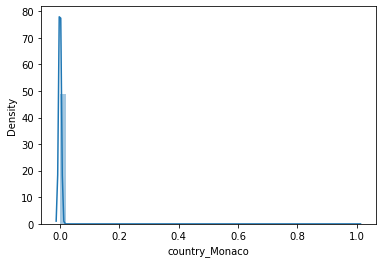

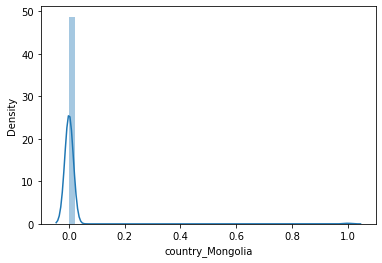

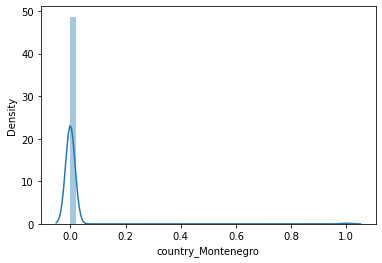

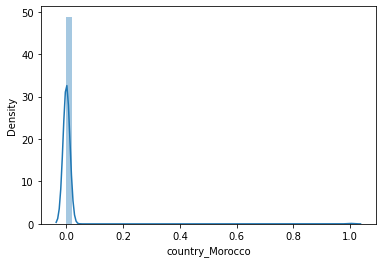

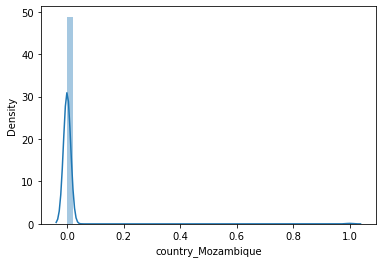

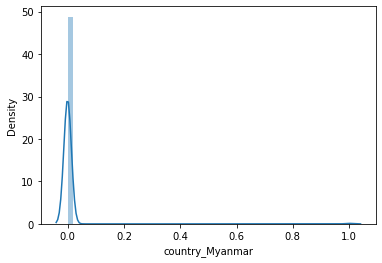

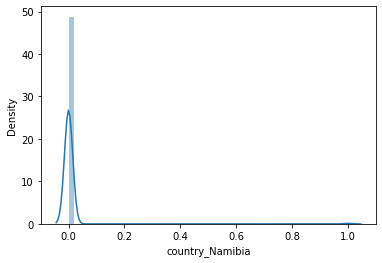

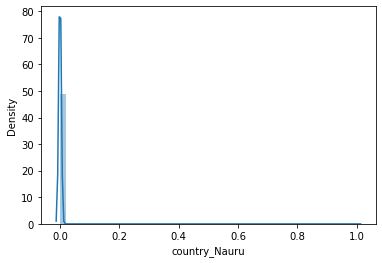

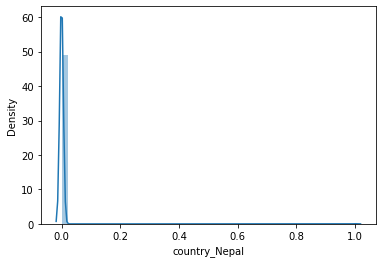

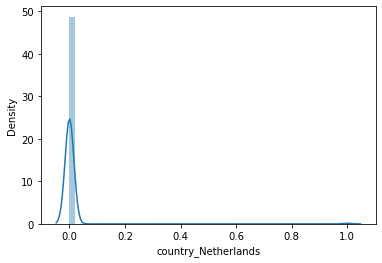

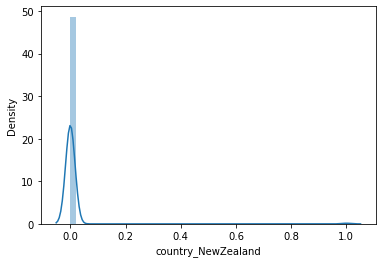

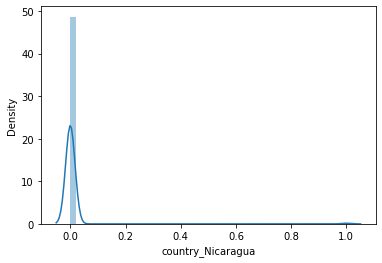

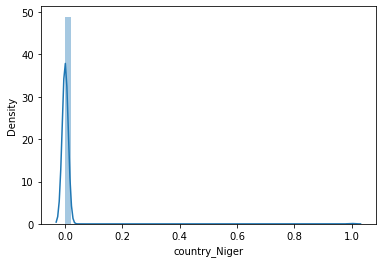

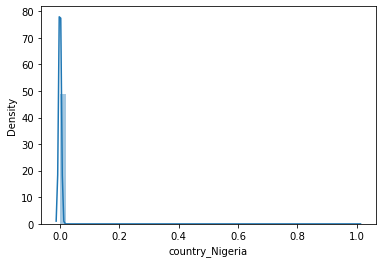

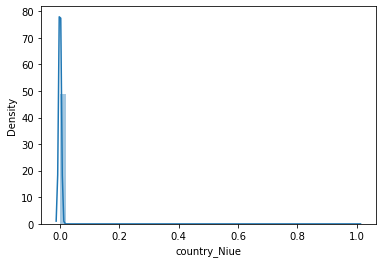

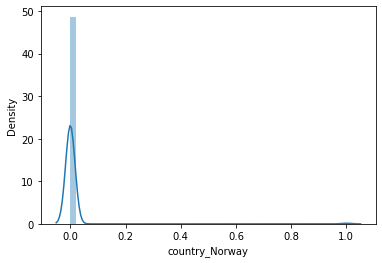

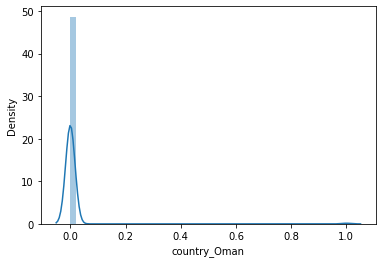

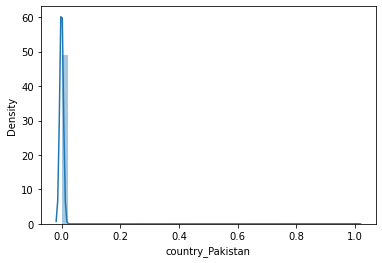

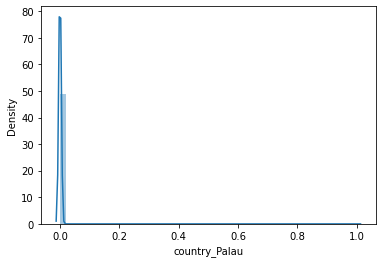

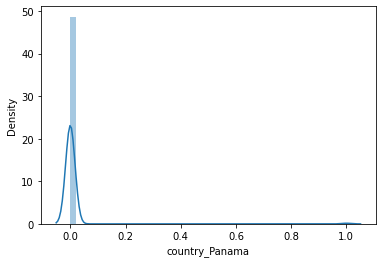

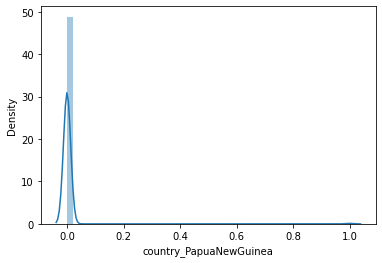

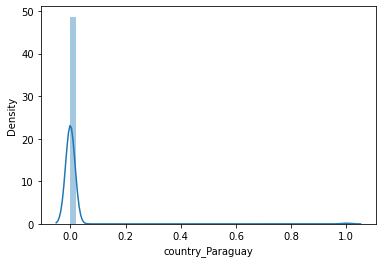

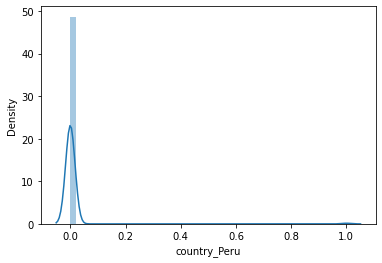

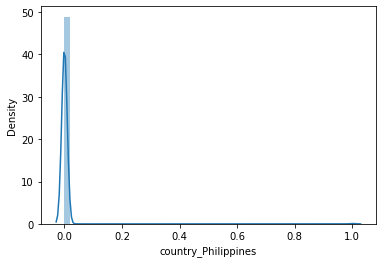

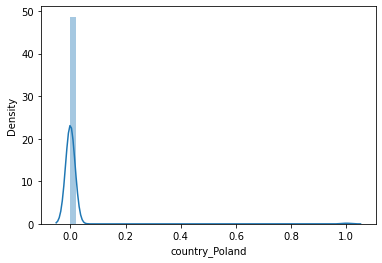

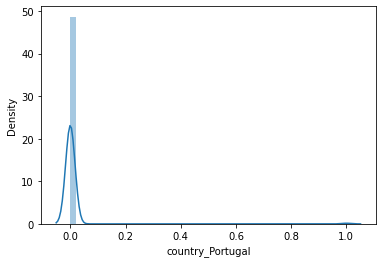

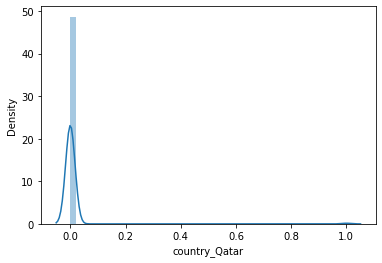

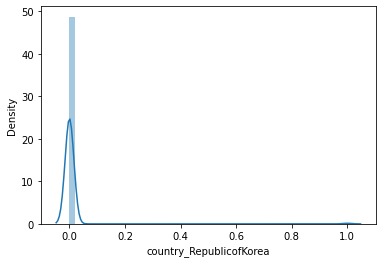

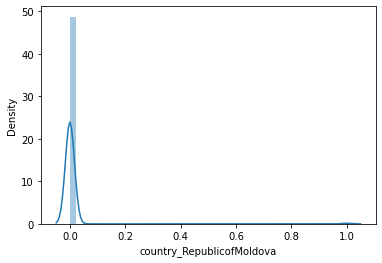

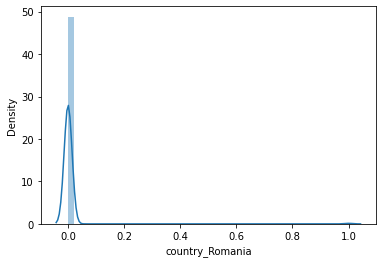

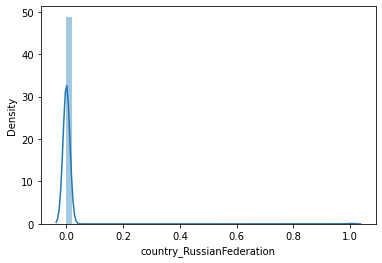

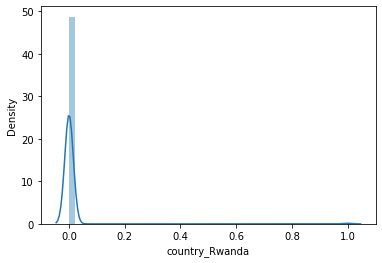

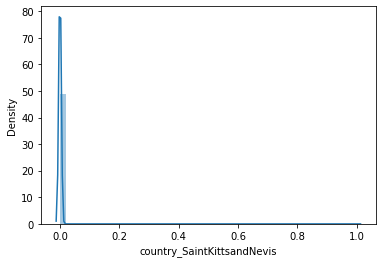

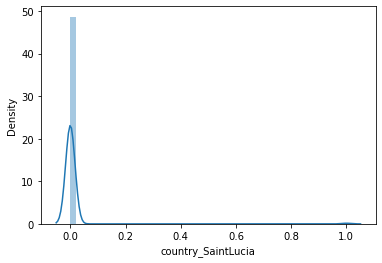

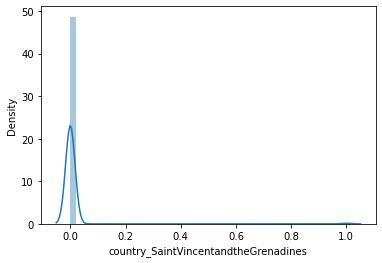

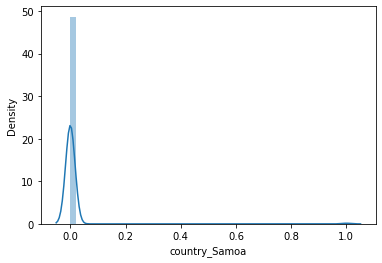

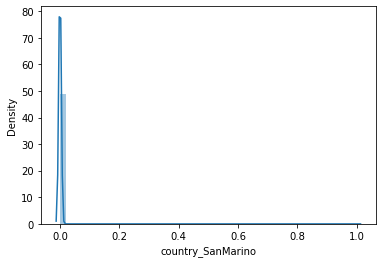

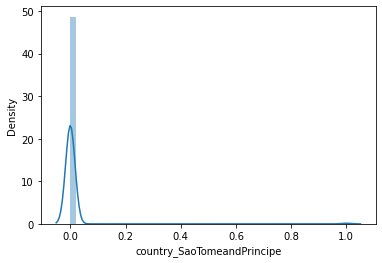

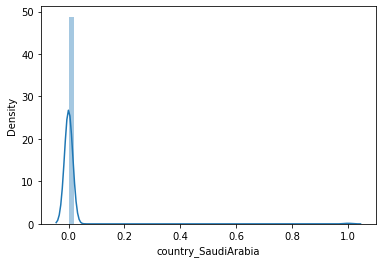

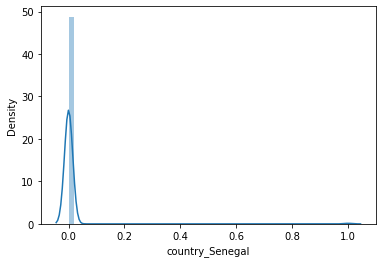

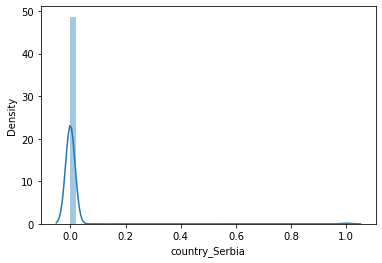

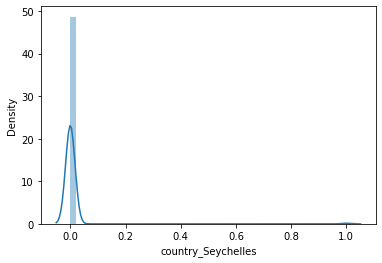

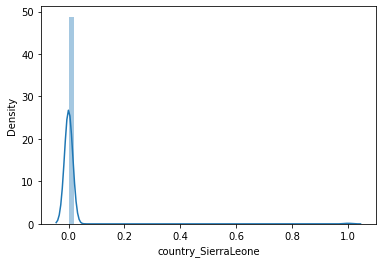

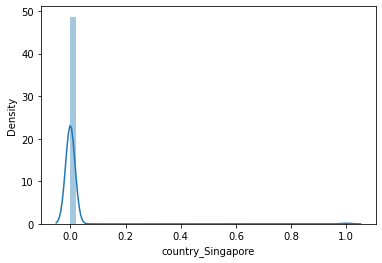

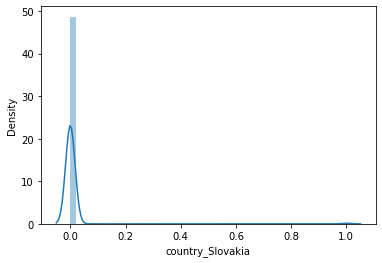

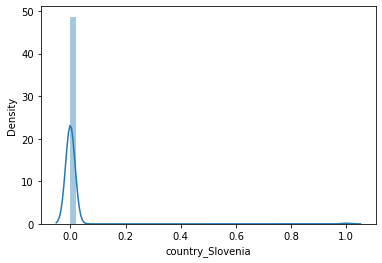

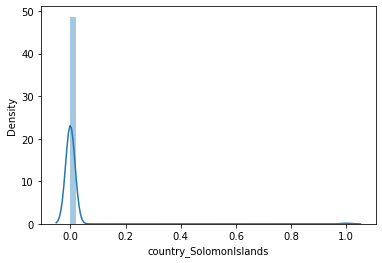

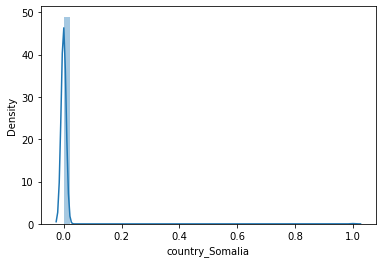

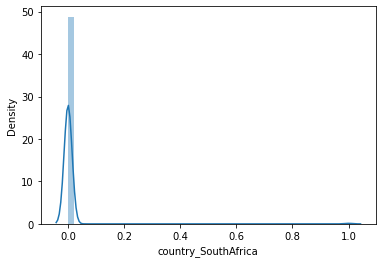

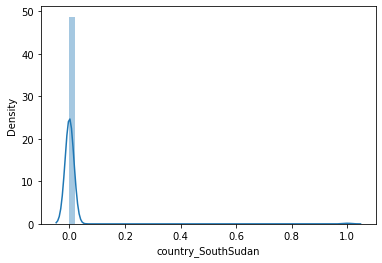

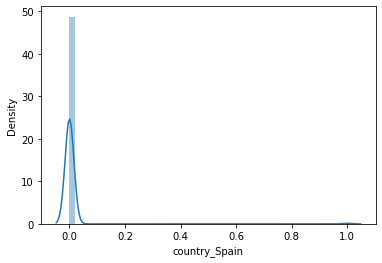

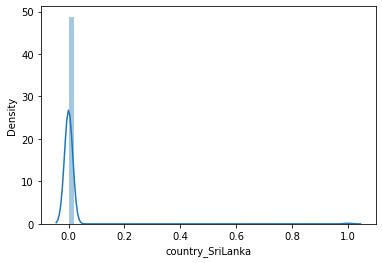

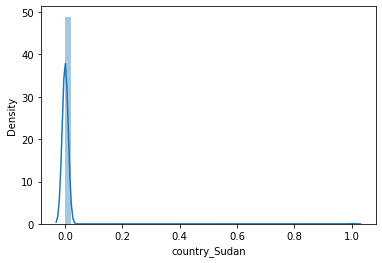

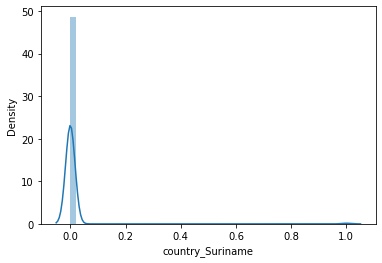

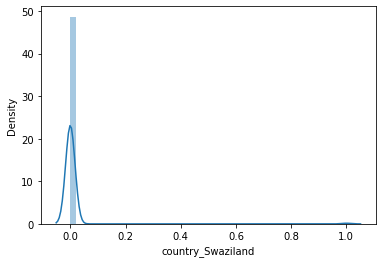

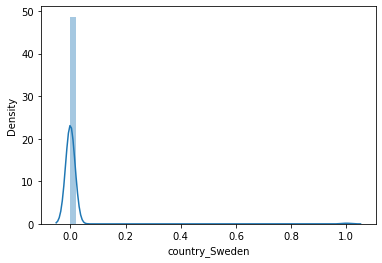

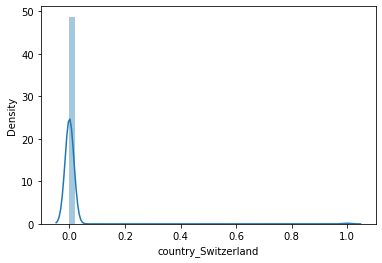

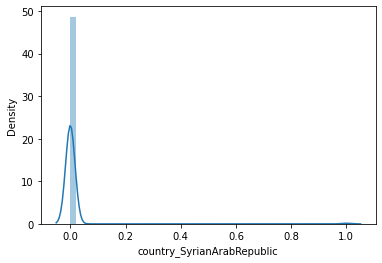

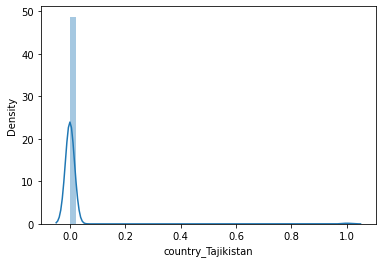

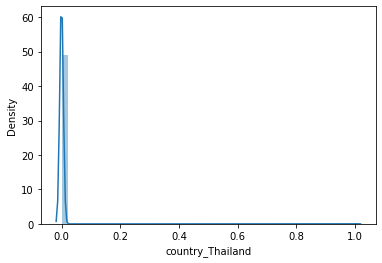

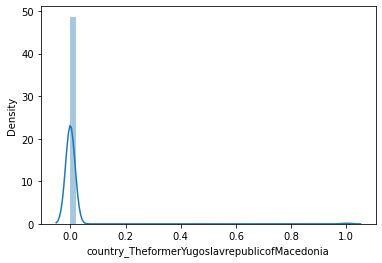

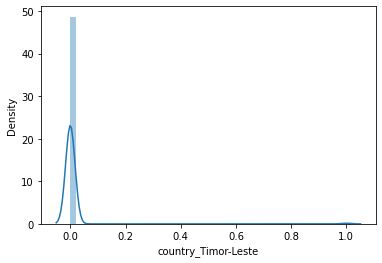

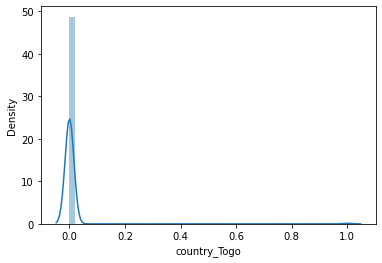

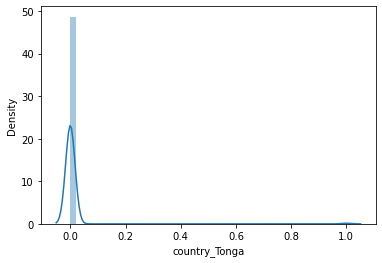

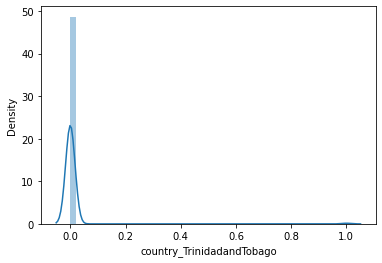

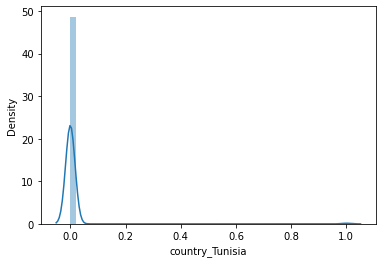

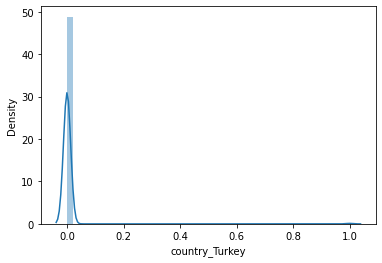

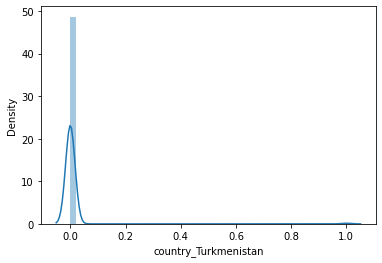

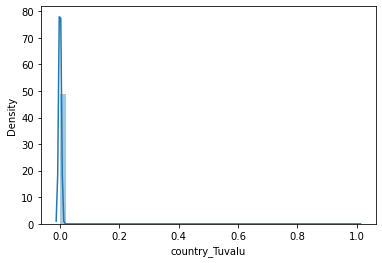

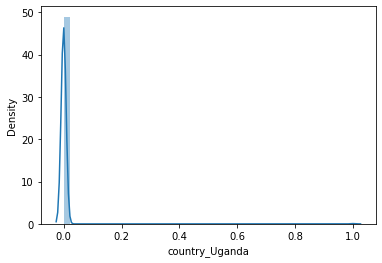

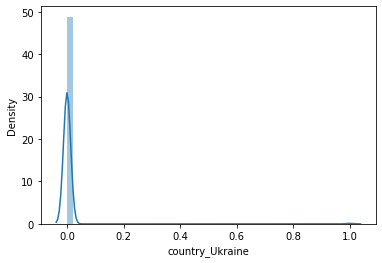

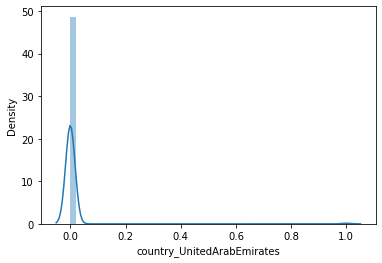

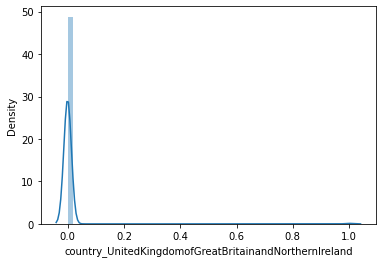

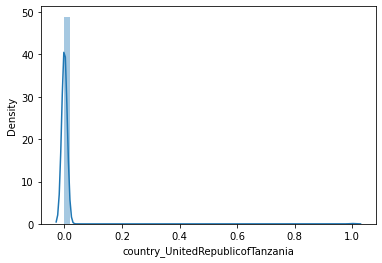

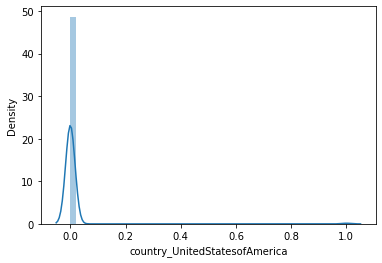

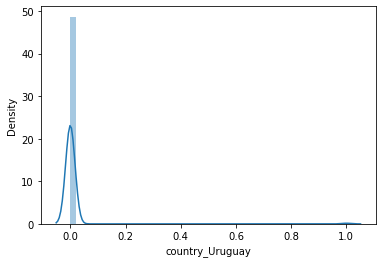

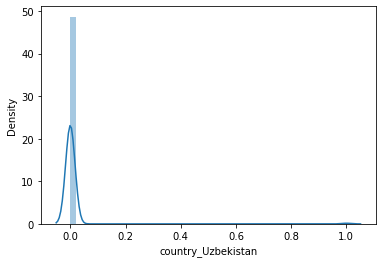

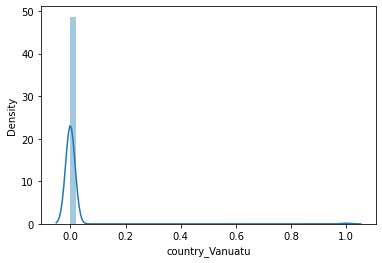

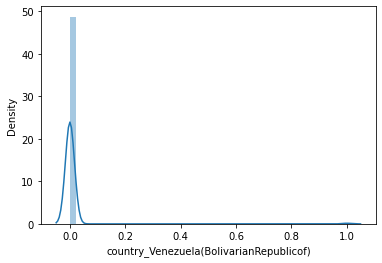

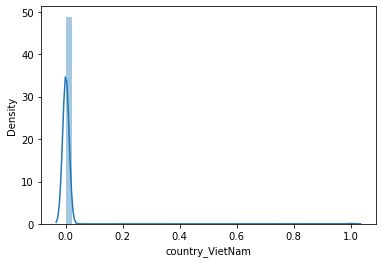

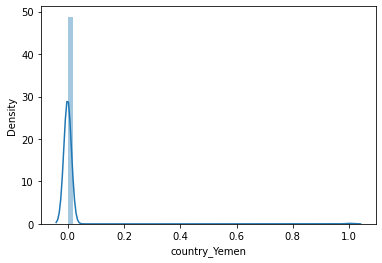

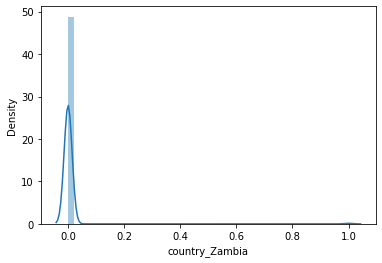

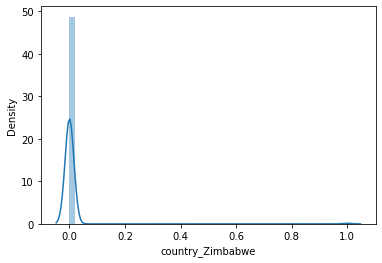

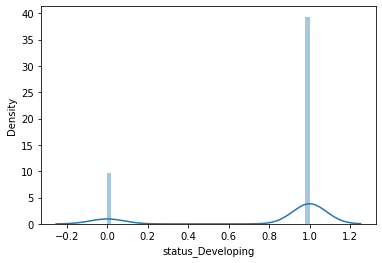

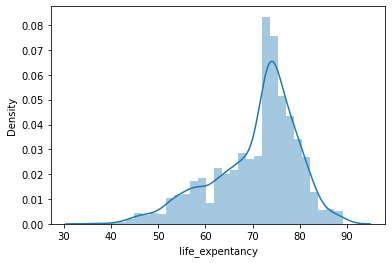

In [63]:
#show the distribution plot for every numerical column after removing the outliers
for col in newdf.columns:
    sns.distplot(newdf[col])
    plt.show()

<AxesSubplot:>

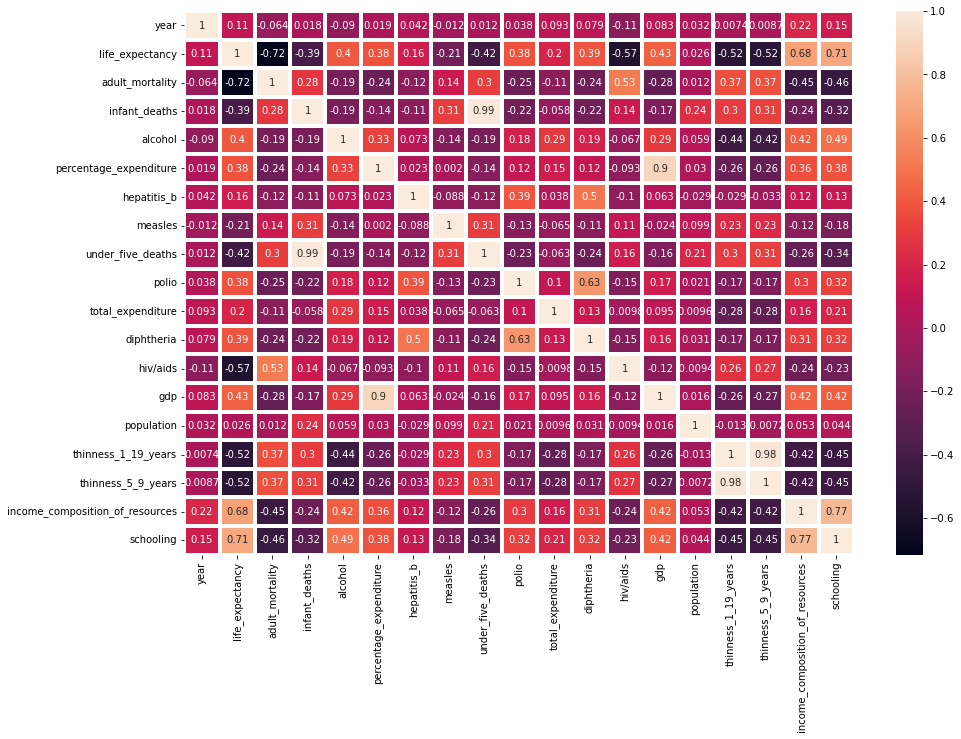

In [64]:

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot =True, linewidths = 4)

# finding multicorrelation using heatmap()

In [65]:
df.corr()

year  life_expectancy  adult_mortality  \
year                             1.000000         0.107639        -0.064023   
life_expectancy                  0.107639         1.000000        -0.715559   
adult_mortality                 -0.064023        -0.715559         1.000000   
infant_deaths                    0.018111        -0.392813         0.281732   
alcohol                         -0.089815         0.399256        -0.190442   
percentage_expenditure           0.018897         0.380094        -0.241081   
hepatitis_b                      0.042406         0.157648        -0.124690   
measles                         -0.011958        -0.206265         0.138337   
under_five_deaths                0.011966        -0.424943         0.304417   
polio                            0.038424         0.376815        -0.245487   
total_expenditure                0.093097         0.200565        -0.114551   
diphtheria                       0.078748         0.386250        -0.236730   
hiv/aids                        -0.113317        -0.566456         0.529402   
gdp                              0.083294         0.426623        -0.279610   
population                       0.032442         0.026010         0.012165   
thinness_1_19_years              0.007417        -0.519366         0.368370   
thinness_5_9_years               0.008749        -0.521943         0.373717   
income_composition_of_resources  0.215795         0.675471        -0.451907   
schooling                        0.153900         0.709358        -0.457631   

                                 infant_deaths   alcohol  \
year                                  0.018111 -0.089815   
life_expectancy                      -0.392813  0.399256   
adult_mortality                       0.281732 -0.190442   
infant_deaths                         1.000000 -0.189258   
alcohol                              -0.189258  1.000000   
percentage_expenditure               -0.138886  0.325231   
hepatitis_b                          -0.111806  0.072569   
measles                               0.308503 -0.142467   
under_five_deaths                     0.990513 -0.187782   
polio                                -0.215131  0.176594   
total_expenditure                    -0.057592  0.285403   
diphtheria                           -0.217287  0.185149   
hiv/aids                              0.140725 -0.066817   
gdp                                  -0.166038  0.291728   
population                            0.243327  0.058674   
thinness_1_19_years                   0.297053 -0.436402   
thinness_5_9_years                    0.310290 -0.423380   
income_composition_of_resources      -0.239067  0.417376   
schooling                            -0.316685  0.486623   

                                 percentage_expenditure  hepatitis_b  \
year                                           0.018897     0.042406   
life_expectancy                                0.380094     0.157648   
adult_mortality                               -0.241081    -0.124690   
infant_deaths                                 -0.138886    -0.111806   
alcohol                                        0.325231     0.072569   
percentage_expenditure                         1.000000     0.022965   
hepatitis_b                                    0.022965     1.000000   
measles                                        0.002001    -0.088388   
under_five_deaths                             -0.135932    -0.120616   
polio                                          0.121978     0.385338   
total_expenditure                              0.154580     0.038388   
diphtheria                                     0.117210     0.497436   
hiv/aids                                      -0.093052    -0.103485   
gdp                                            0.903084     0.063193   
population                                     0.029770    -0.028660   
thinness_1_19_years                           -0.259793    -0.028658   
thinness_5_9_years             

# Through data exploration we will try to explore life_expectancy.

## As we can see from the heat map that Life_expectancy has positive relation with schooling,Income_composition_of_resources, GDP,Diphtheria, Polio, and Percentage_expenditure.

## Life_expectancy has negative relation with Adult_mortality, Thinness_1-19_years, Thinness_5-9_years, HIV/AIDS, Under_five_deaths, and Infant_deaths.

## visually representig each and every feature with respect to country





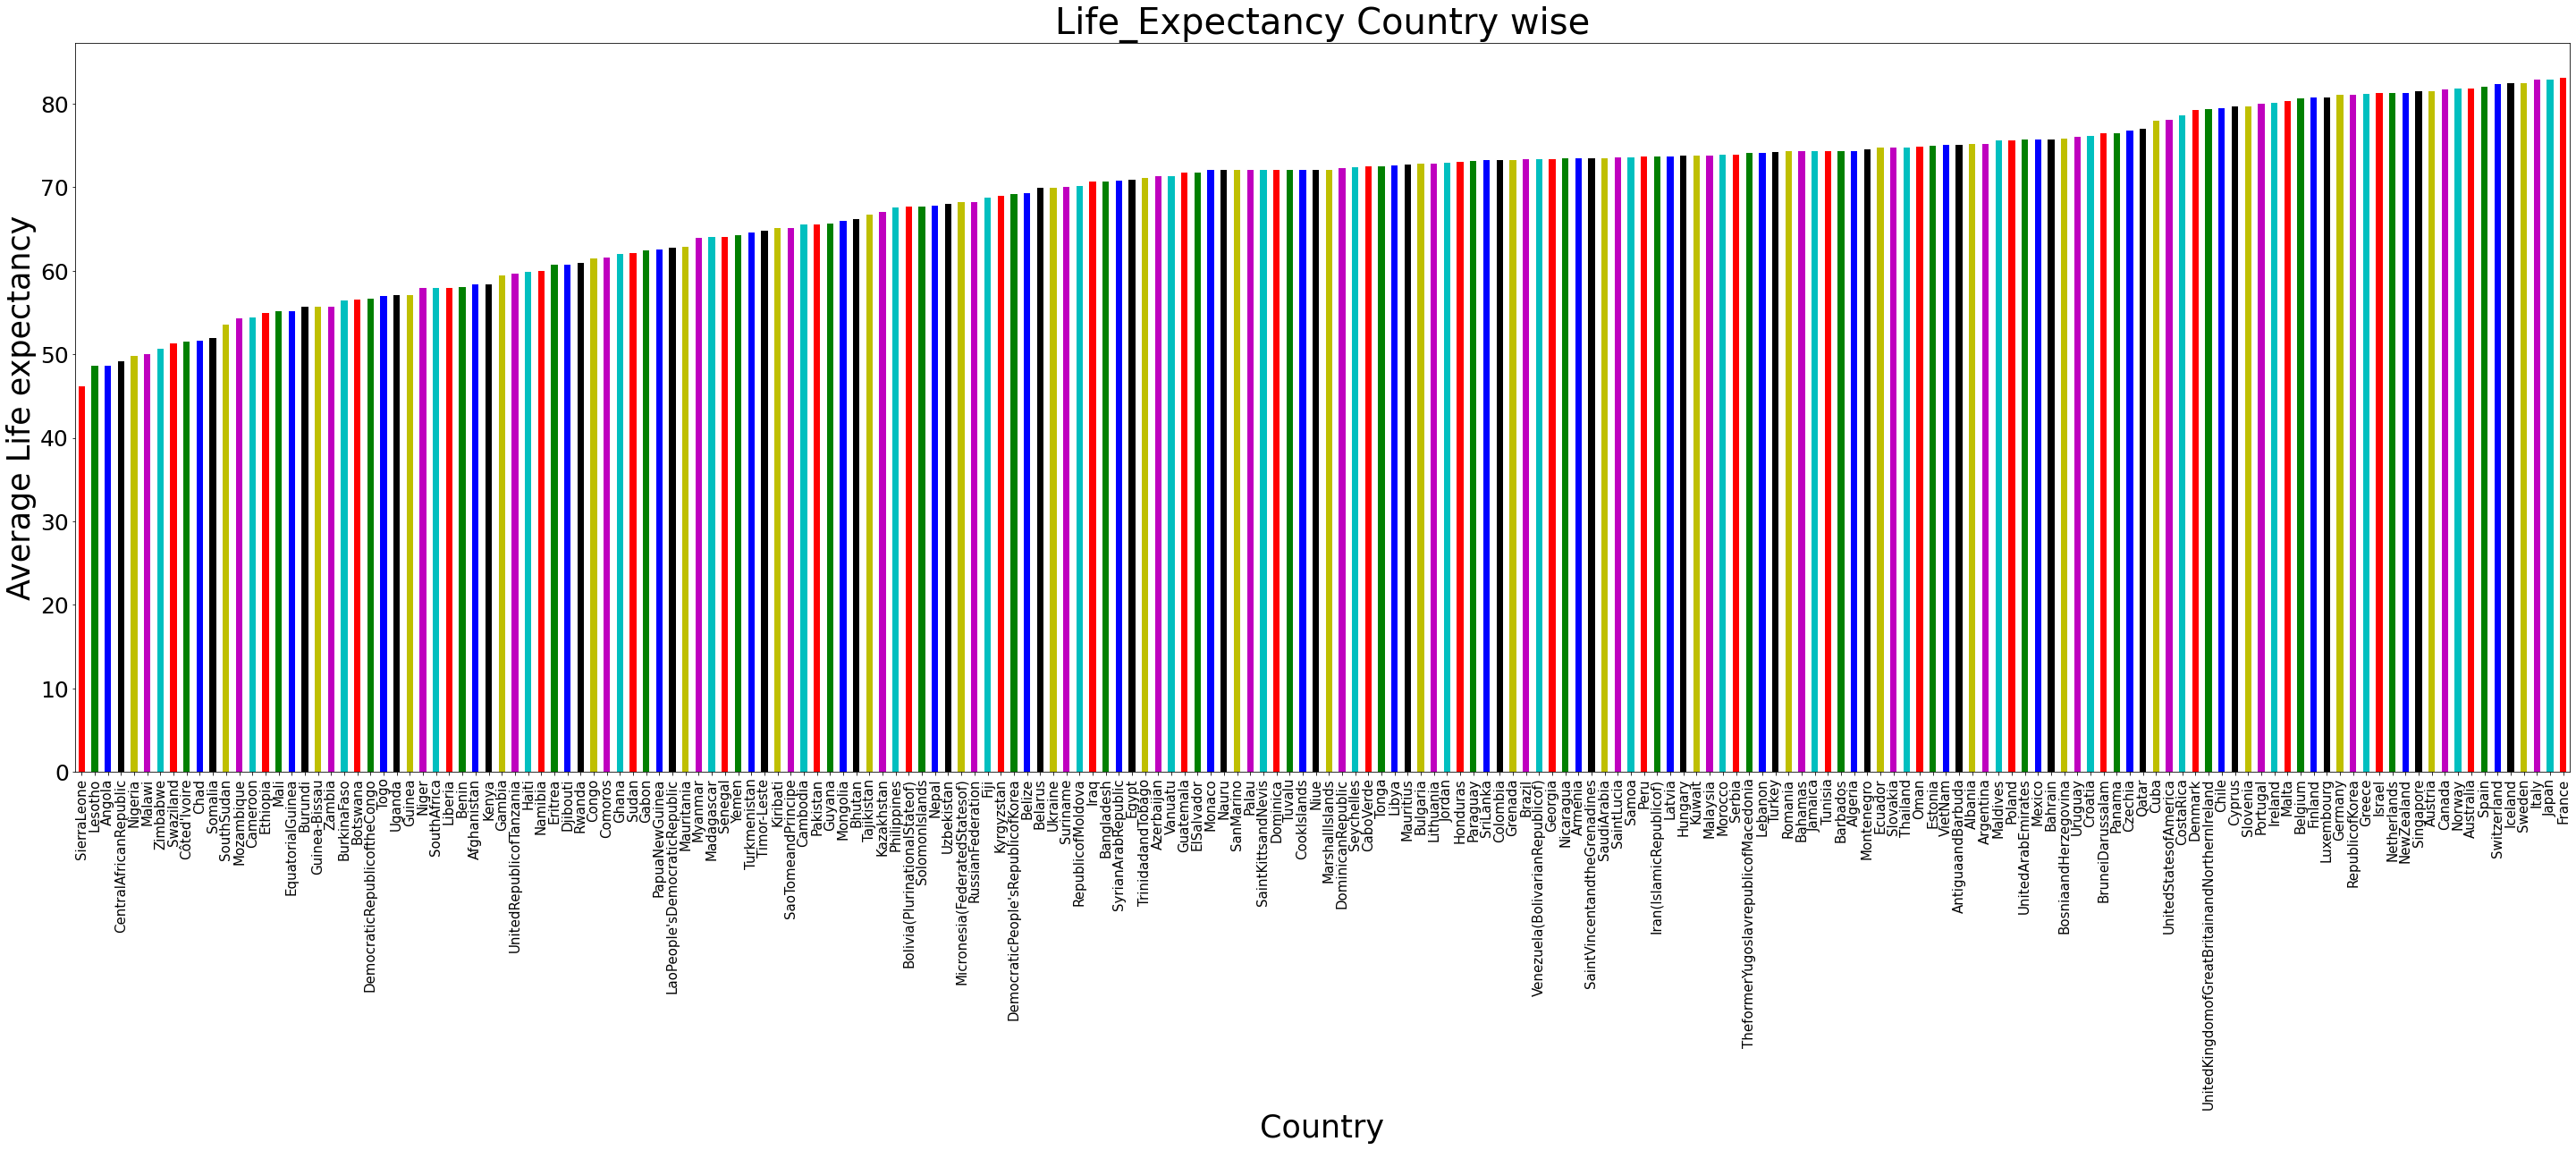

In [66]:
df_country = df.groupby('country')['life_expectancy'].mean().sort_values(ascending=True)
df_country 
my_colors = list('rgbkymc')
df_country.plot(kind='bar', figsize=(50,15), fontsize=25,color=my_colors)
plt.title("Life_Expectancy Country wise",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Average Life expectancy",fontsize=35)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

# Japan is the country with the highest Life expectancy value followed by Sweden and Sierra Leone has the lowest Life expectancy value

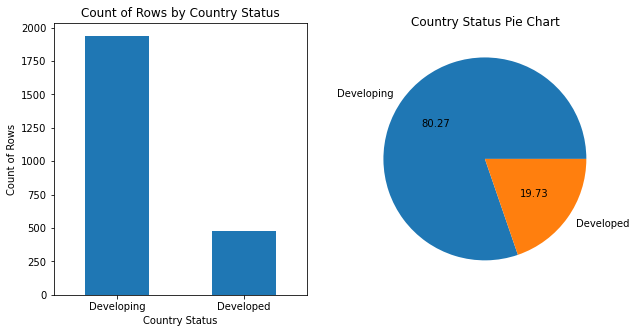

In [67]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
df.status.value_counts().plot(kind='bar')
plt.title('Count of Rows by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Count of Rows')
plt.xticks(rotation=0)

plt.subplot(122)
df.status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()

In [68]:
dfo.columns

Index(['year', 'adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'under_five_deaths',
       'polio', 'total_expenditure',
       ...
       'country_Uruguay', 'country_Uzbekistan', 'country_Vanuatu',
       'country_Venezuela(BolivarianRepublicof)', 'country_VietNam',
       'country_Yemen', 'country_Zambia', 'country_Zimbabwe',
       'status_Developing', 'life_expentancy'],
      dtype='object', length=209)

In [69]:
newdf.columns

Index(['year', 'adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'under_five_deaths',
       'polio', 'total_expenditure',
       ...
       'country_Uruguay', 'country_Uzbekistan', 'country_Vanuatu',
       'country_Venezuela(BolivarianRepublicof)', 'country_VietNam',
       'country_Yemen', 'country_Zambia', 'country_Zimbabwe',
       'status_Developing', 'life_expentancy'],
      dtype='object', length=209)

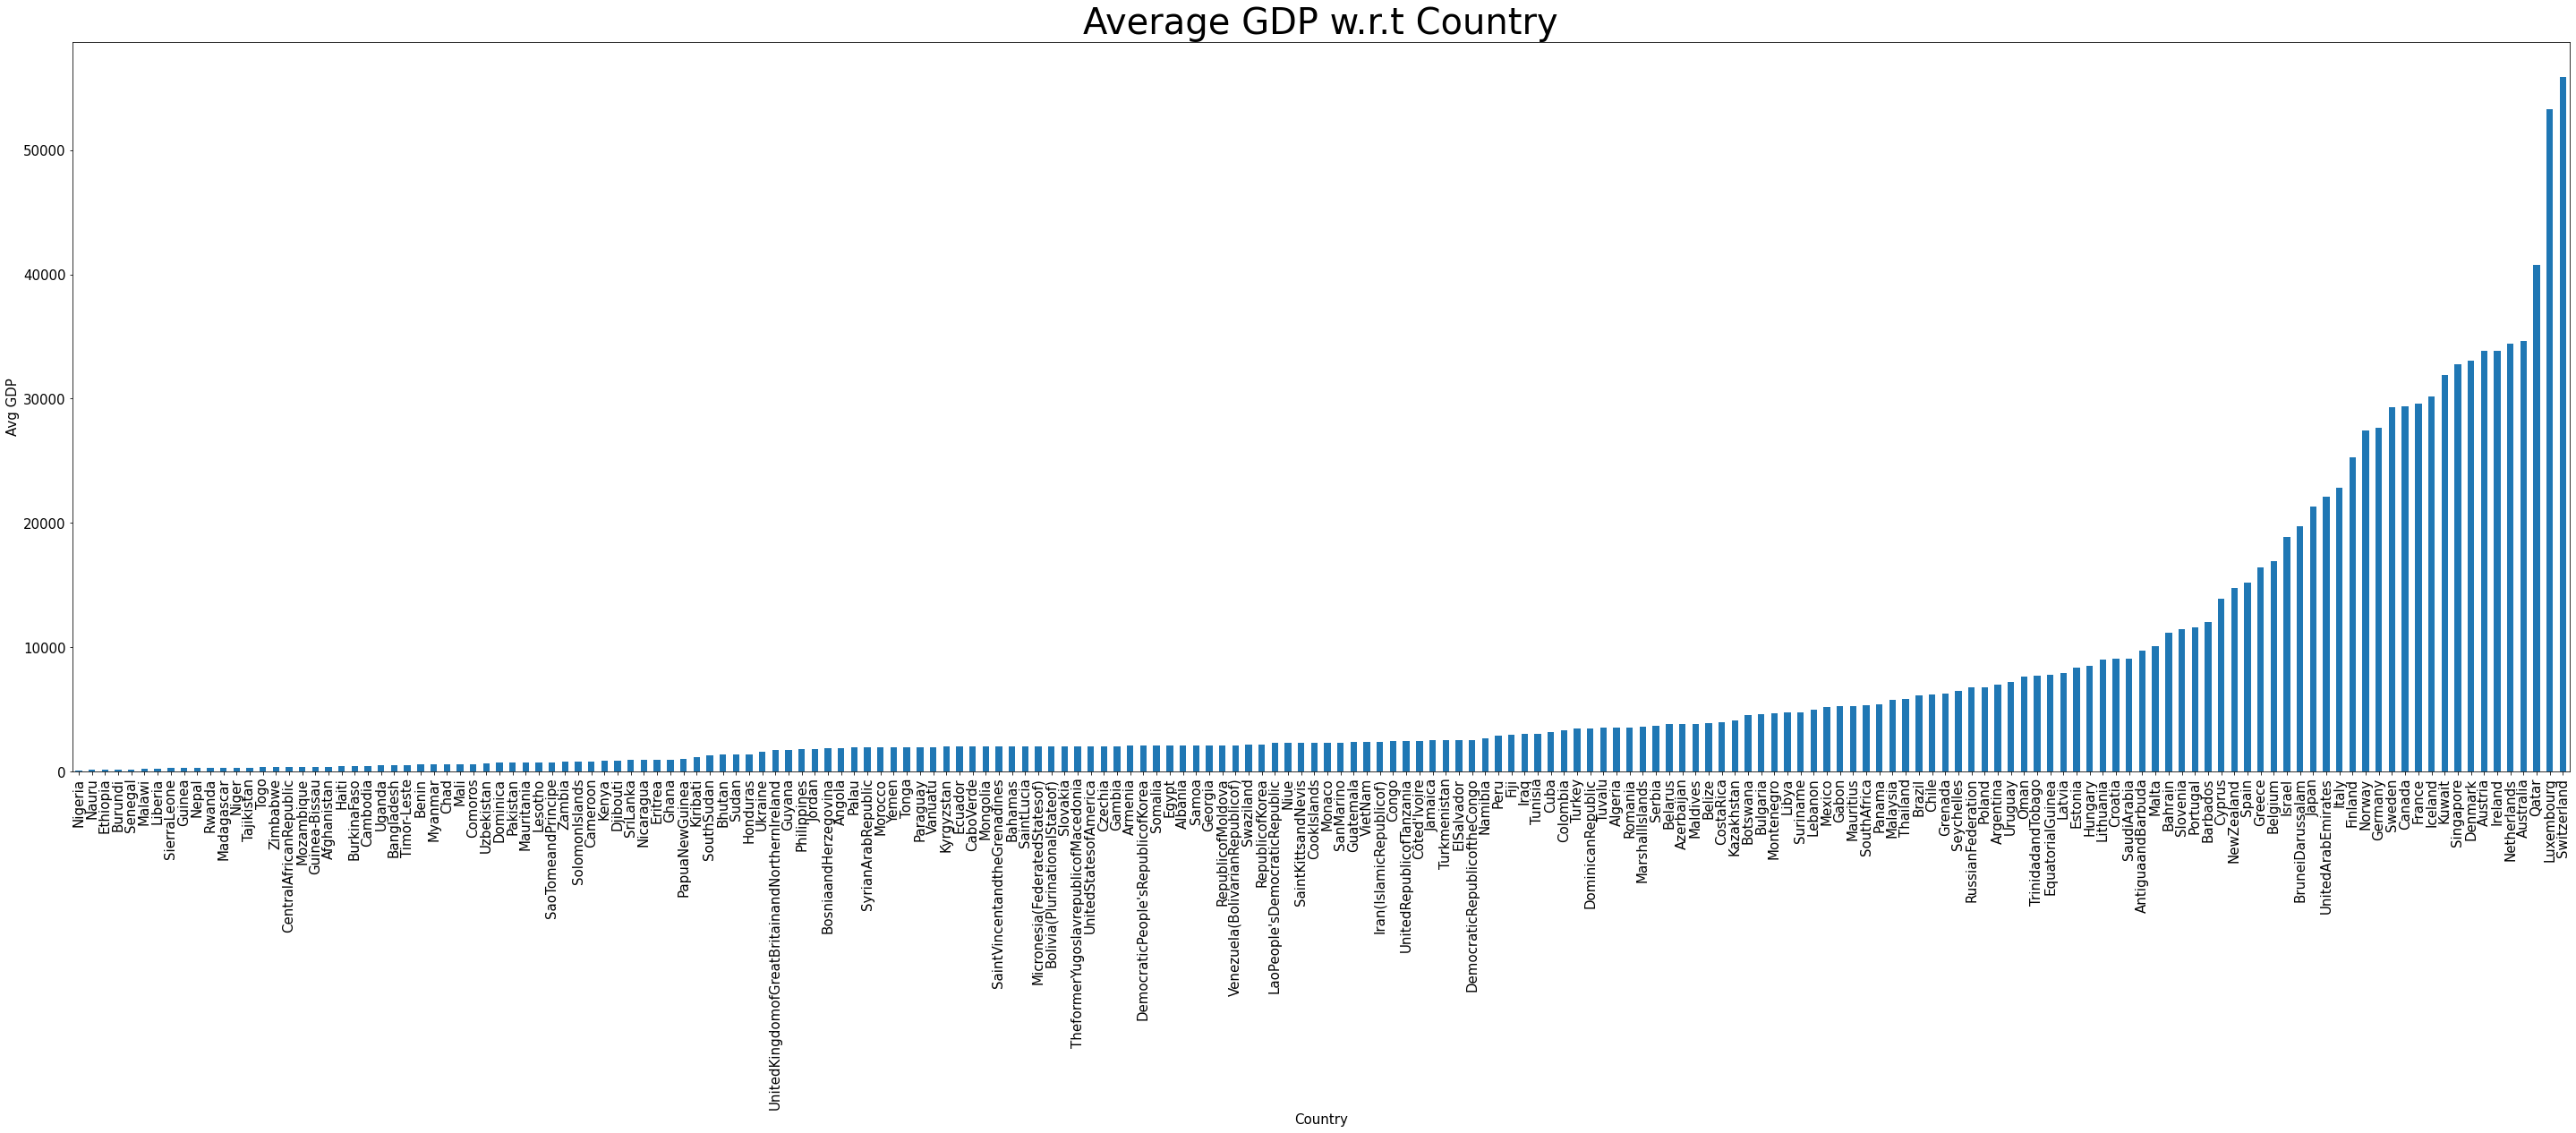

In [70]:
le_country = df.groupby('country')['gdp'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title("Average GDP w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Avg GDP",fontsize=15)
plt.show()

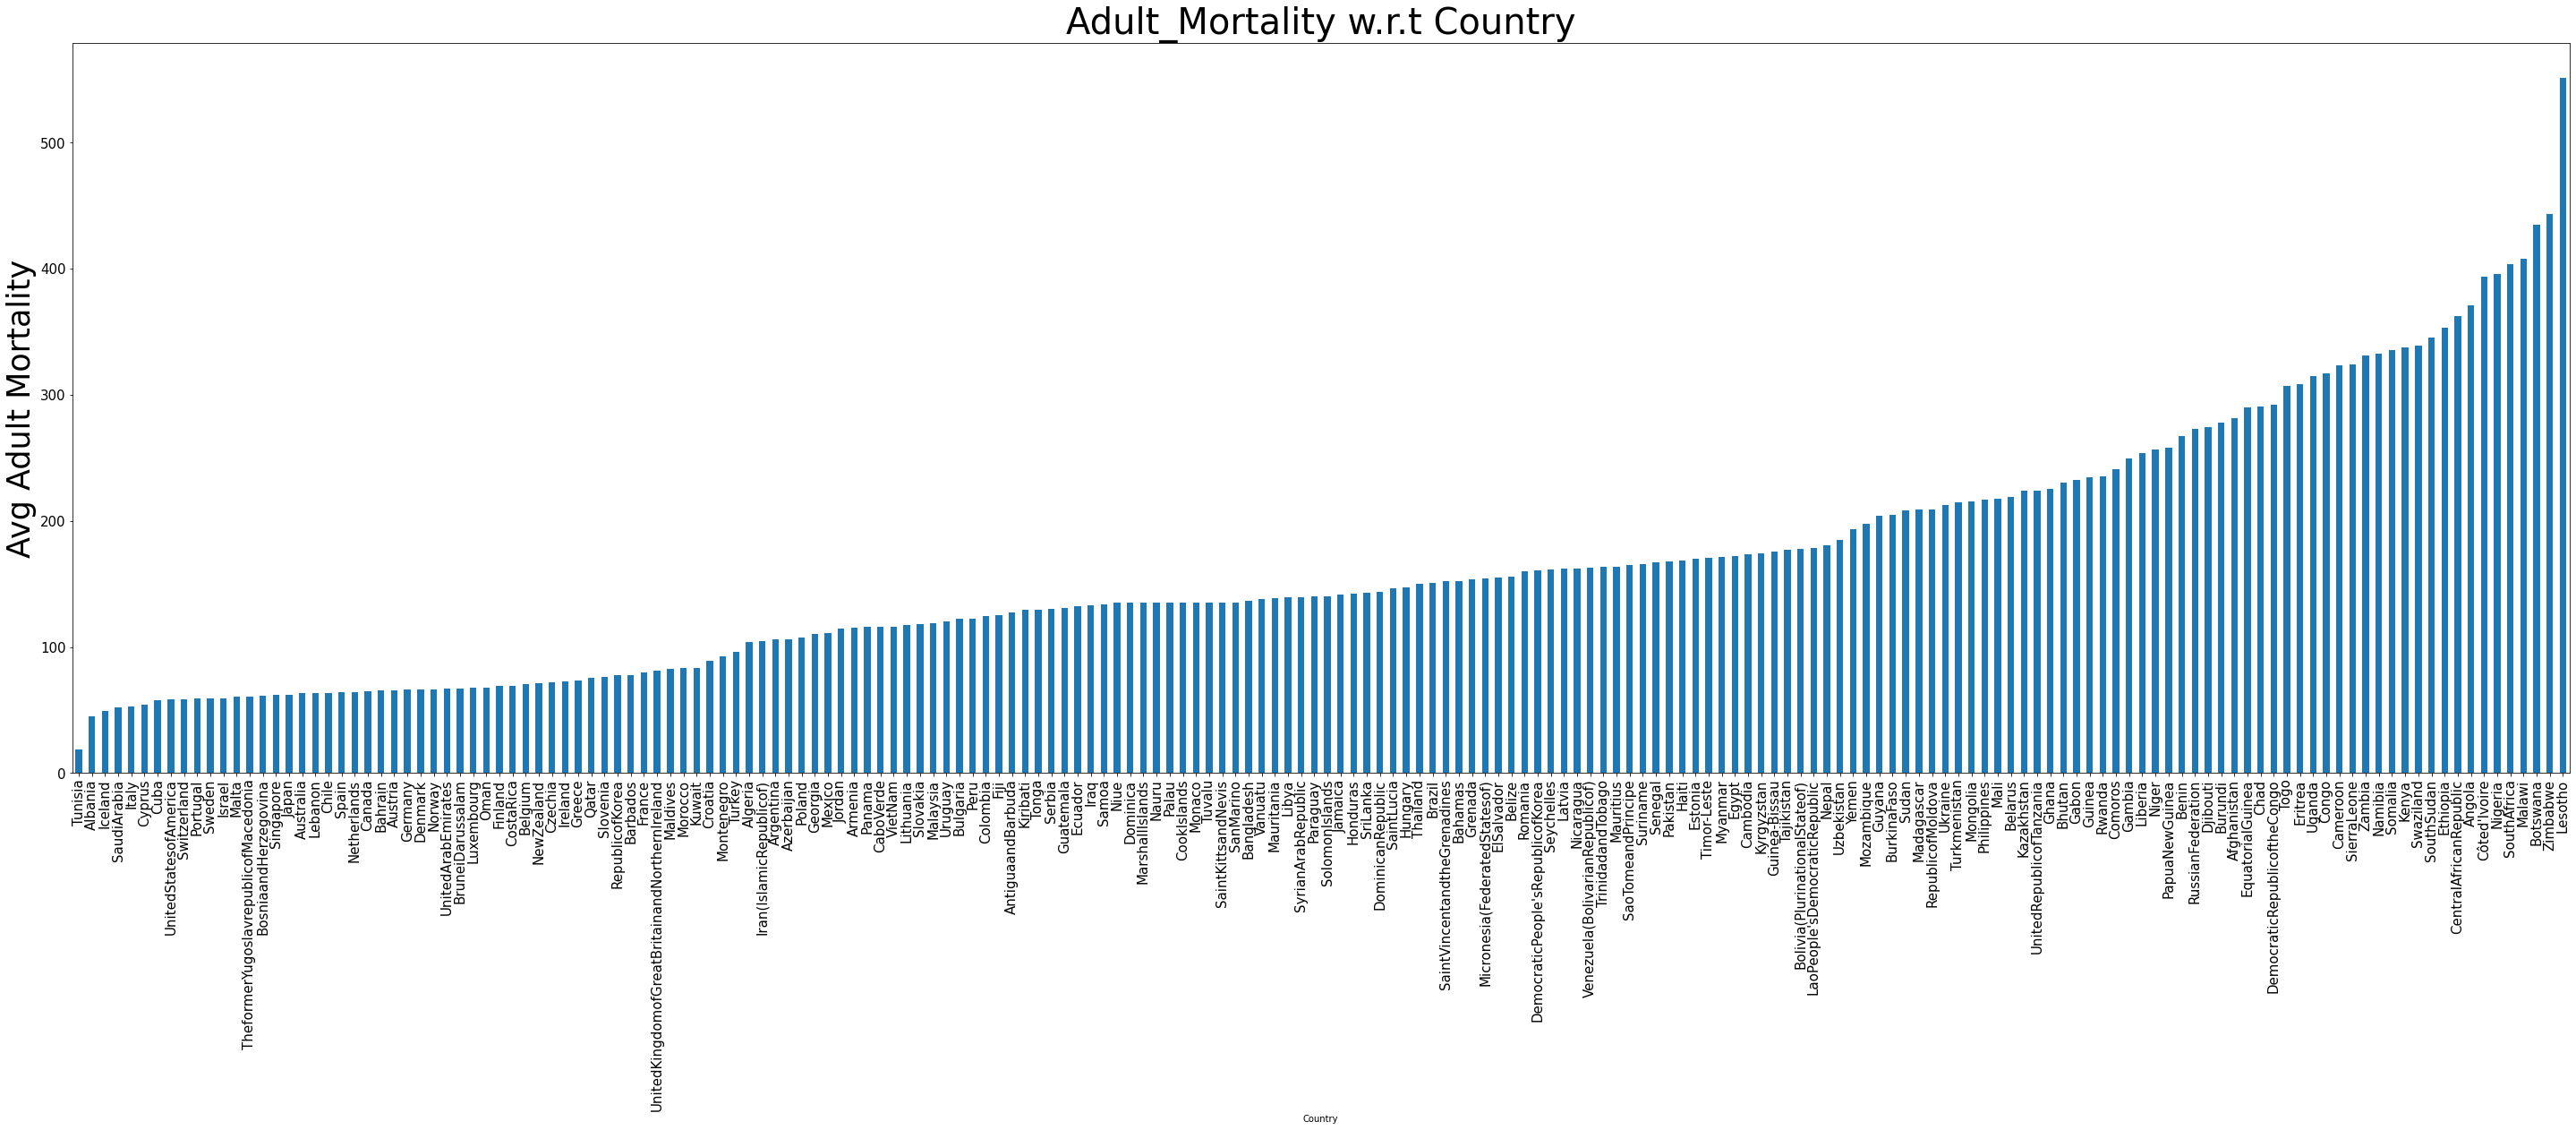

In [71]:
le_country = df.groupby('country')['adult_mortality'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title("Adult_Mortality w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=10)
plt.ylabel("Avg Adult Mortality",fontsize=35)
plt.show()

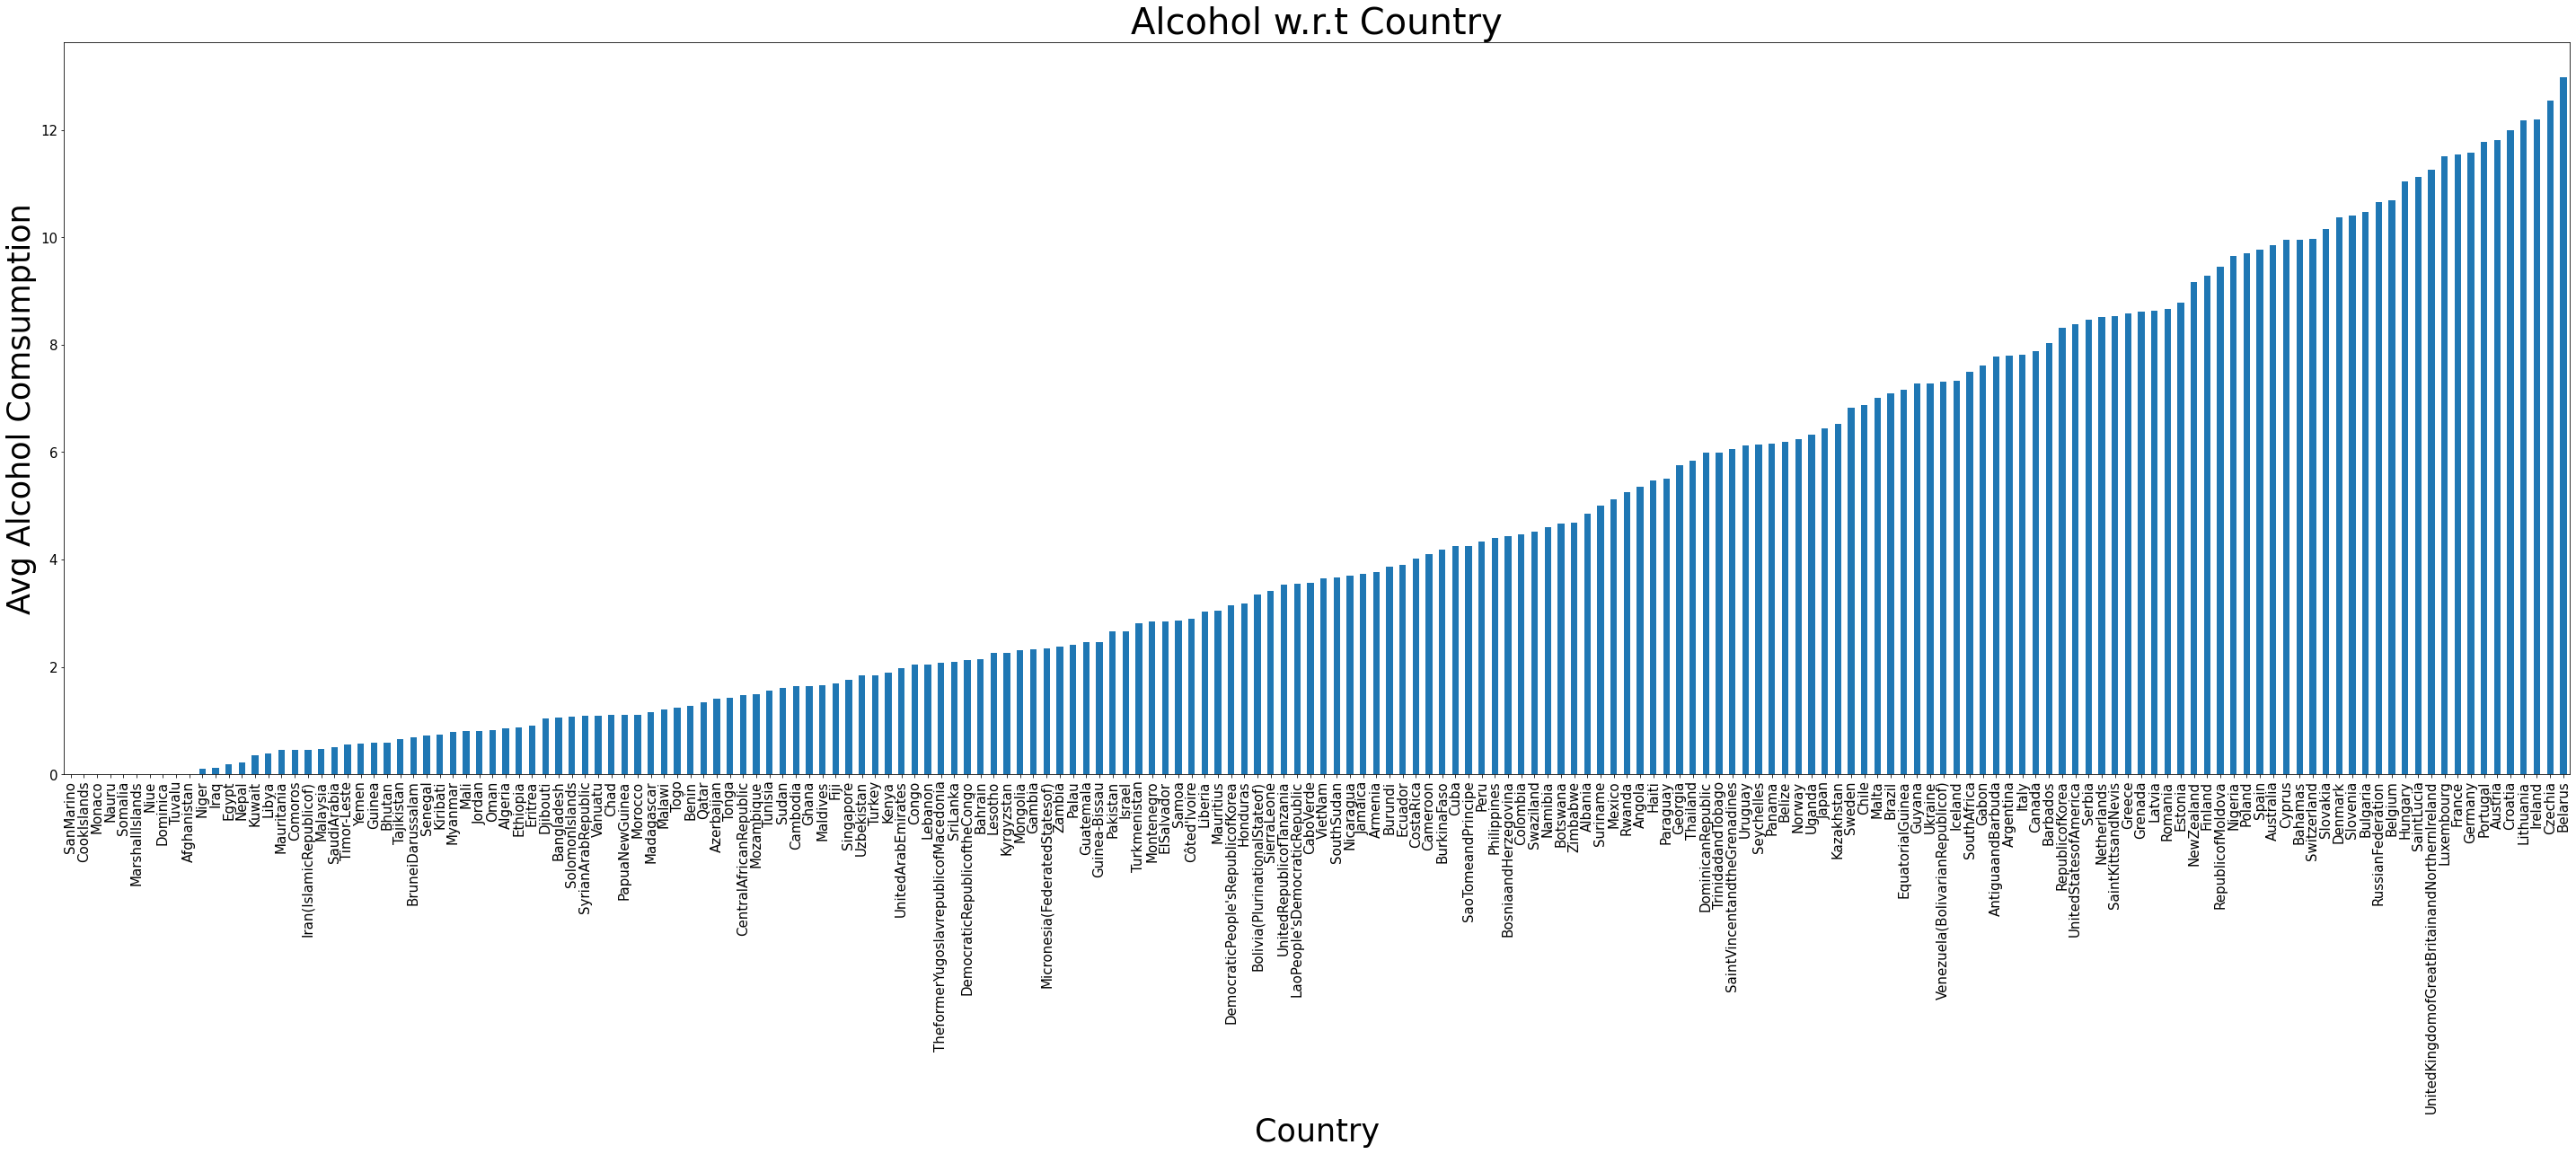

In [72]:
le_country = df.groupby('country')['alcohol'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title("Alcohol w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Alcohol Comsumption",fontsize=35)
plt.show()

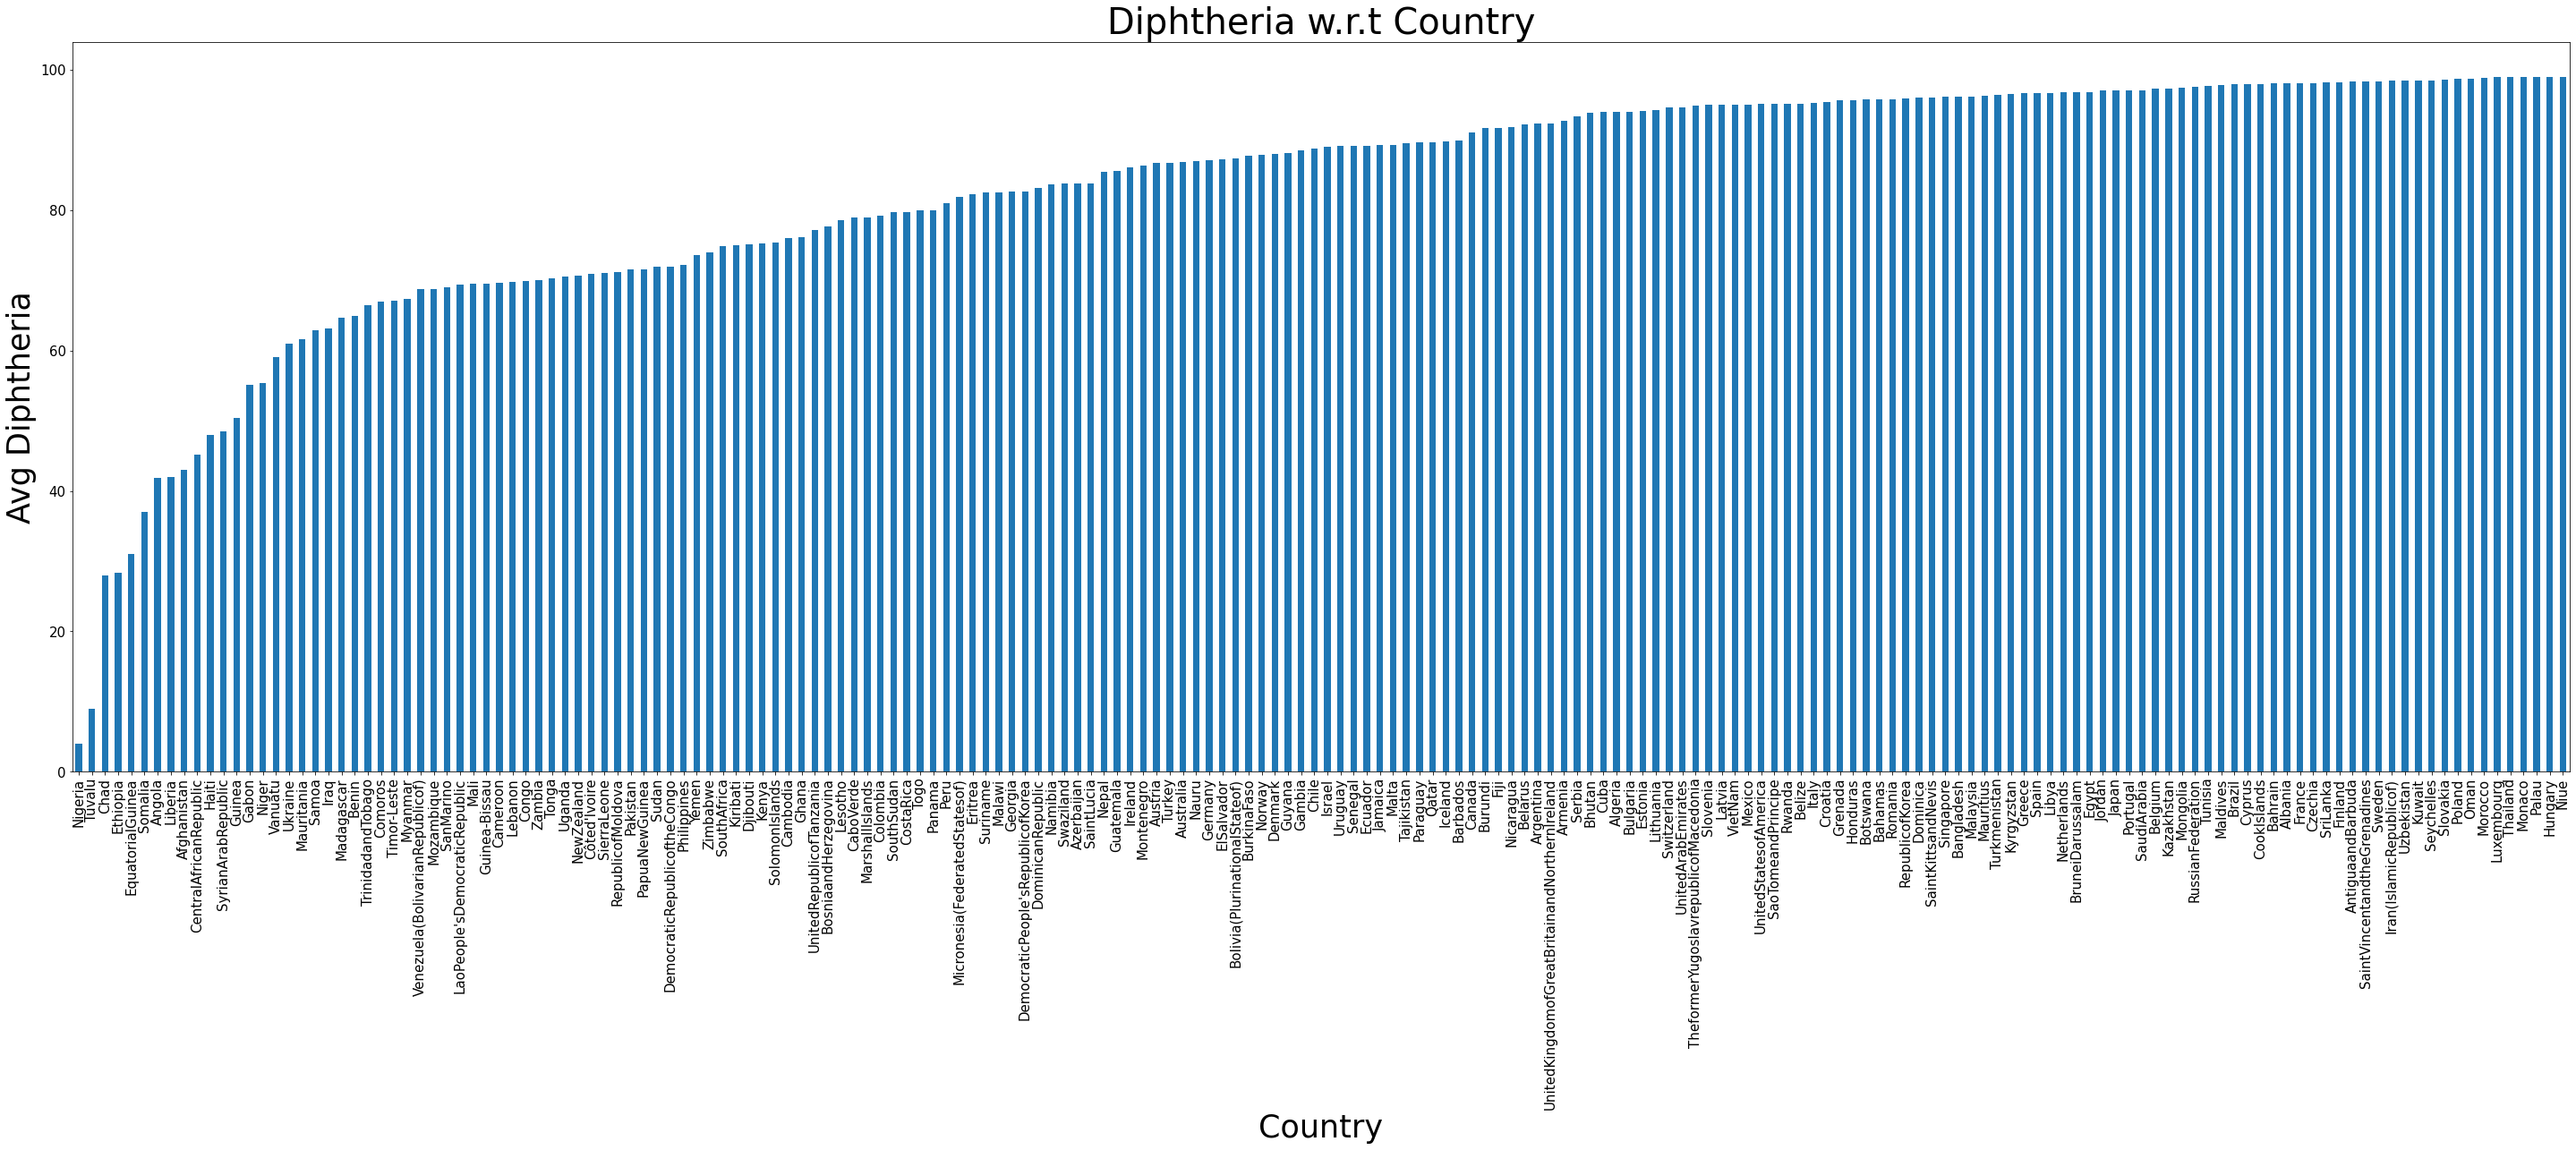

In [73]:
le_country = df.groupby('country')['diphtheria'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title("Diphtheria w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Diphtheria",fontsize=35)
plt.show()


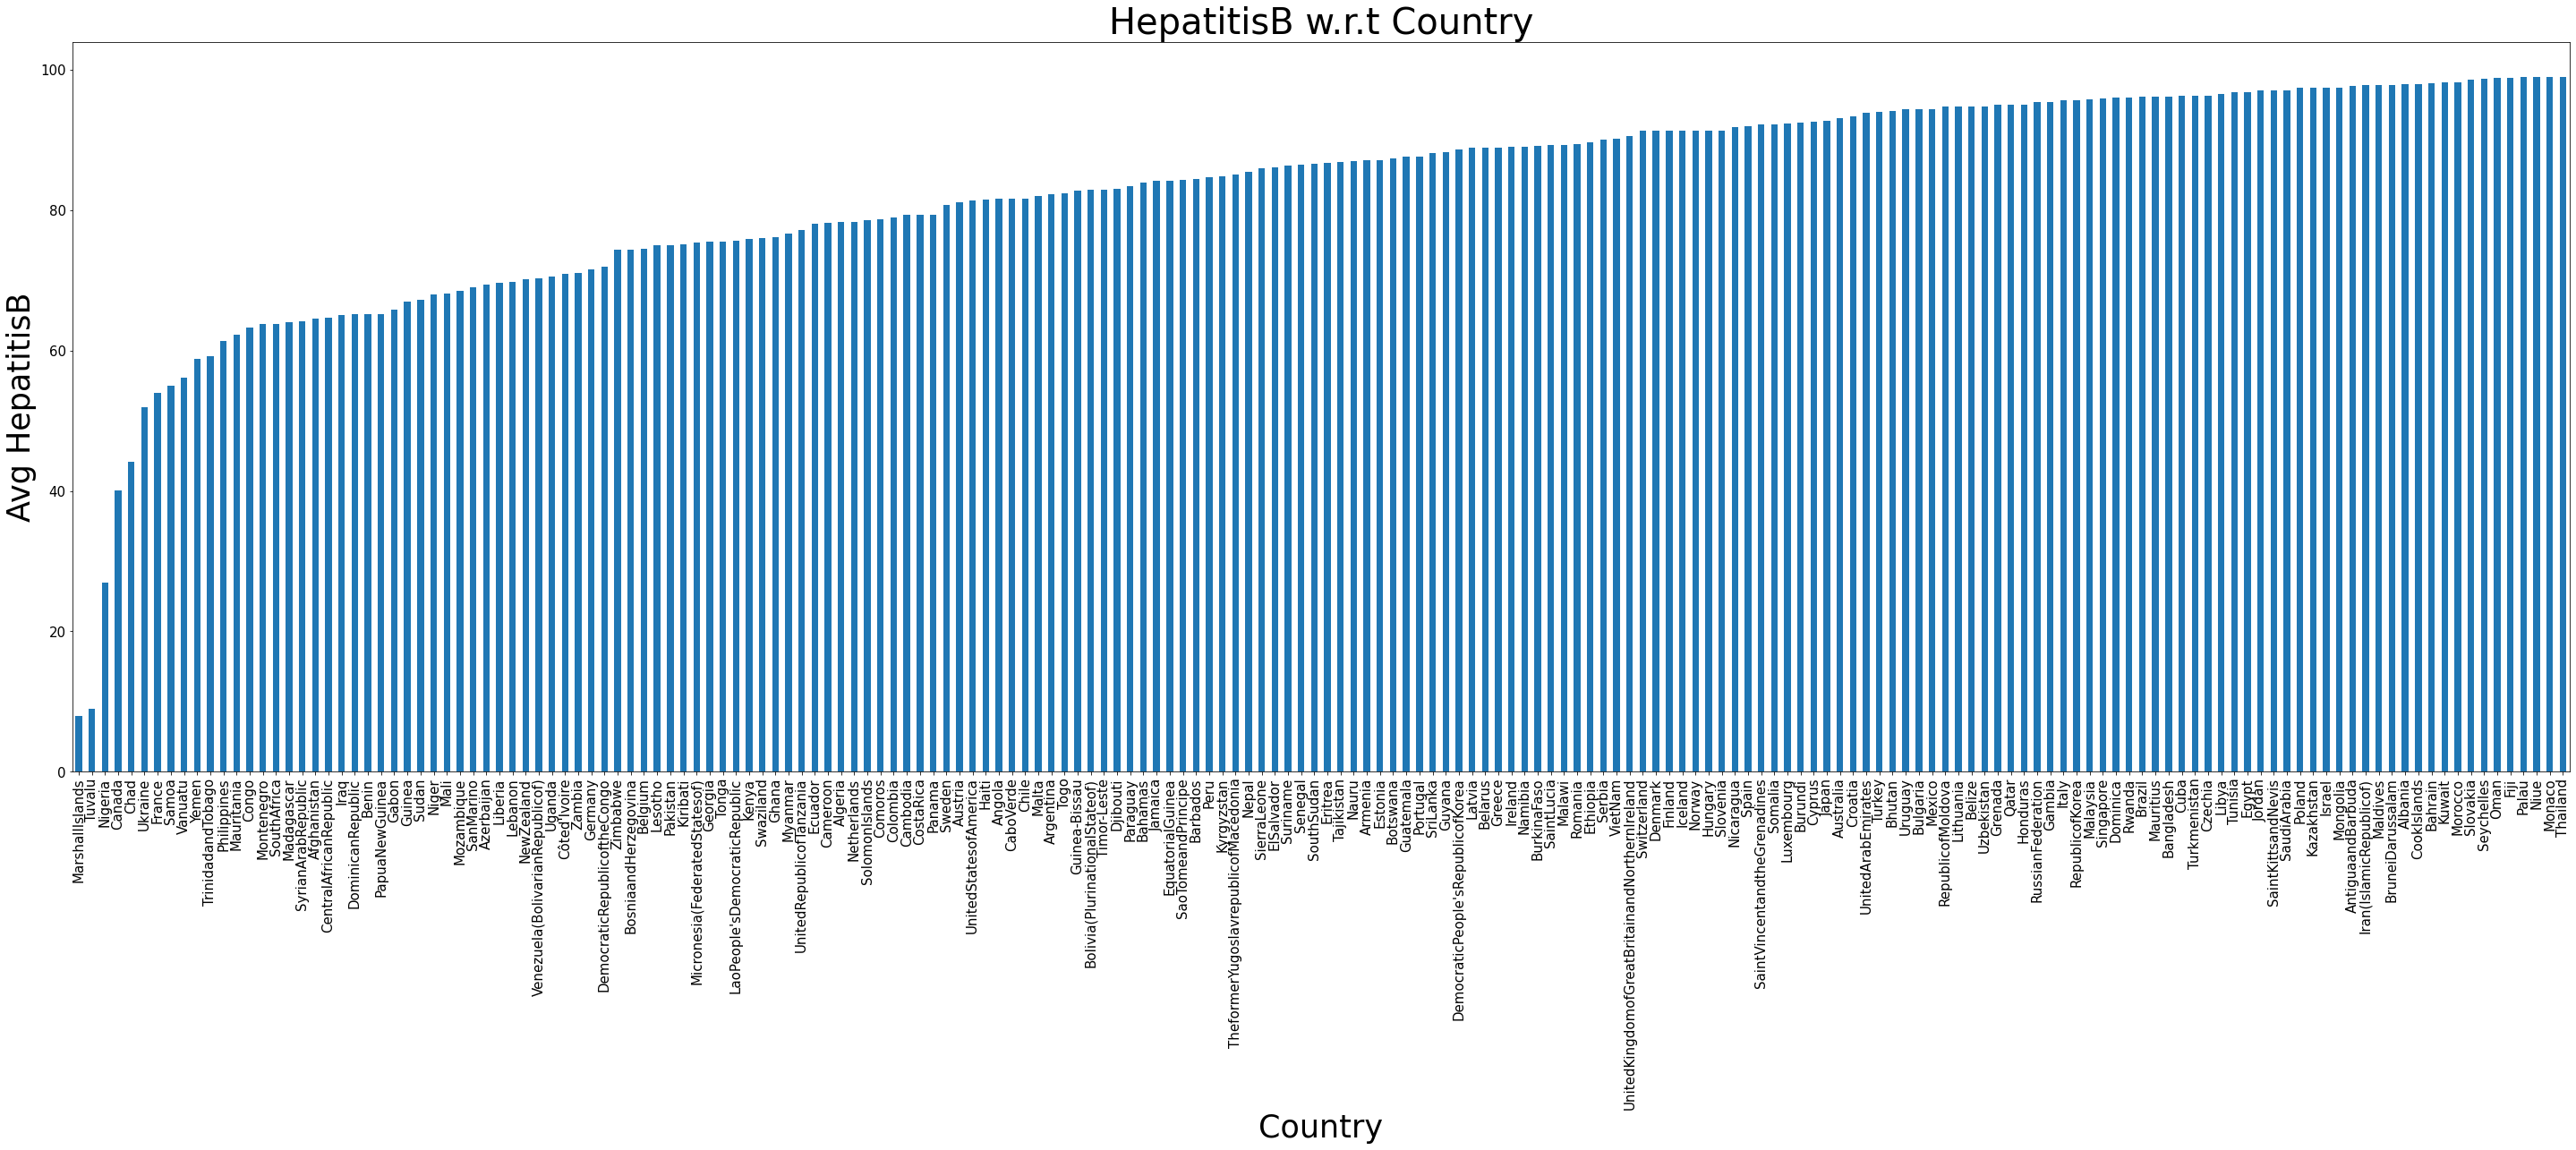

In [74]:
le_country = df.groupby('country')['hepatitis_b'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title("HepatitisB w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg HepatitisB",fontsize=35)
plt.show()

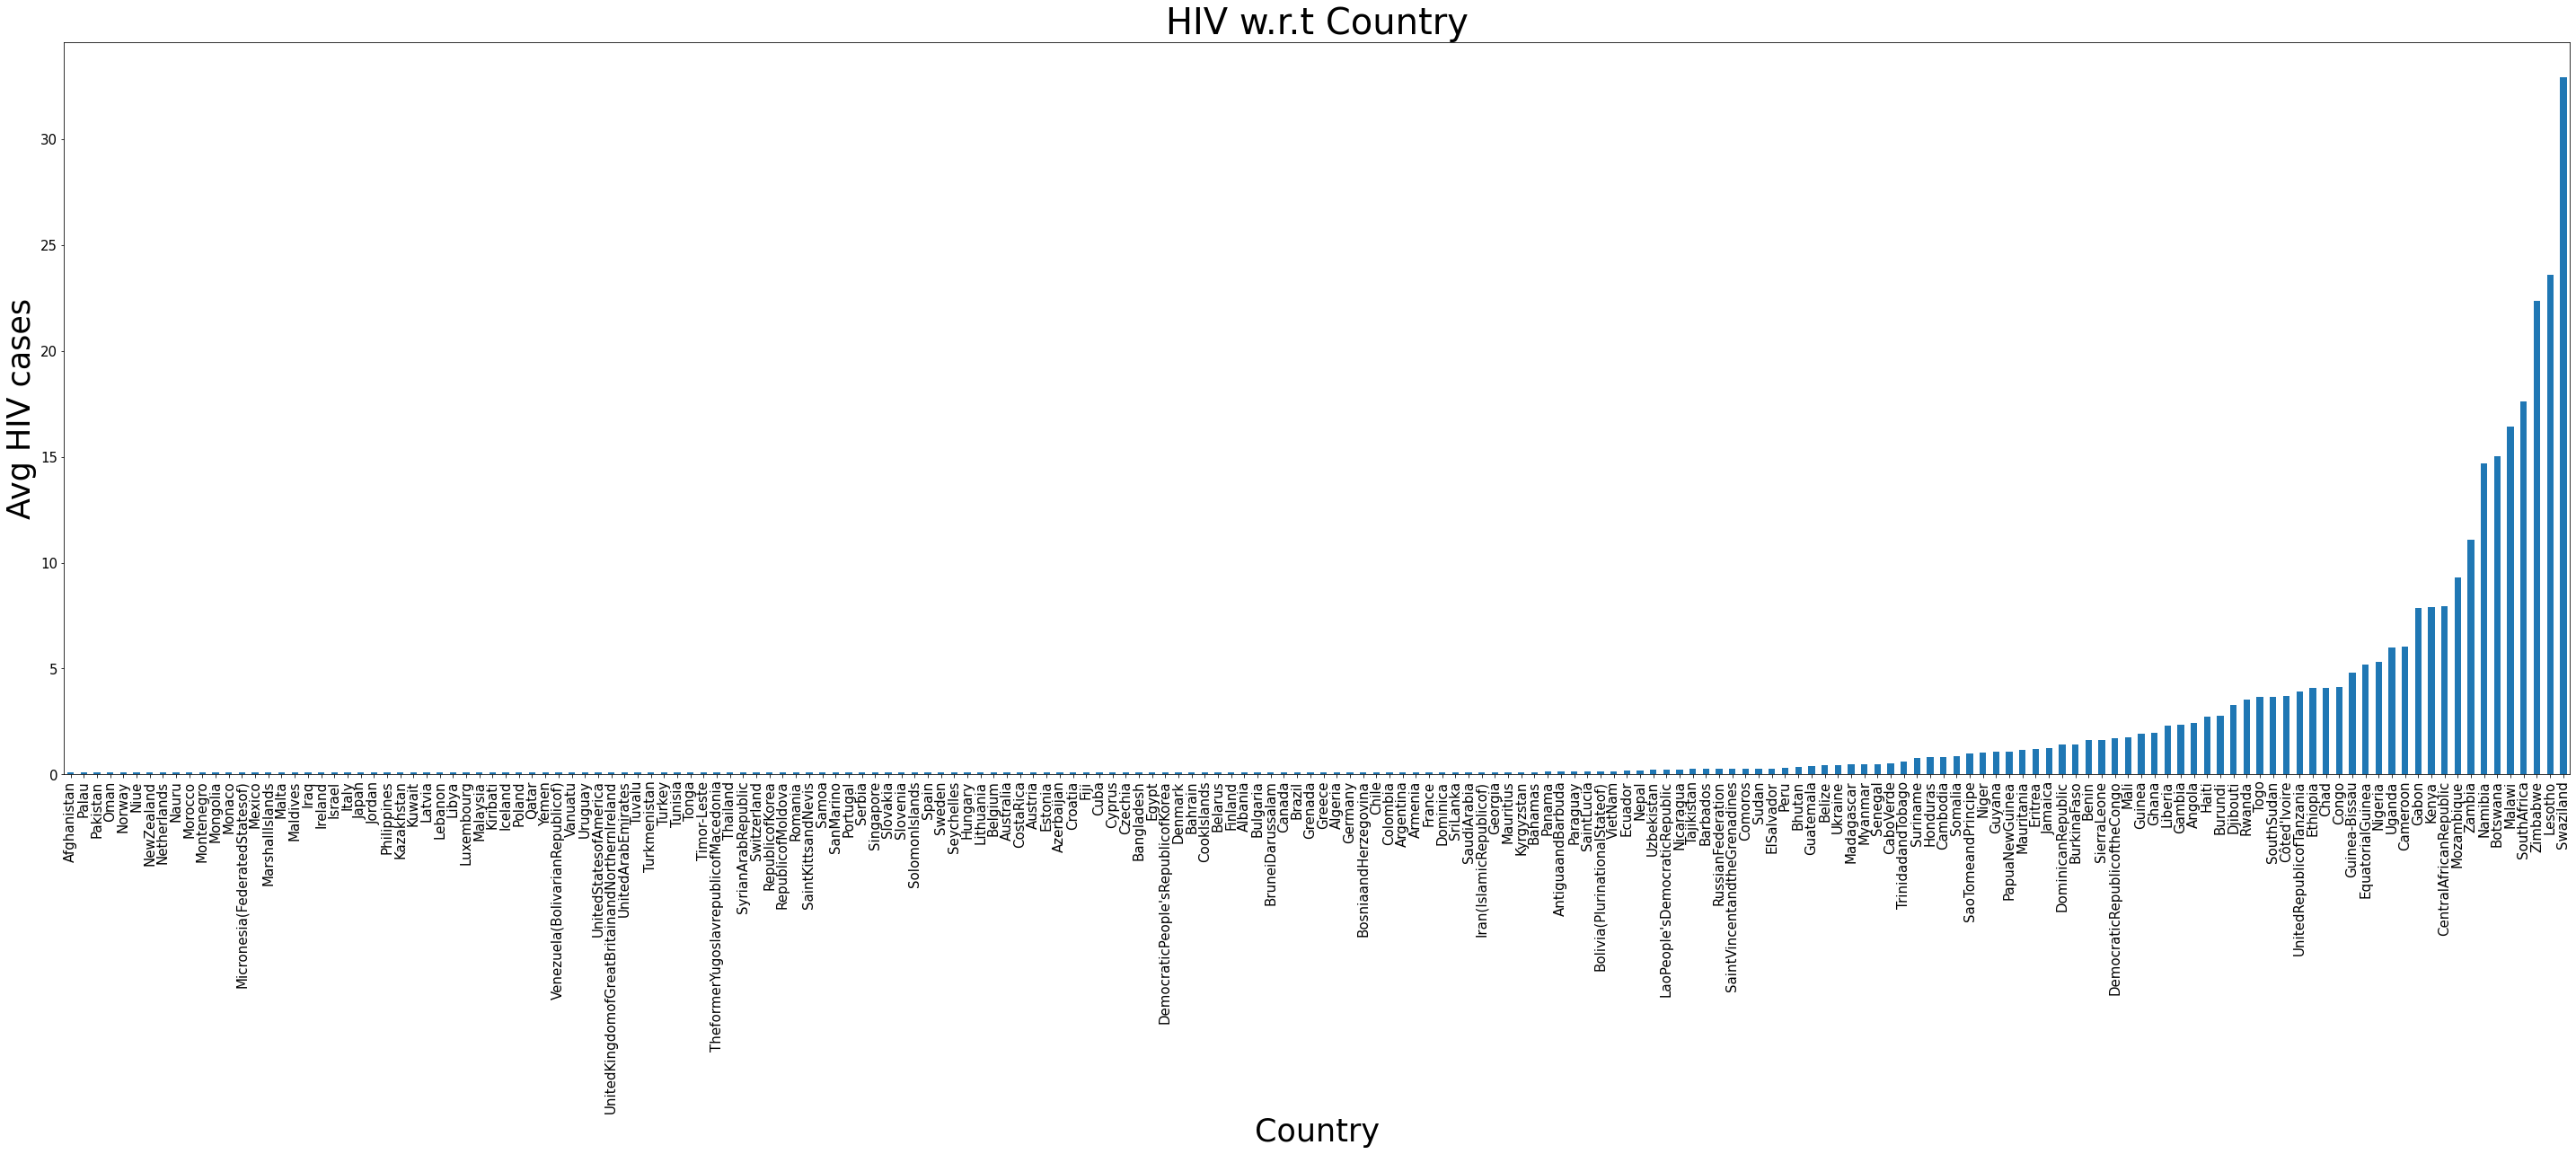

In [75]:
le_country = df.groupby('country')['hiv/aids'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title("HIV w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg HIV cases",fontsize=35)
plt.show()

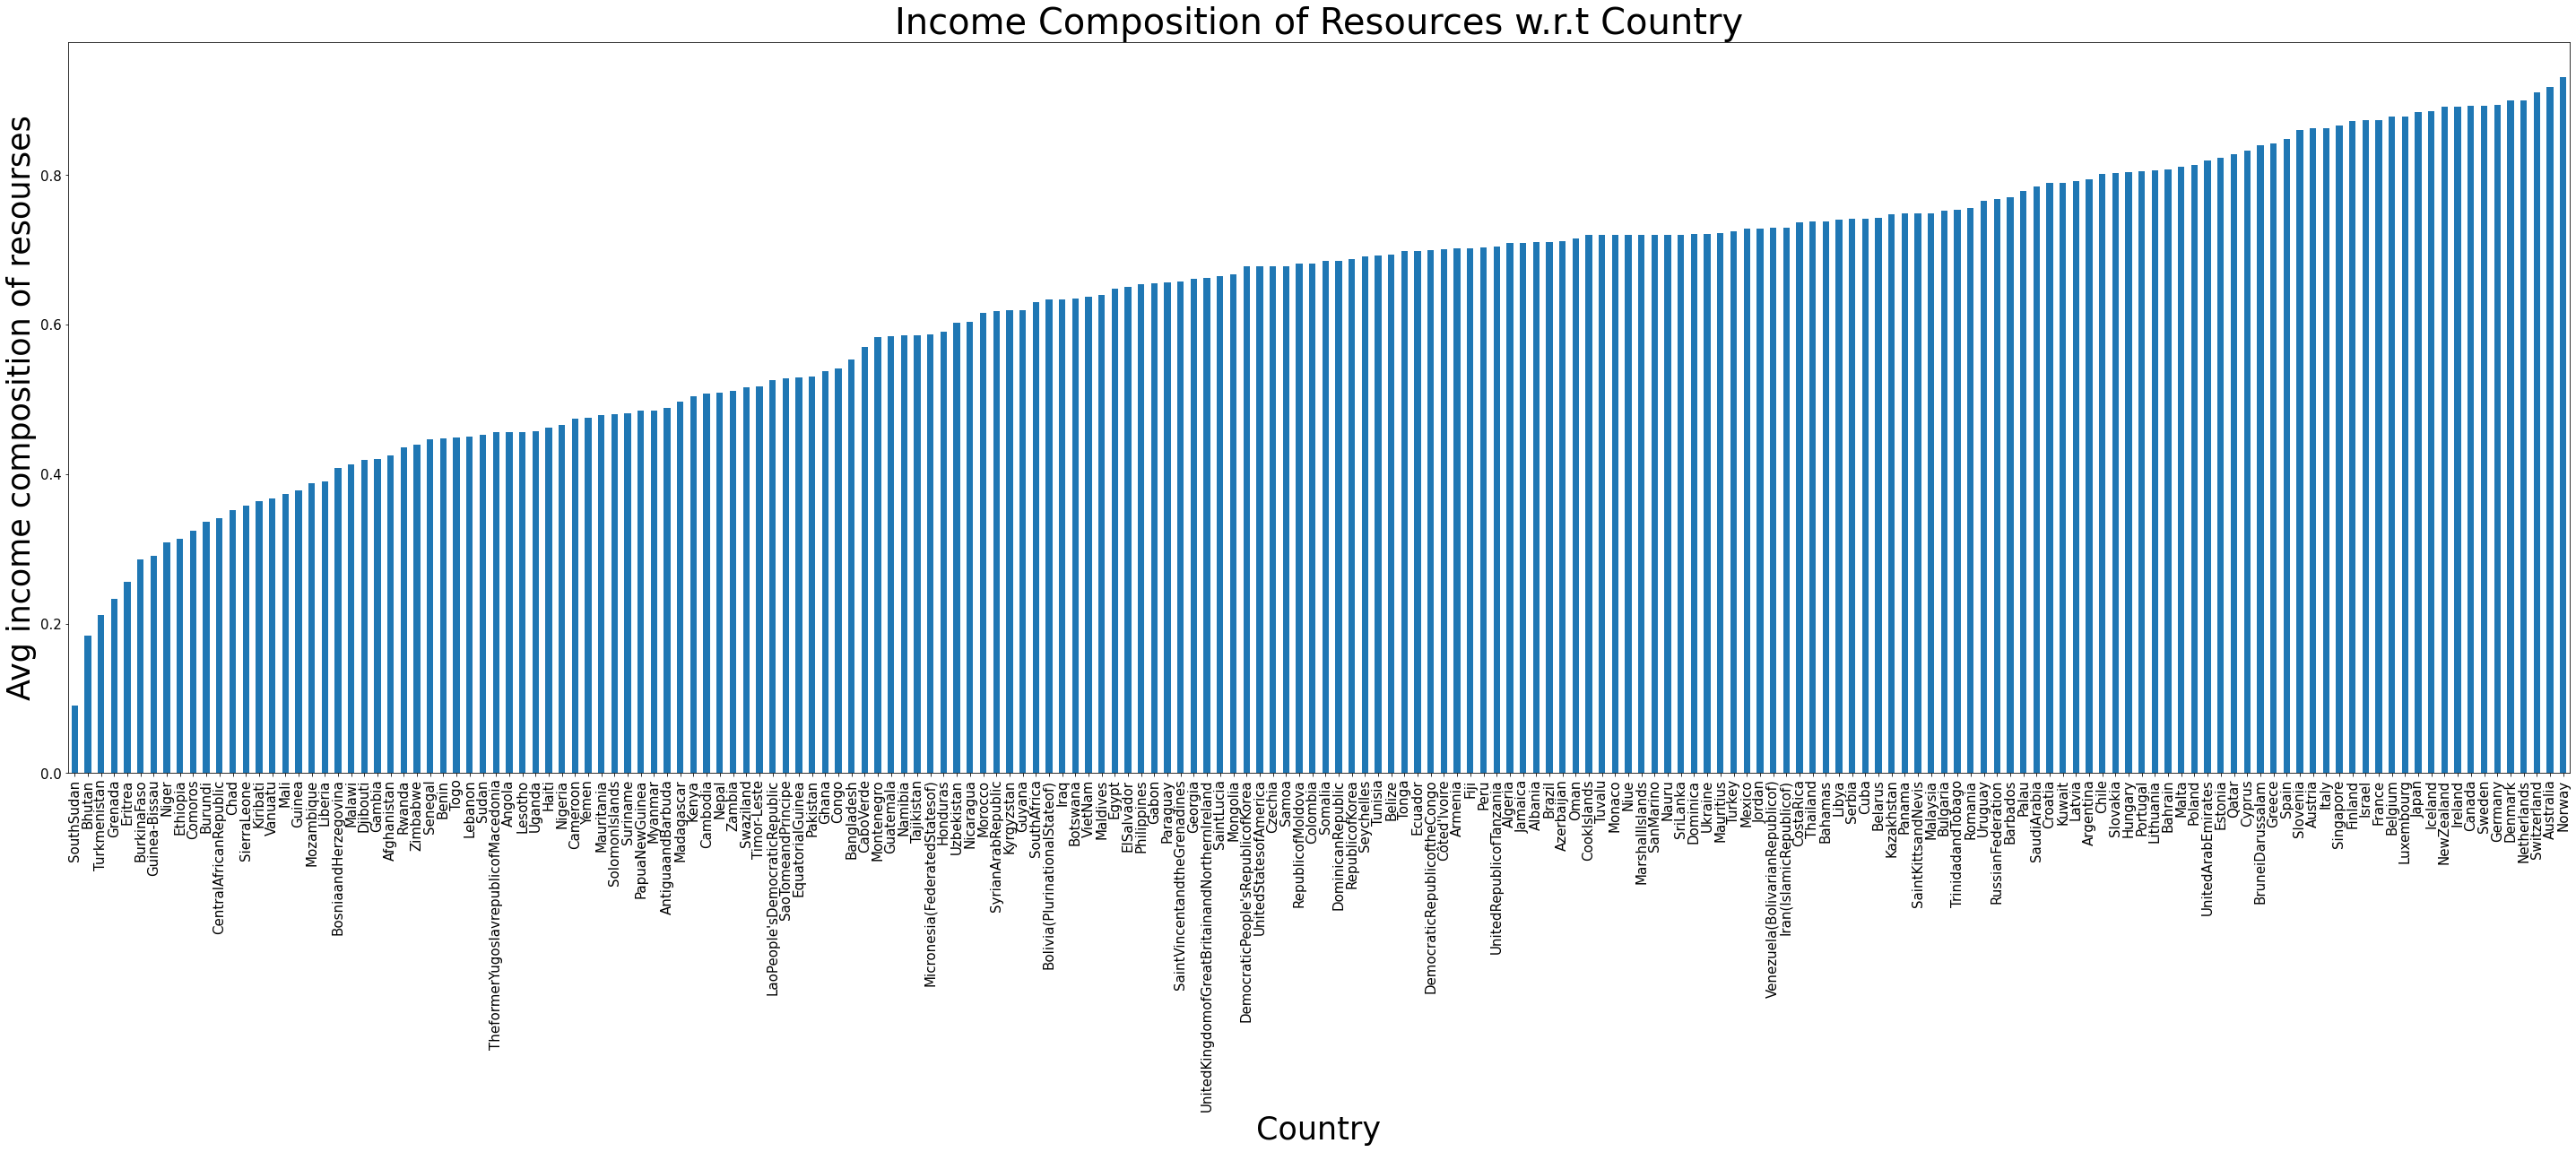

In [76]:
le_country = df.groupby('country')['income_composition_of_resources'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title("Income Composition of Resources w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg income composition of resourses",fontsize=35)
plt.show()

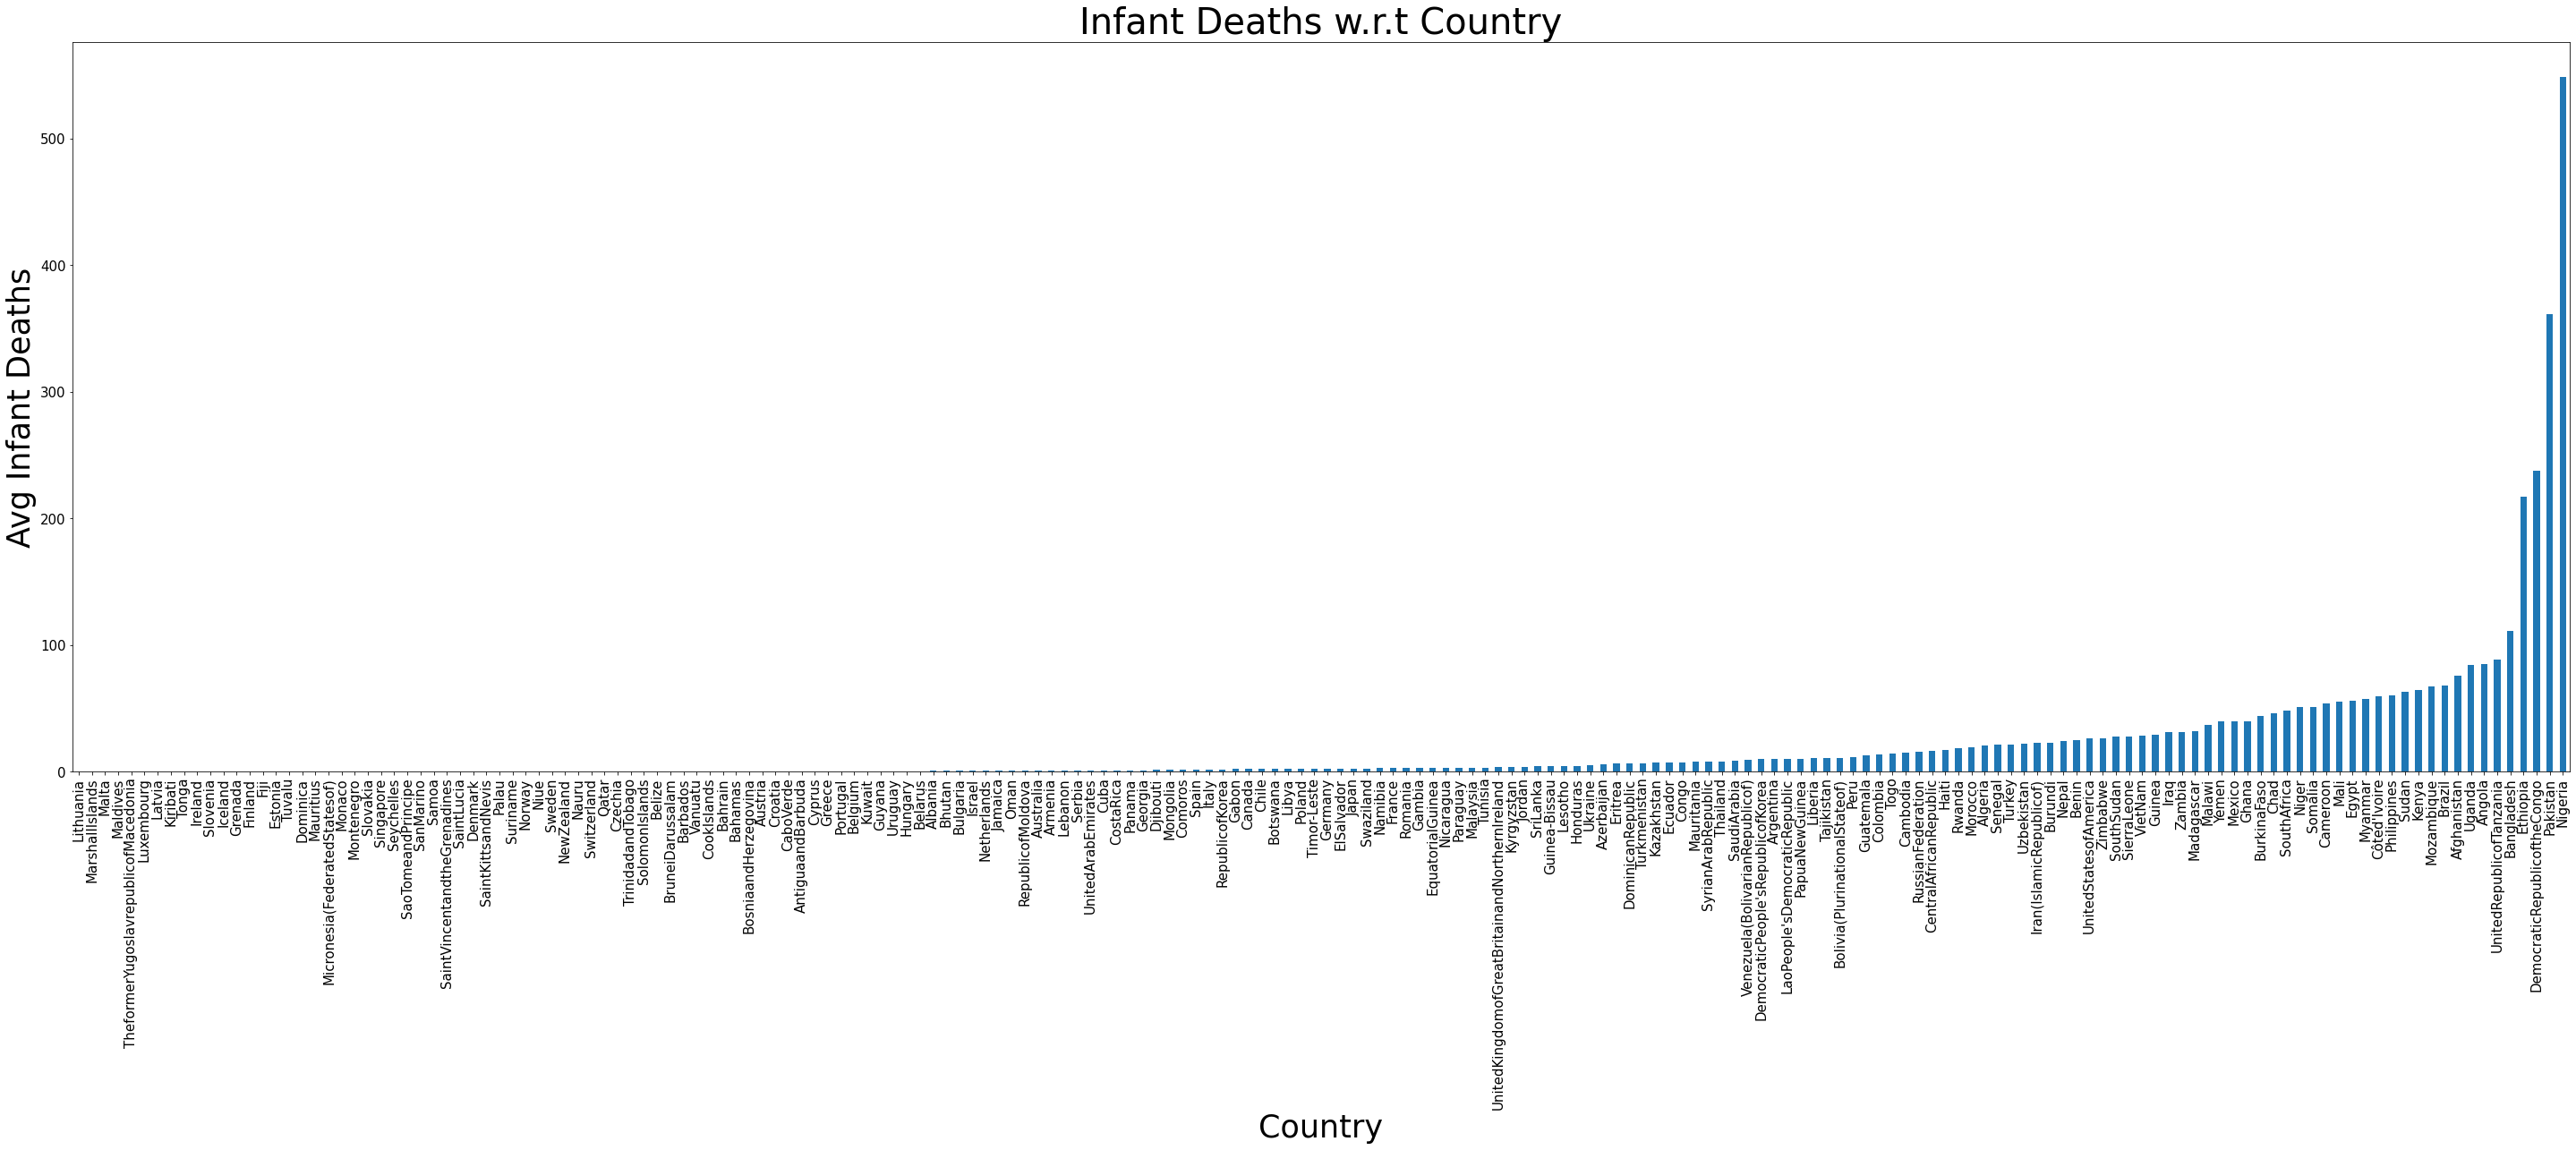

In [77]:
le_country = df.groupby('country')['infant_deaths'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title("Infant Deaths w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Infant Deaths",fontsize=35)
plt.show()

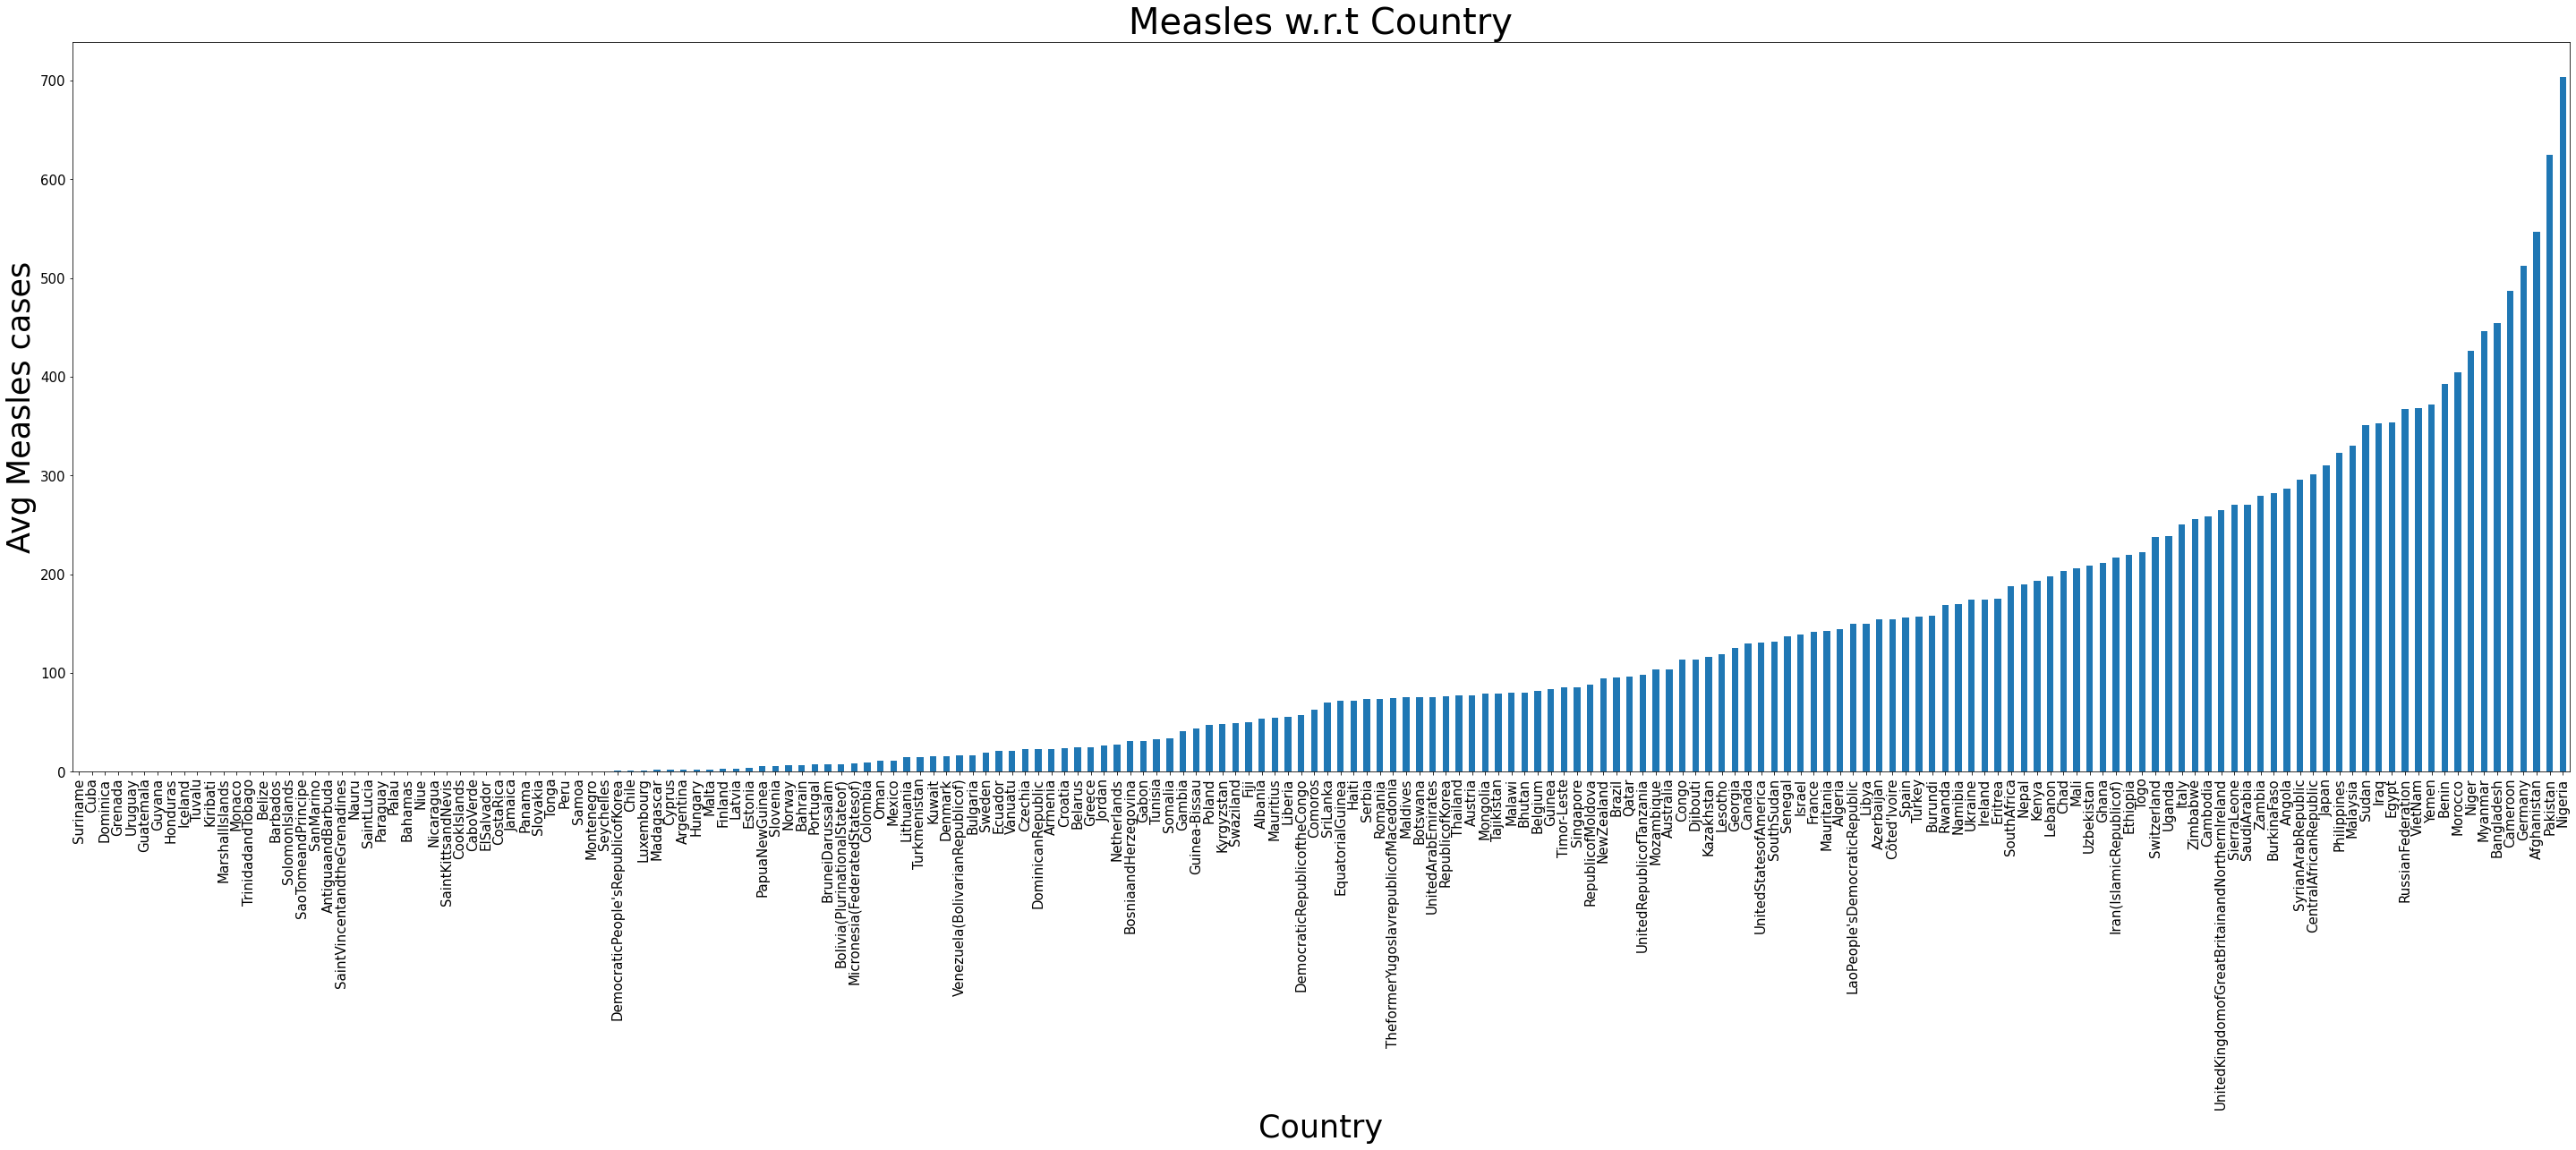

In [78]:
le_country = df.groupby('country')['measles'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title("Measles w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Measles cases",fontsize=35)
plt.show()

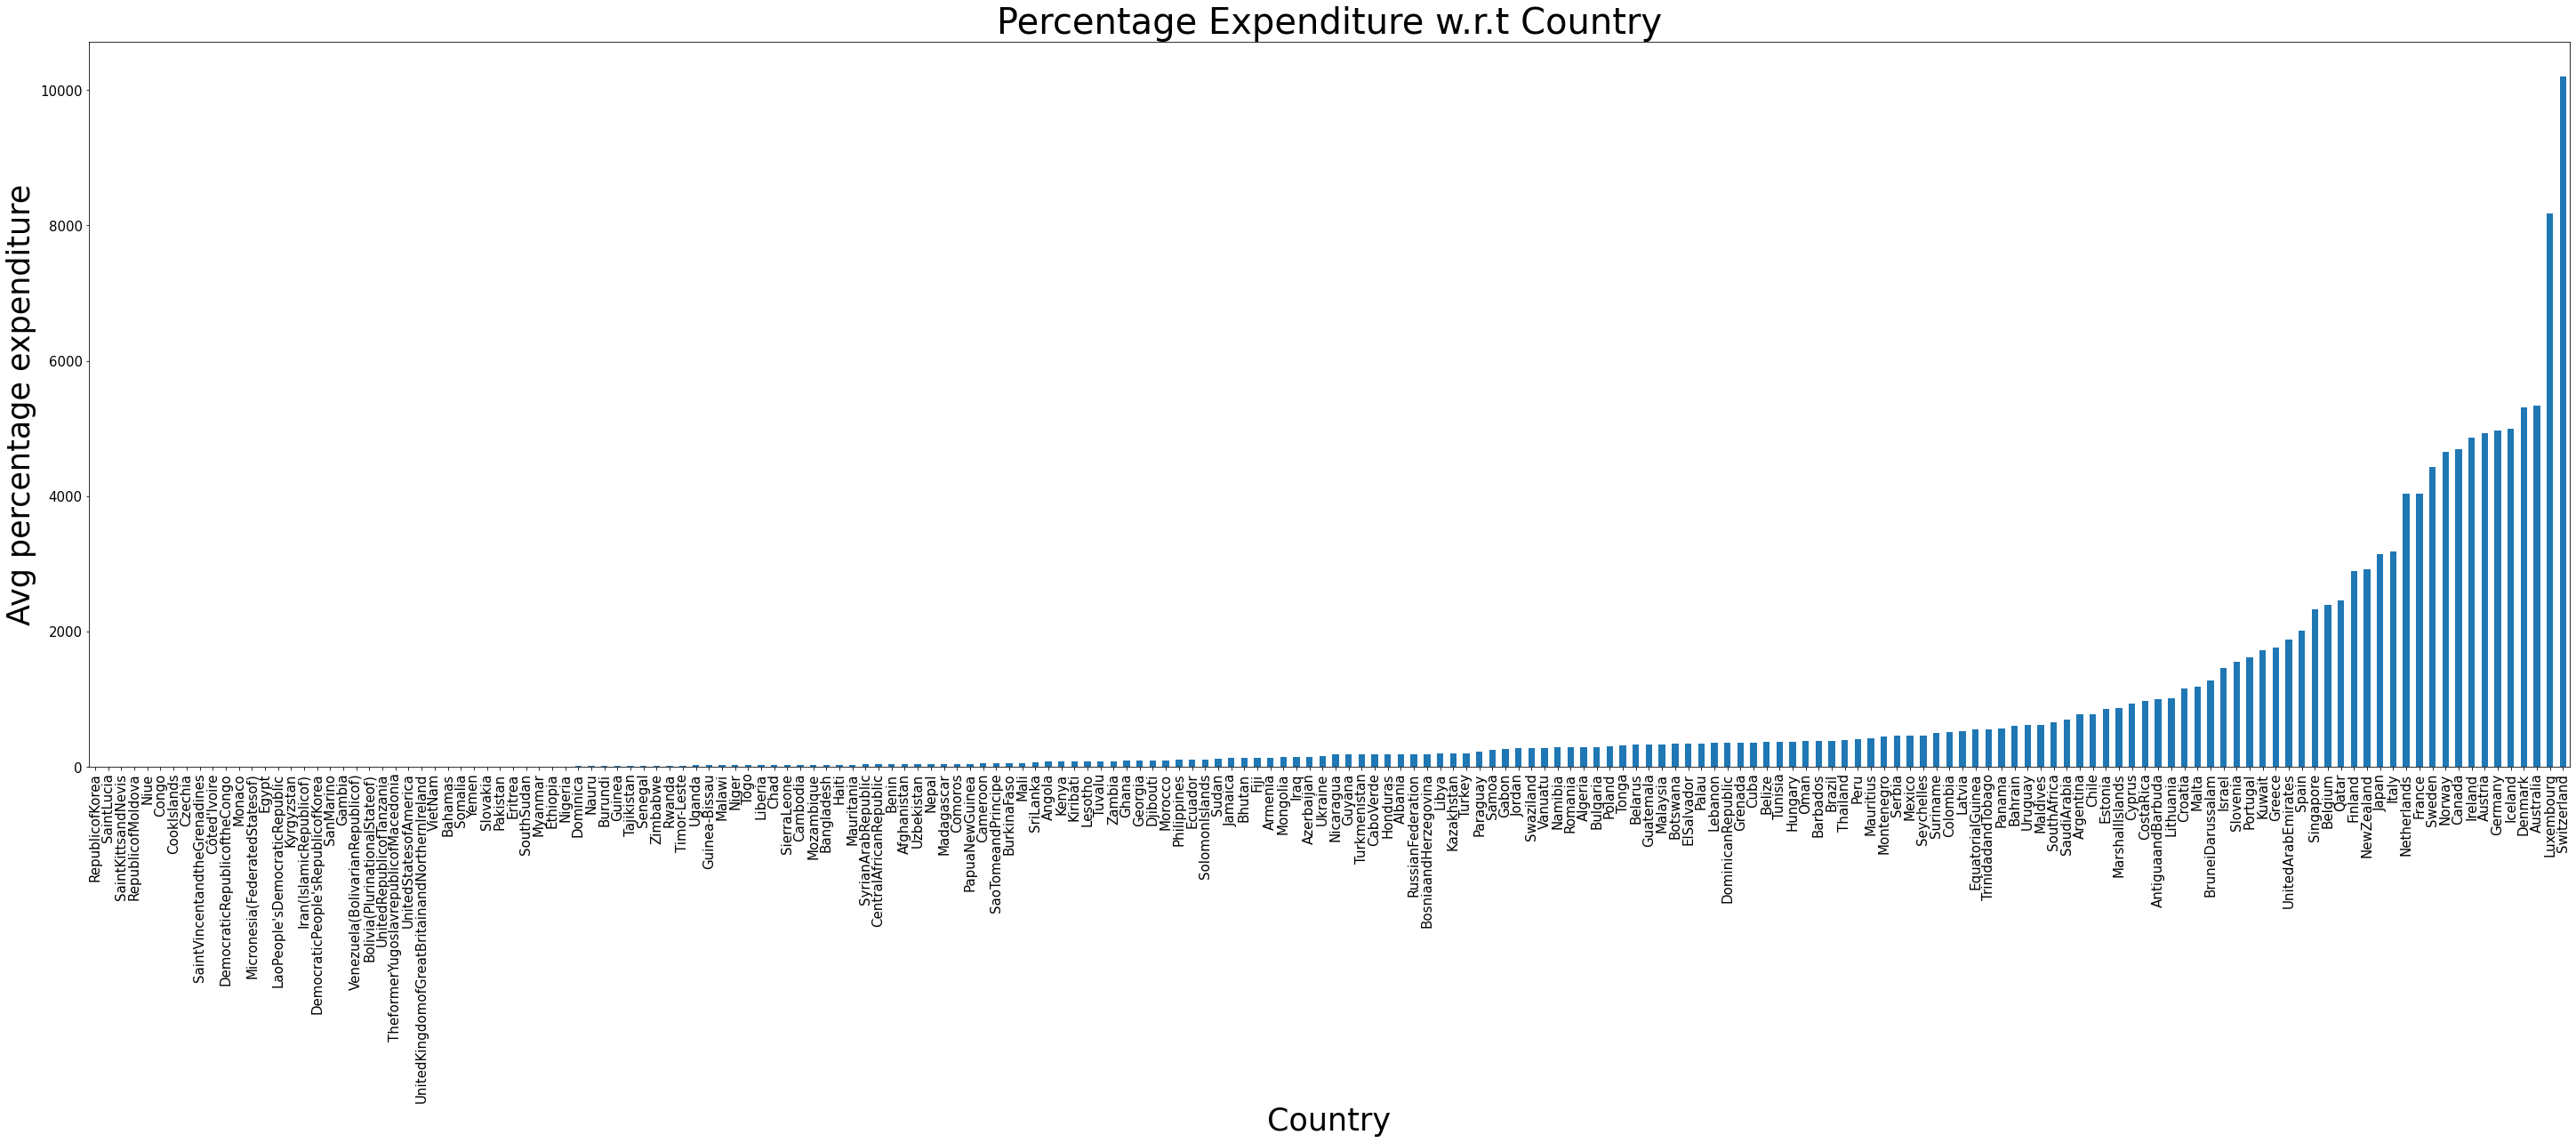

In [79]:
le_country = df.groupby('country')['percentage_expenditure'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title("Percentage Expenditure w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg percentage expenditure",fontsize=35)
plt.show()

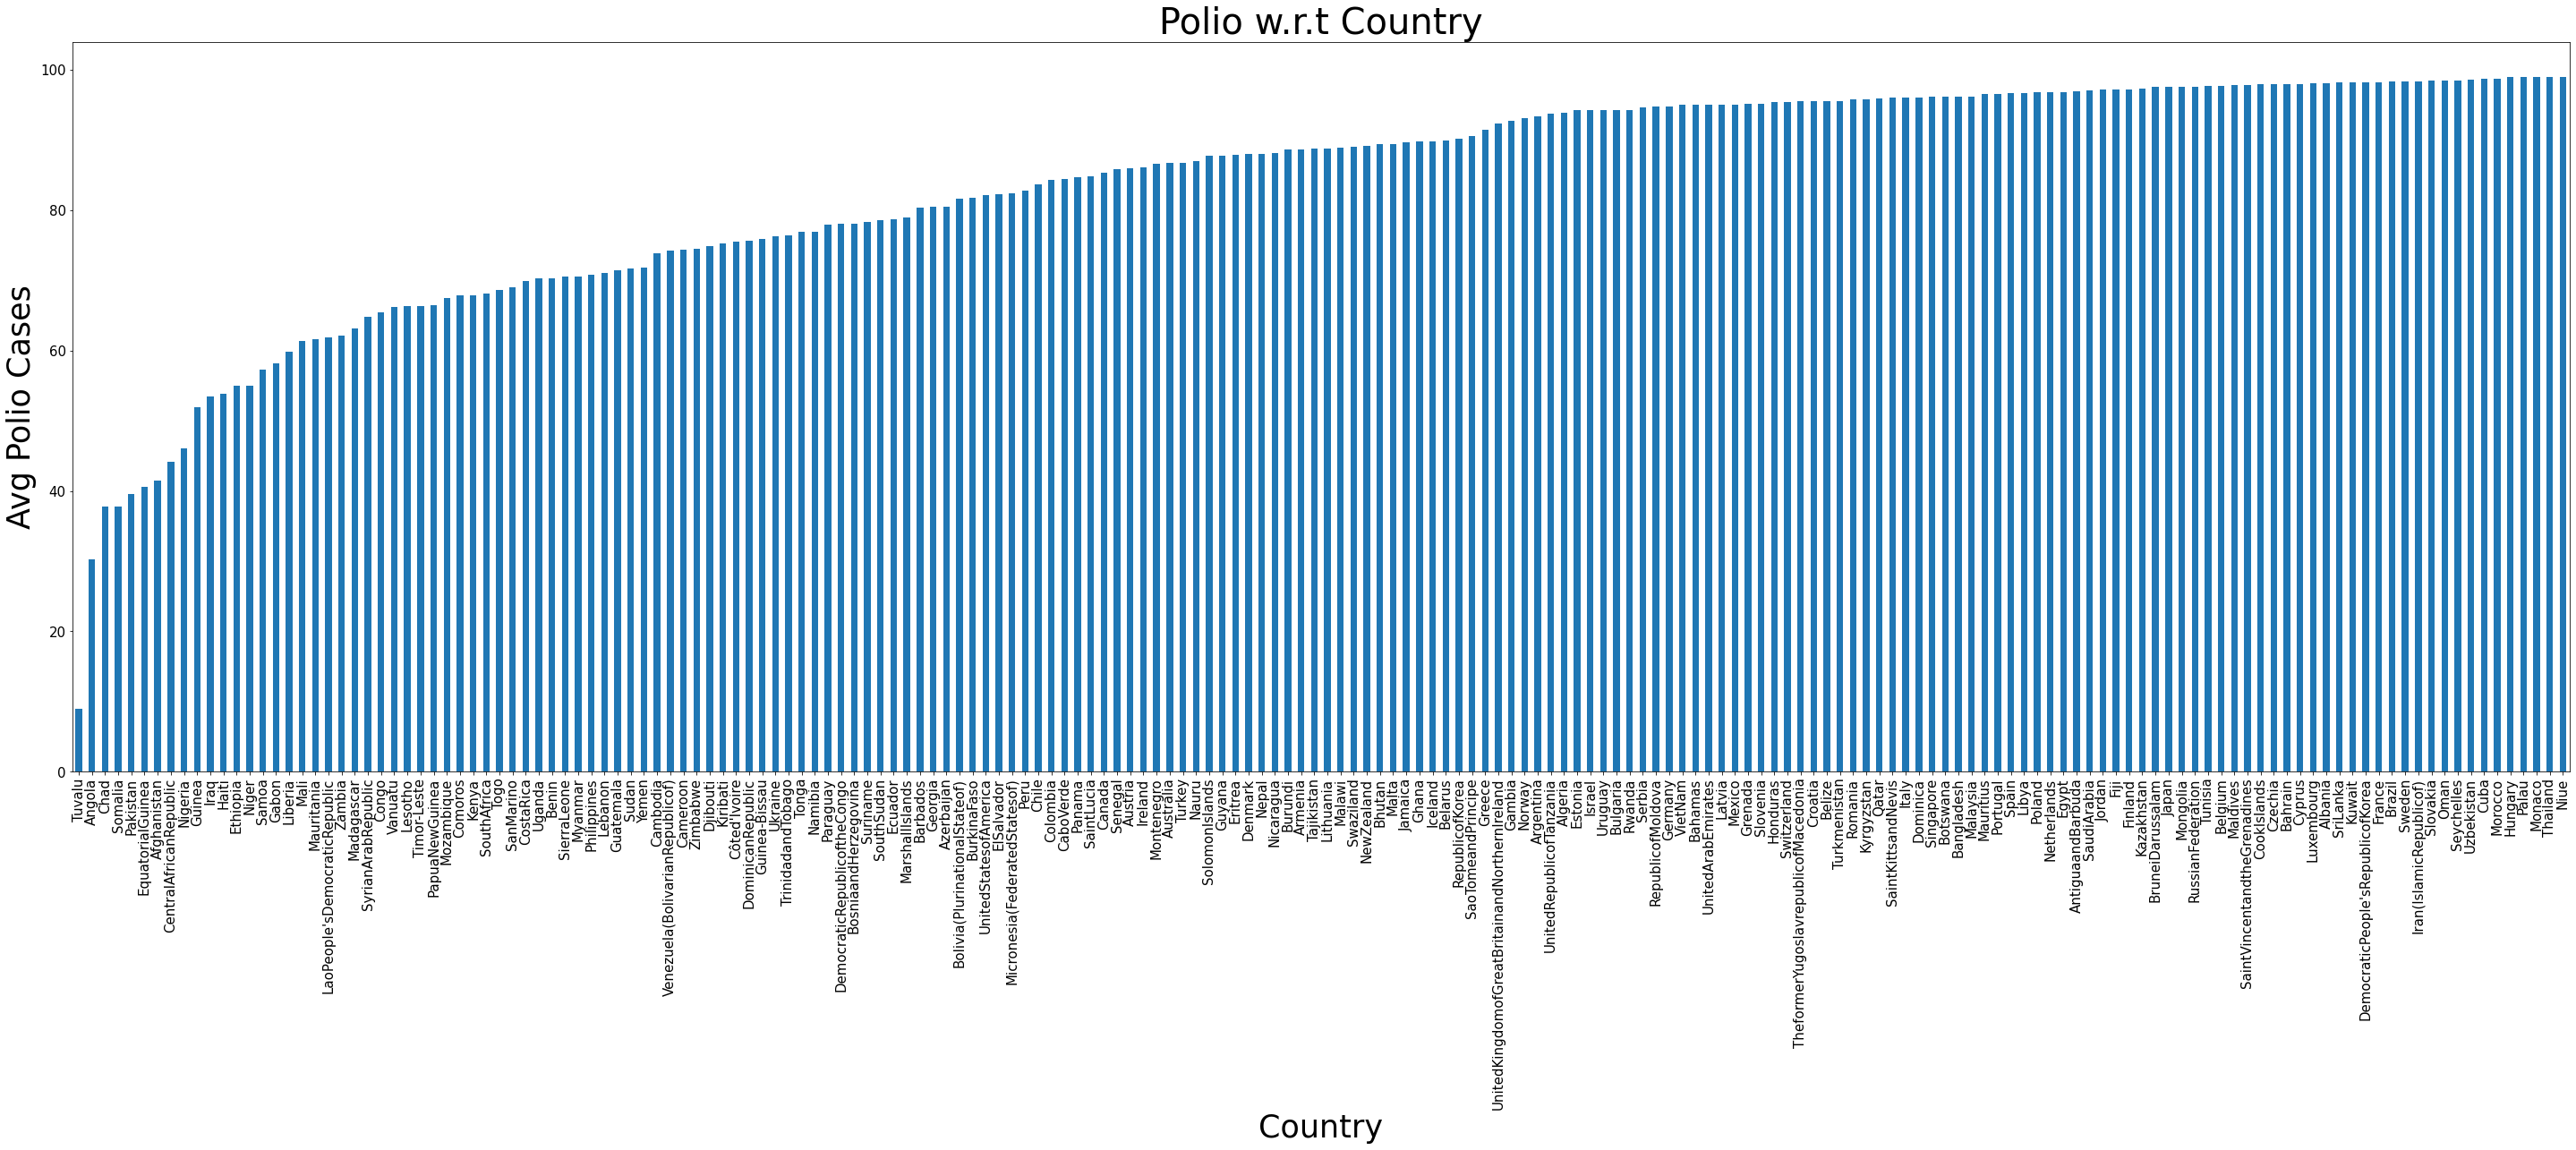

In [80]:
le_country = df.groupby('country')['polio'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title("Polio w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Polio Cases",fontsize=35)
plt.show()

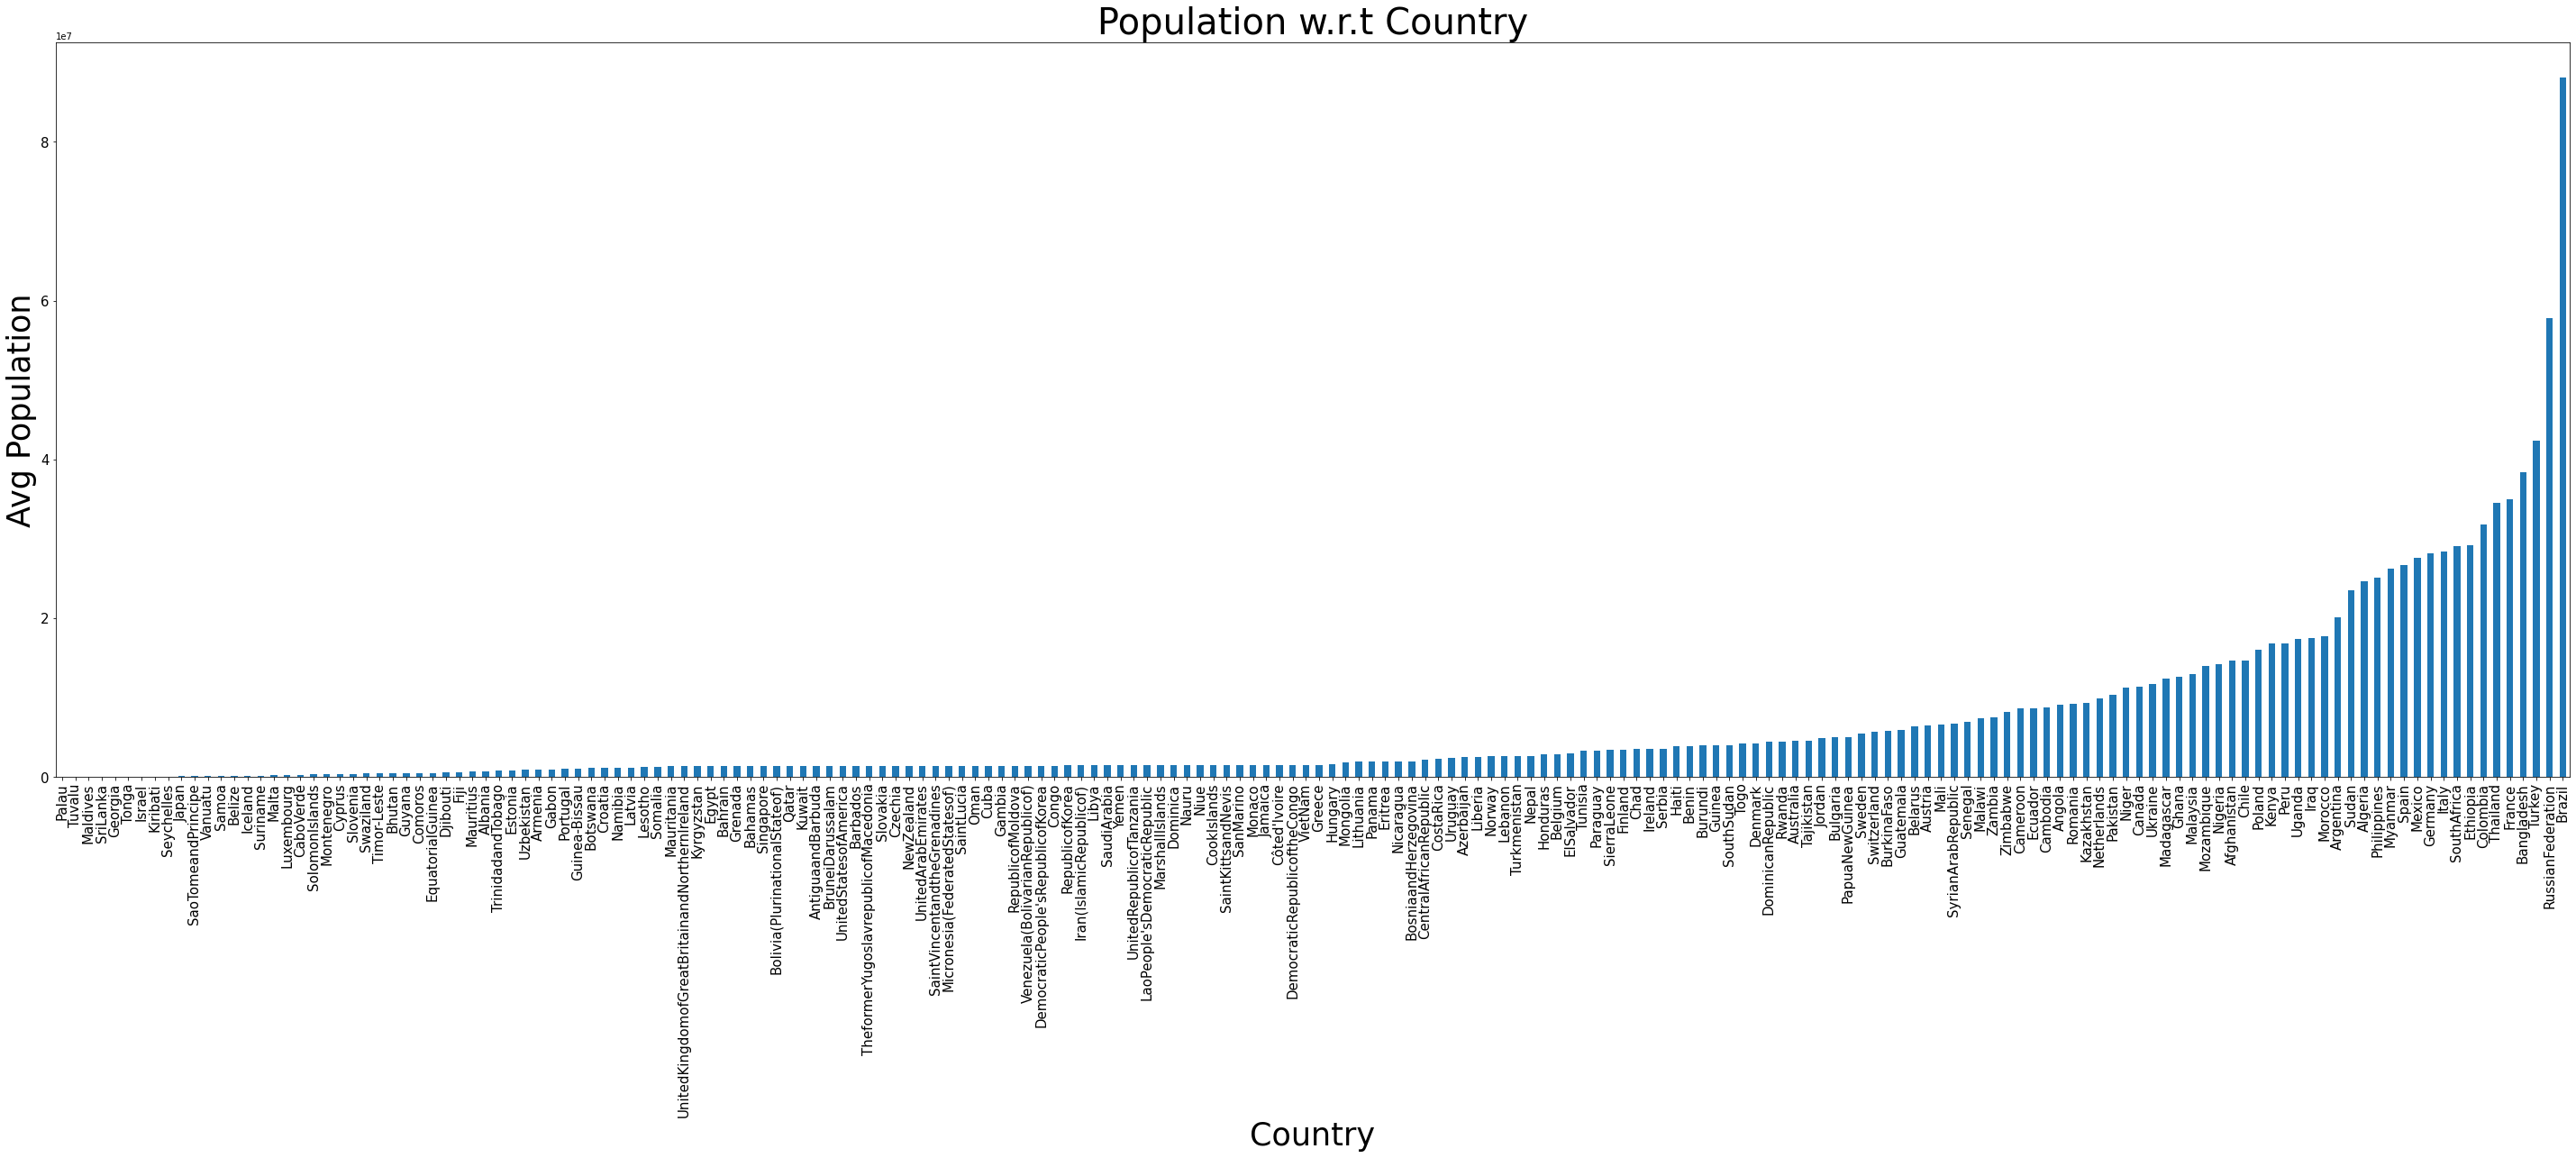

In [81]:
le_country = df.groupby('country')['population'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title("Population w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Population",fontsize=35)
plt.show()

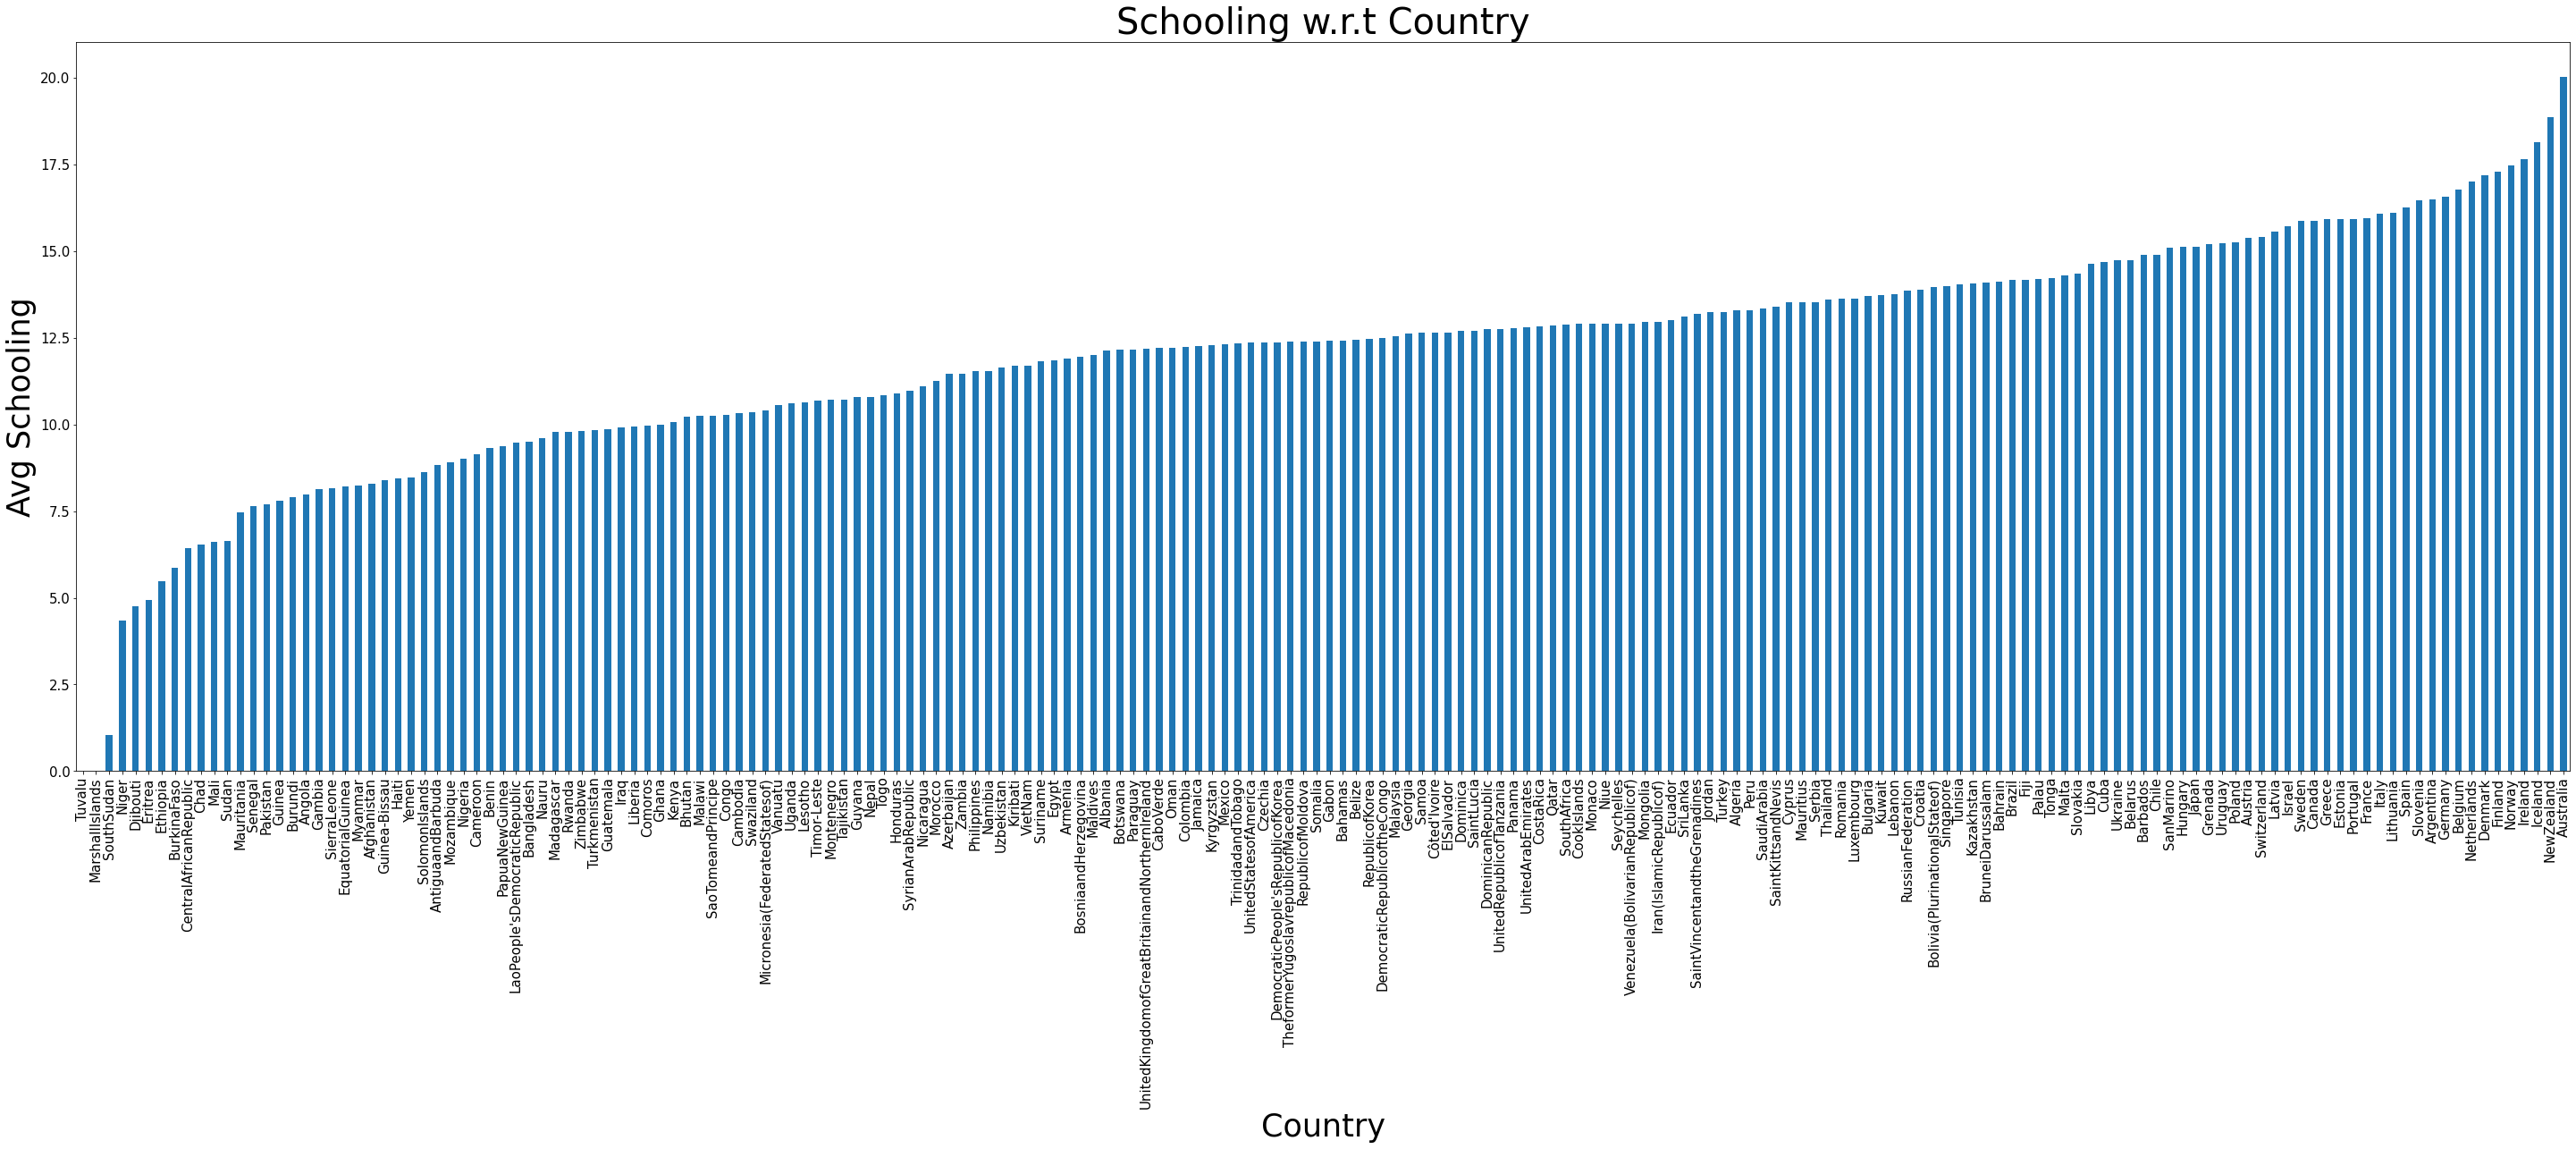

In [82]:
le_country = df.groupby('country')['schooling'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title("Schooling w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Schooling",fontsize=35)
plt.show()

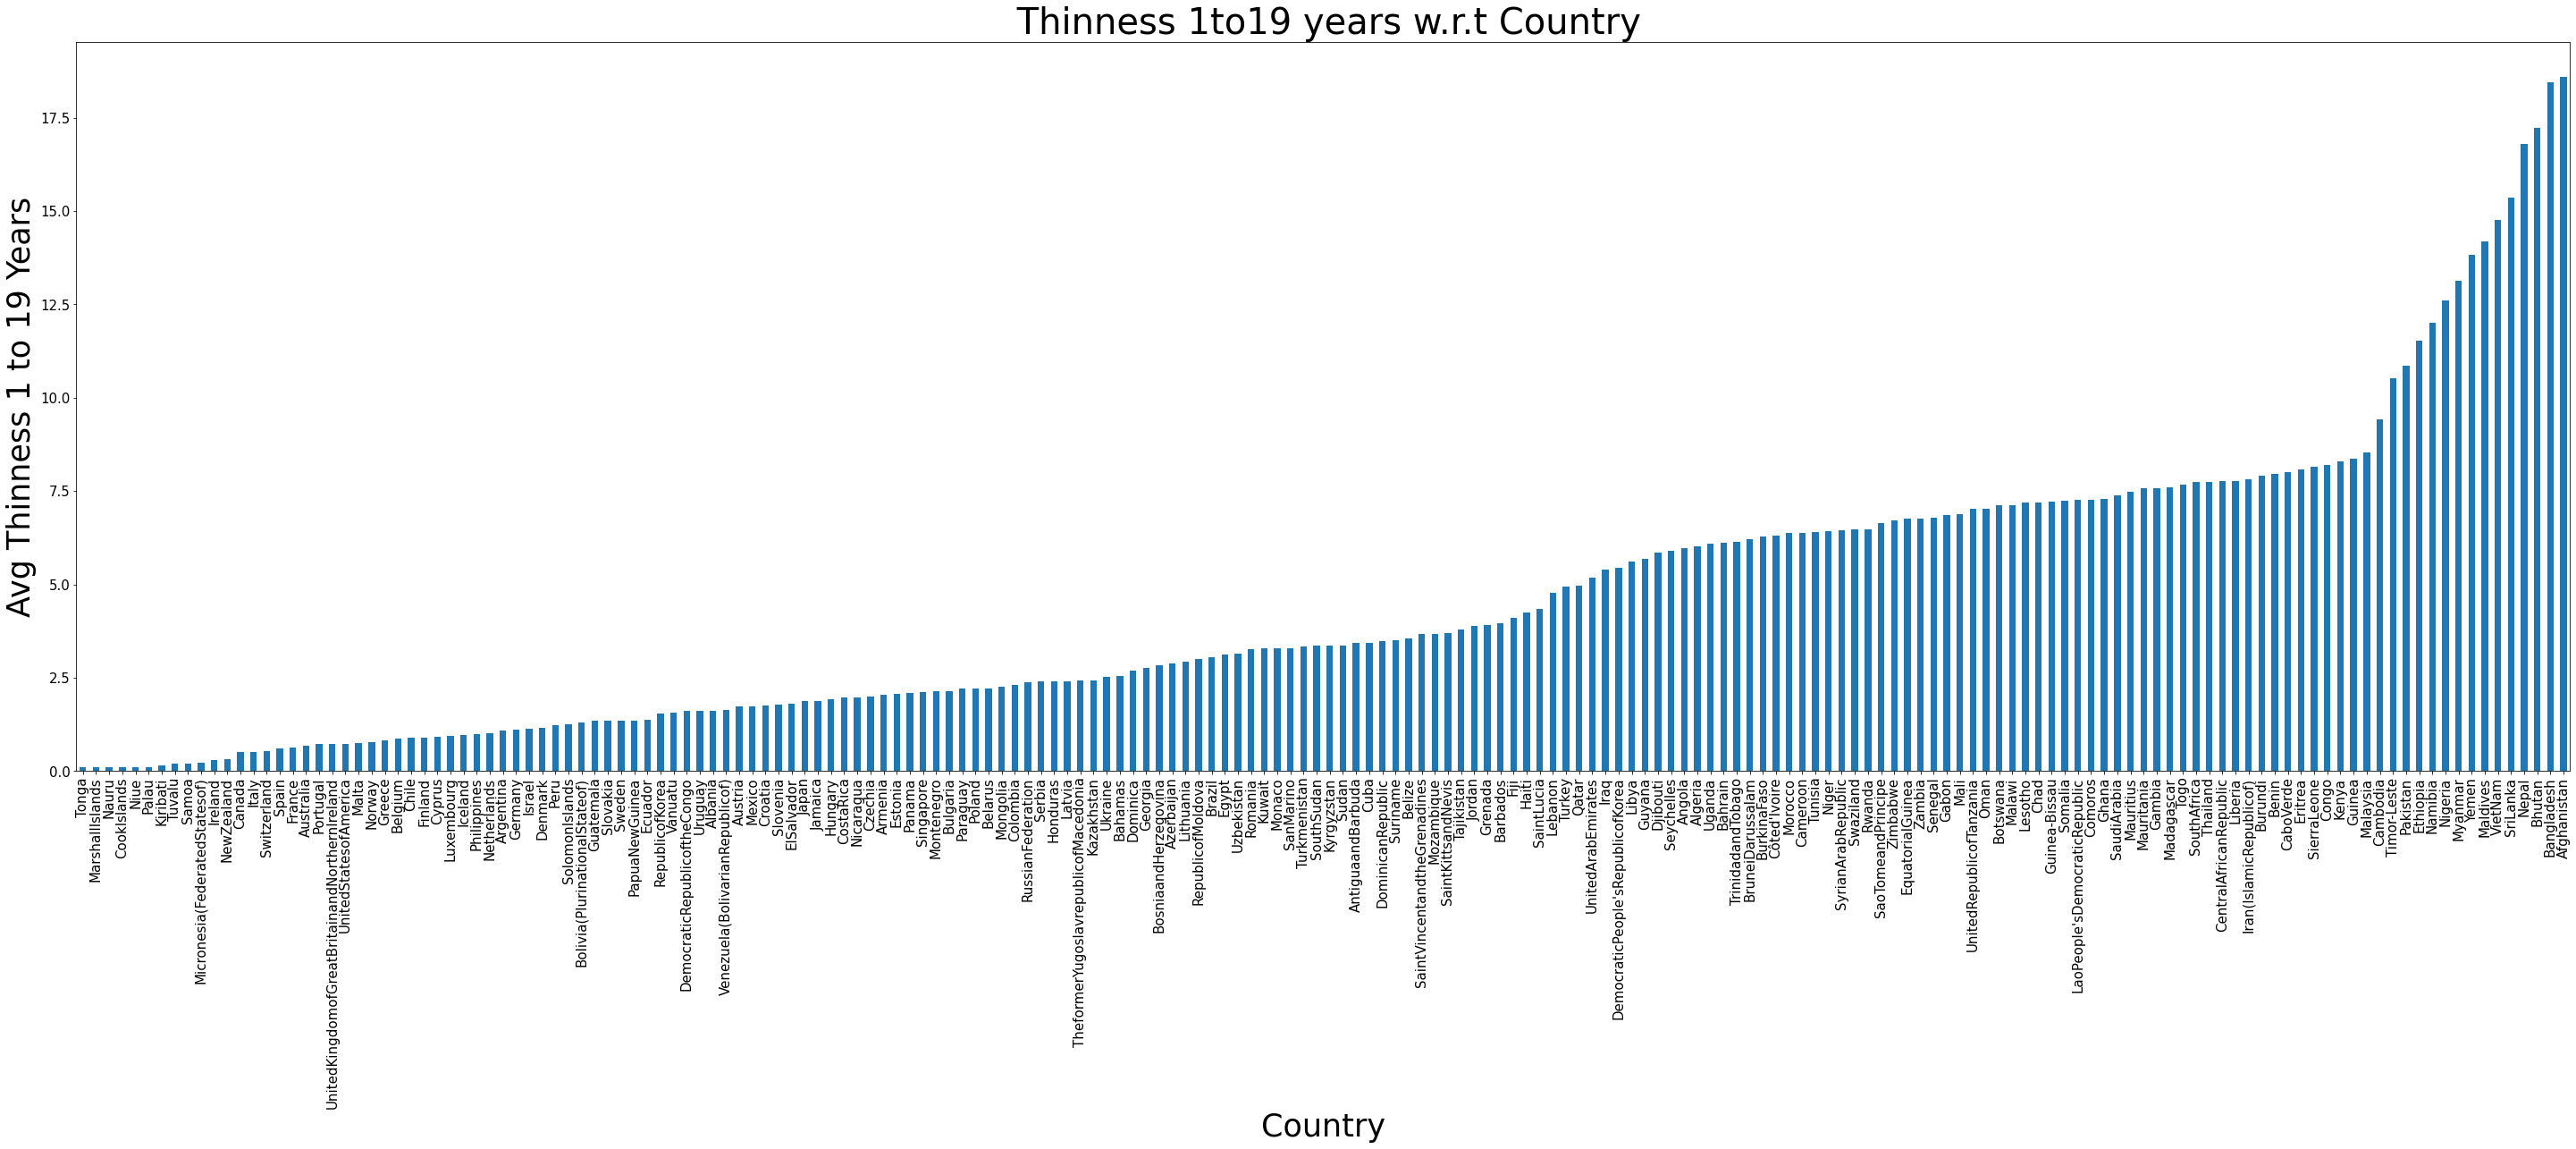

In [83]:
le_country = df.groupby('country')['thinness_1_19_years'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title(" Thinness 1to19 years w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Thinness 1 to 19 Years",fontsize=35)
plt.show()

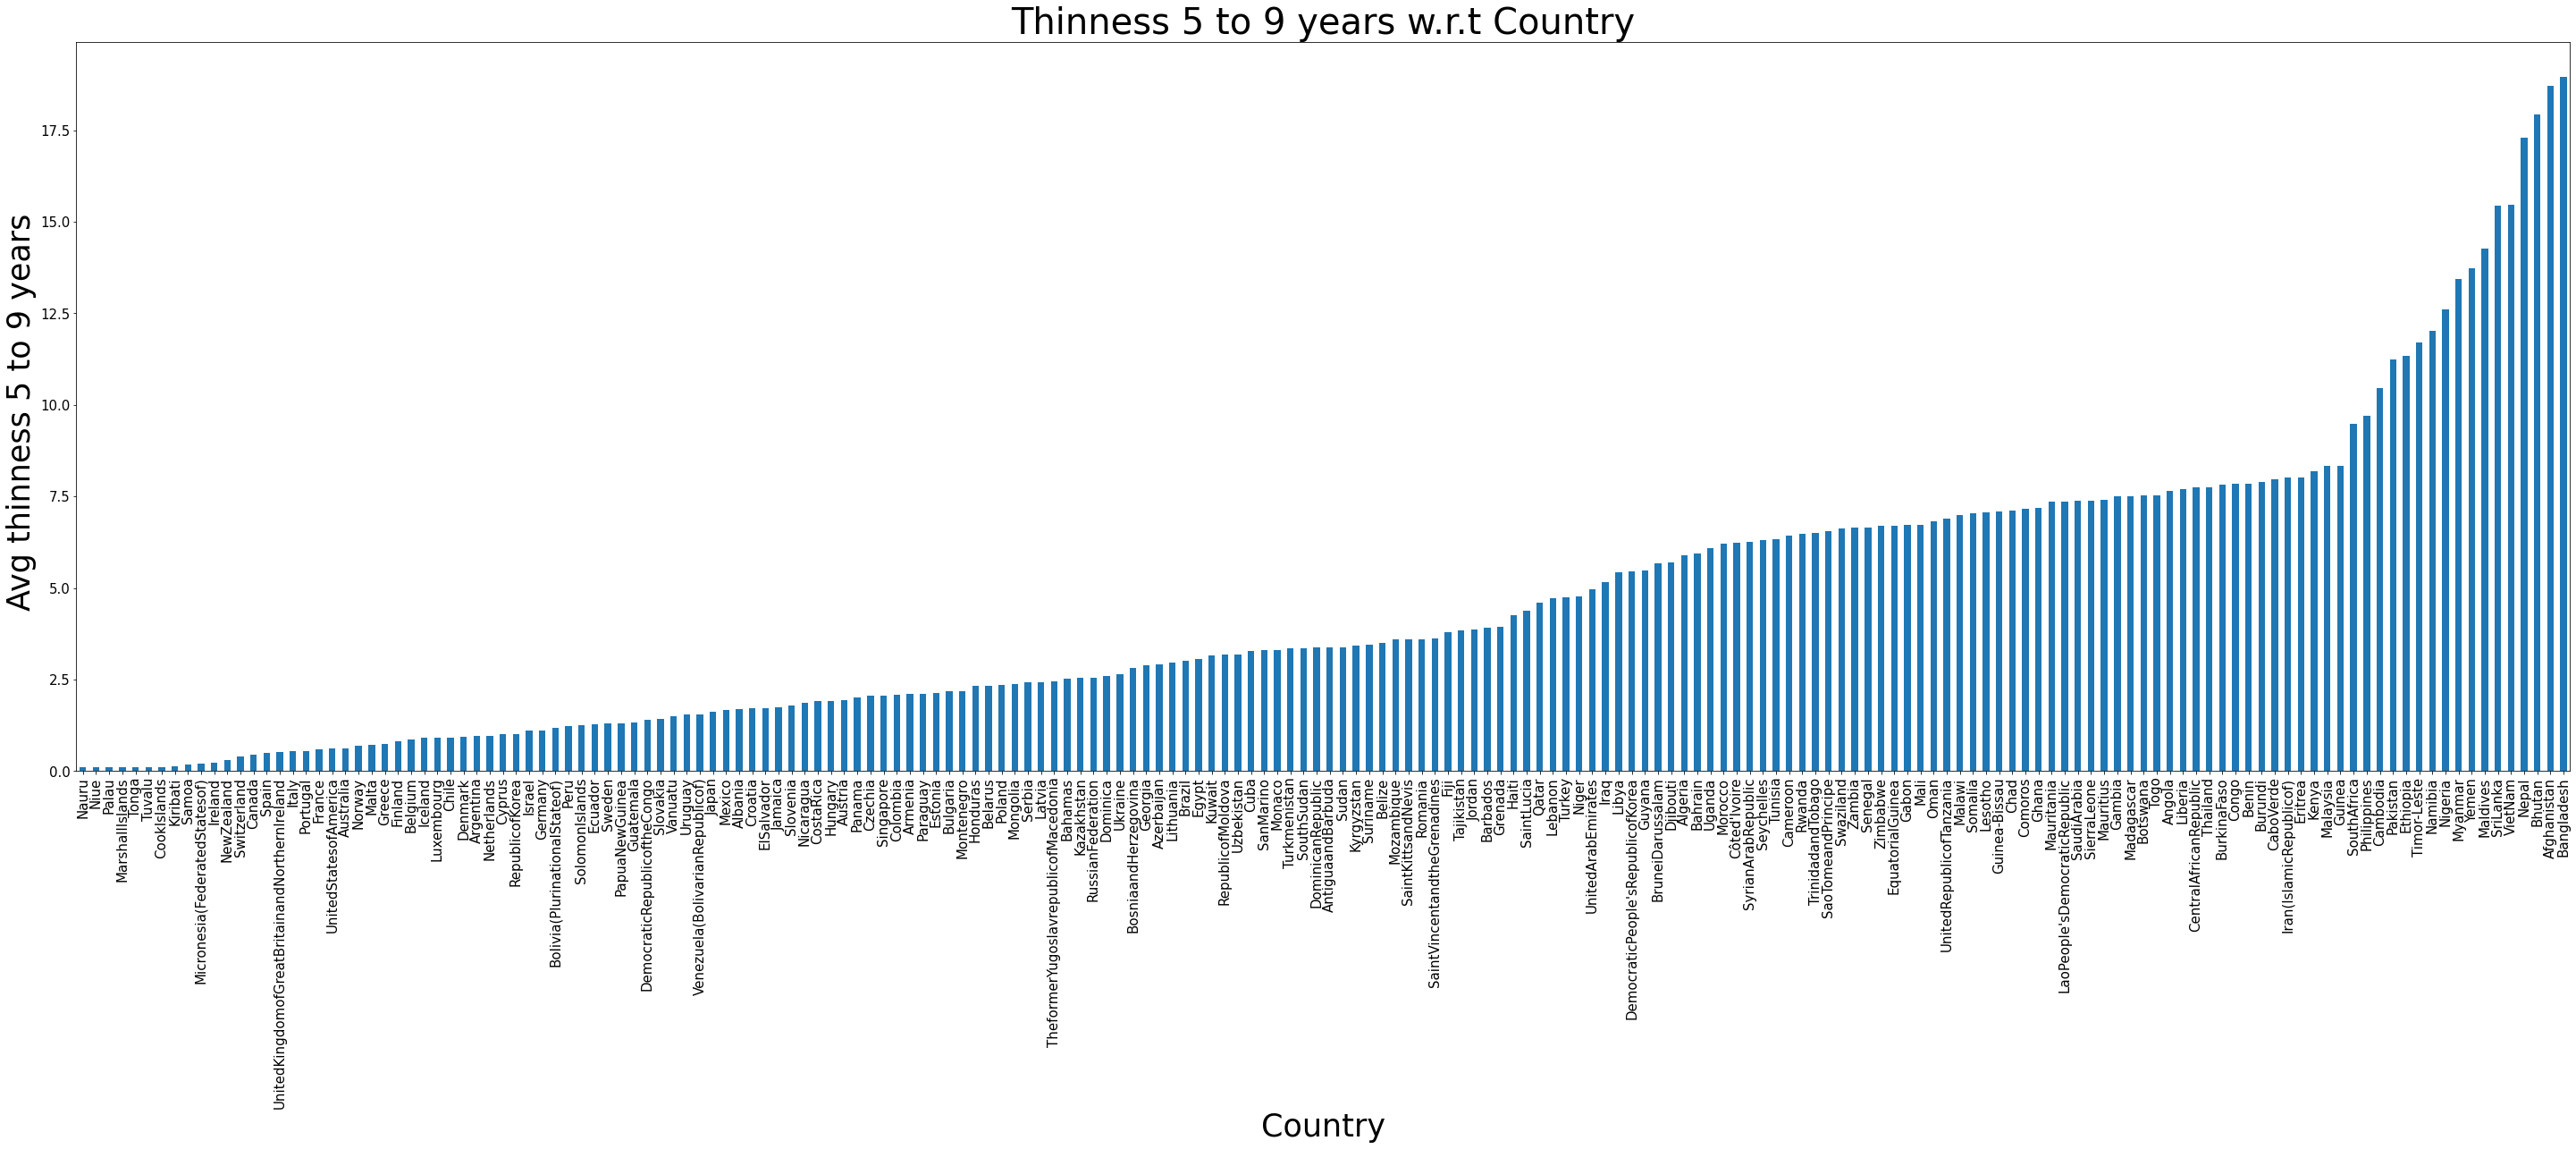

In [84]:
le_country = df.groupby('country')['thinness_5_9_years'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title("Thinness 5 to 9 years w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg thinness 5 to 9 years ",fontsize=35)
plt.show()

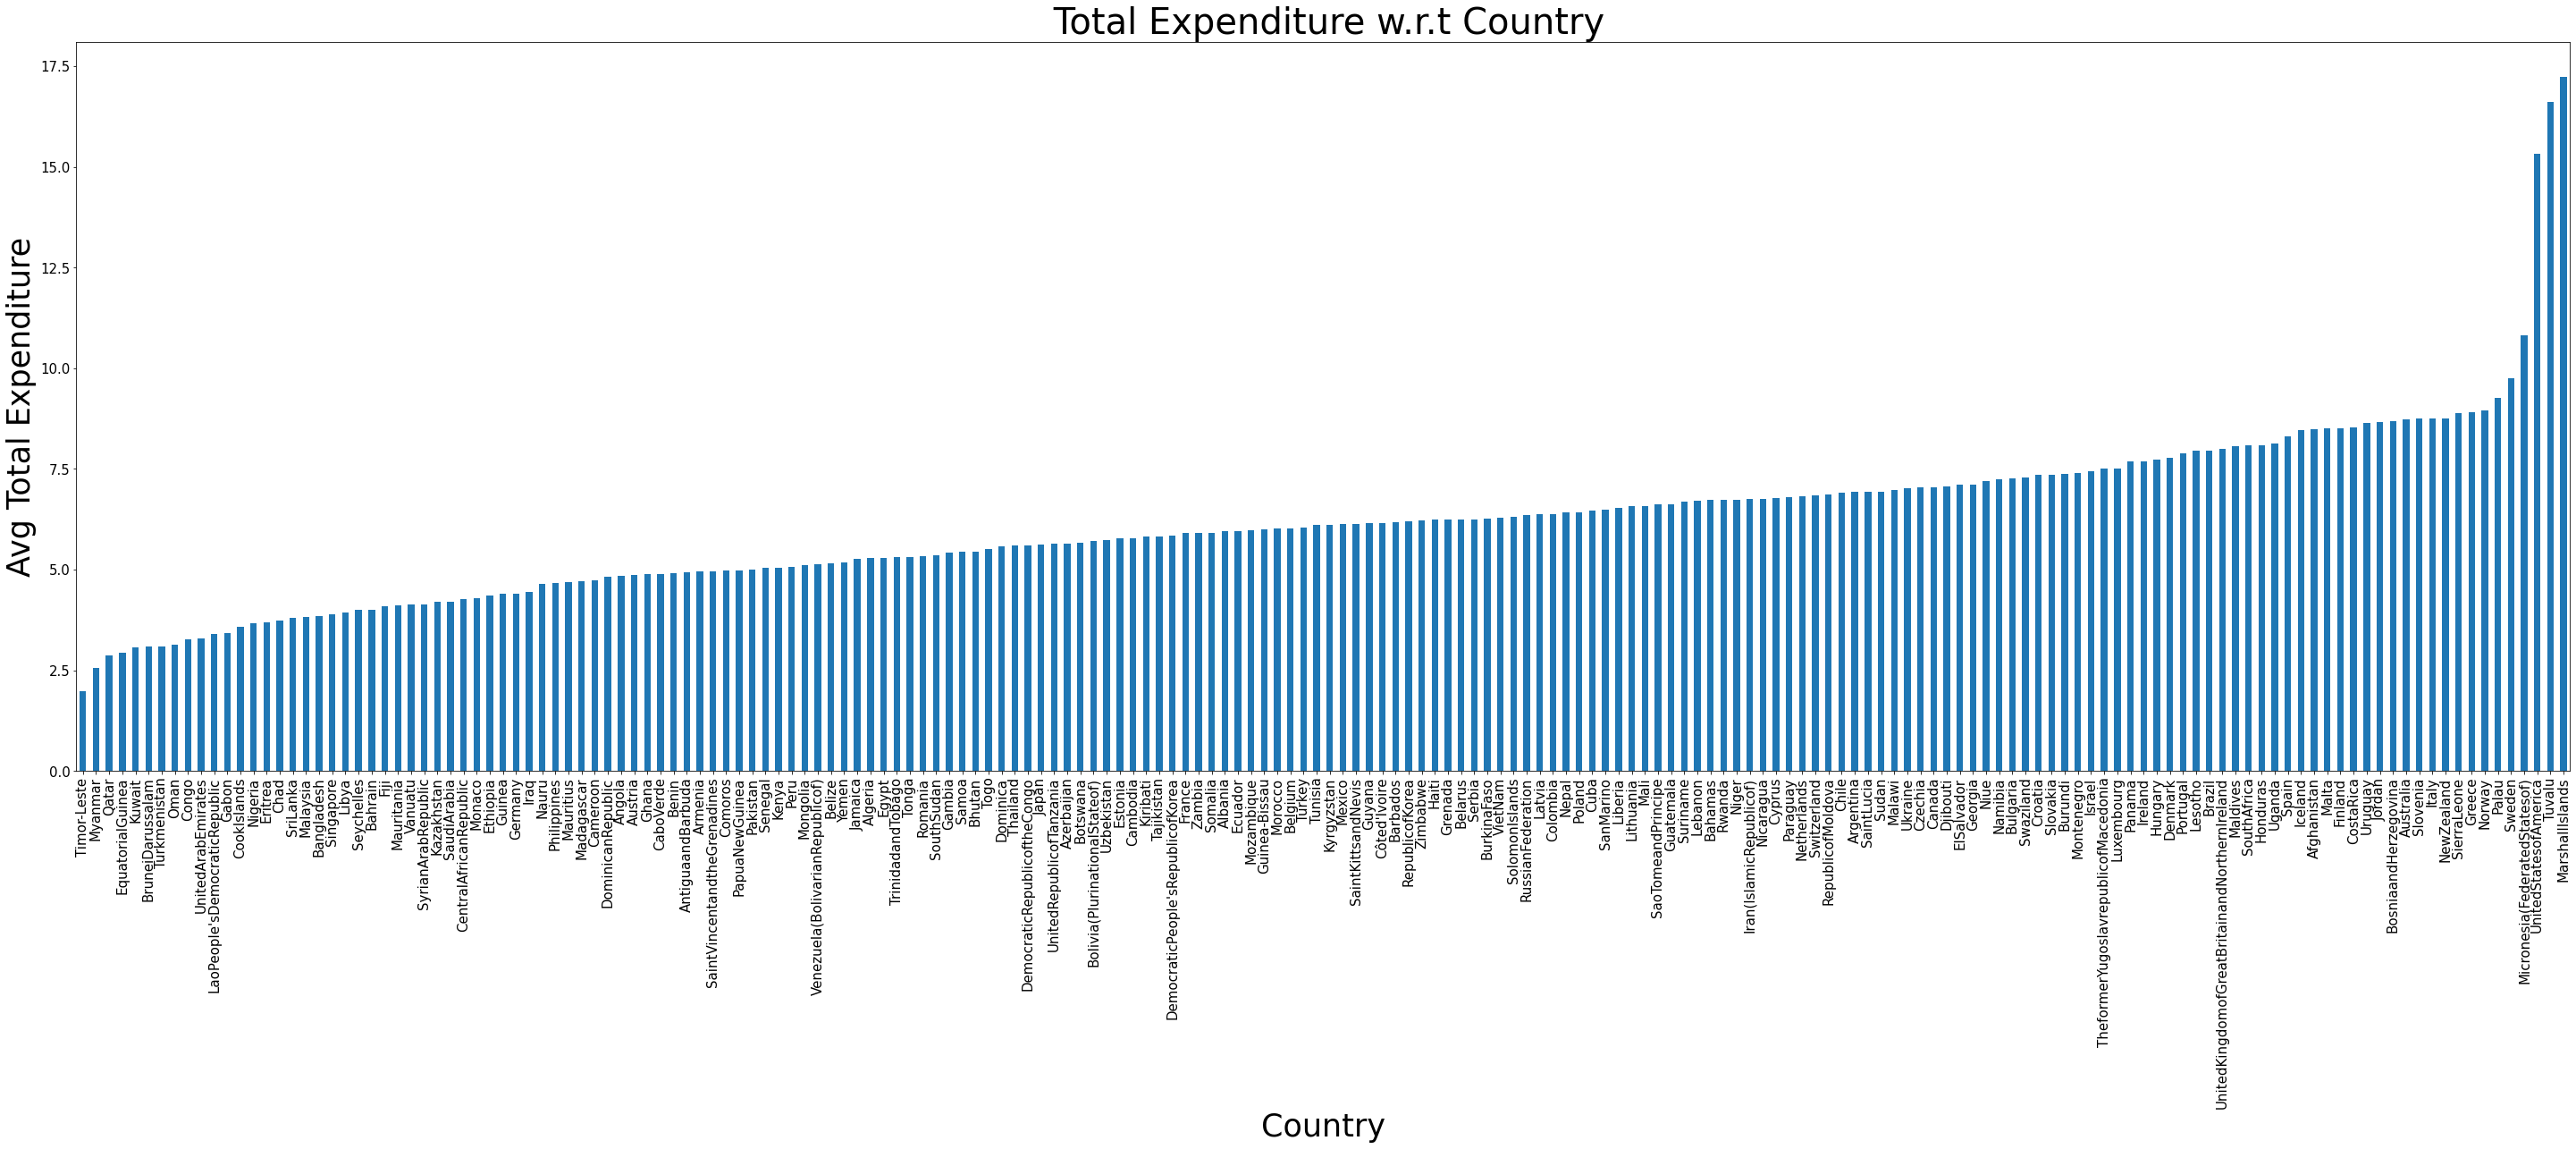

In [85]:
le_country = df.groupby('country')['total_expenditure'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title(" Total Expenditure w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Total Expenditure",fontsize=35)
plt.show()


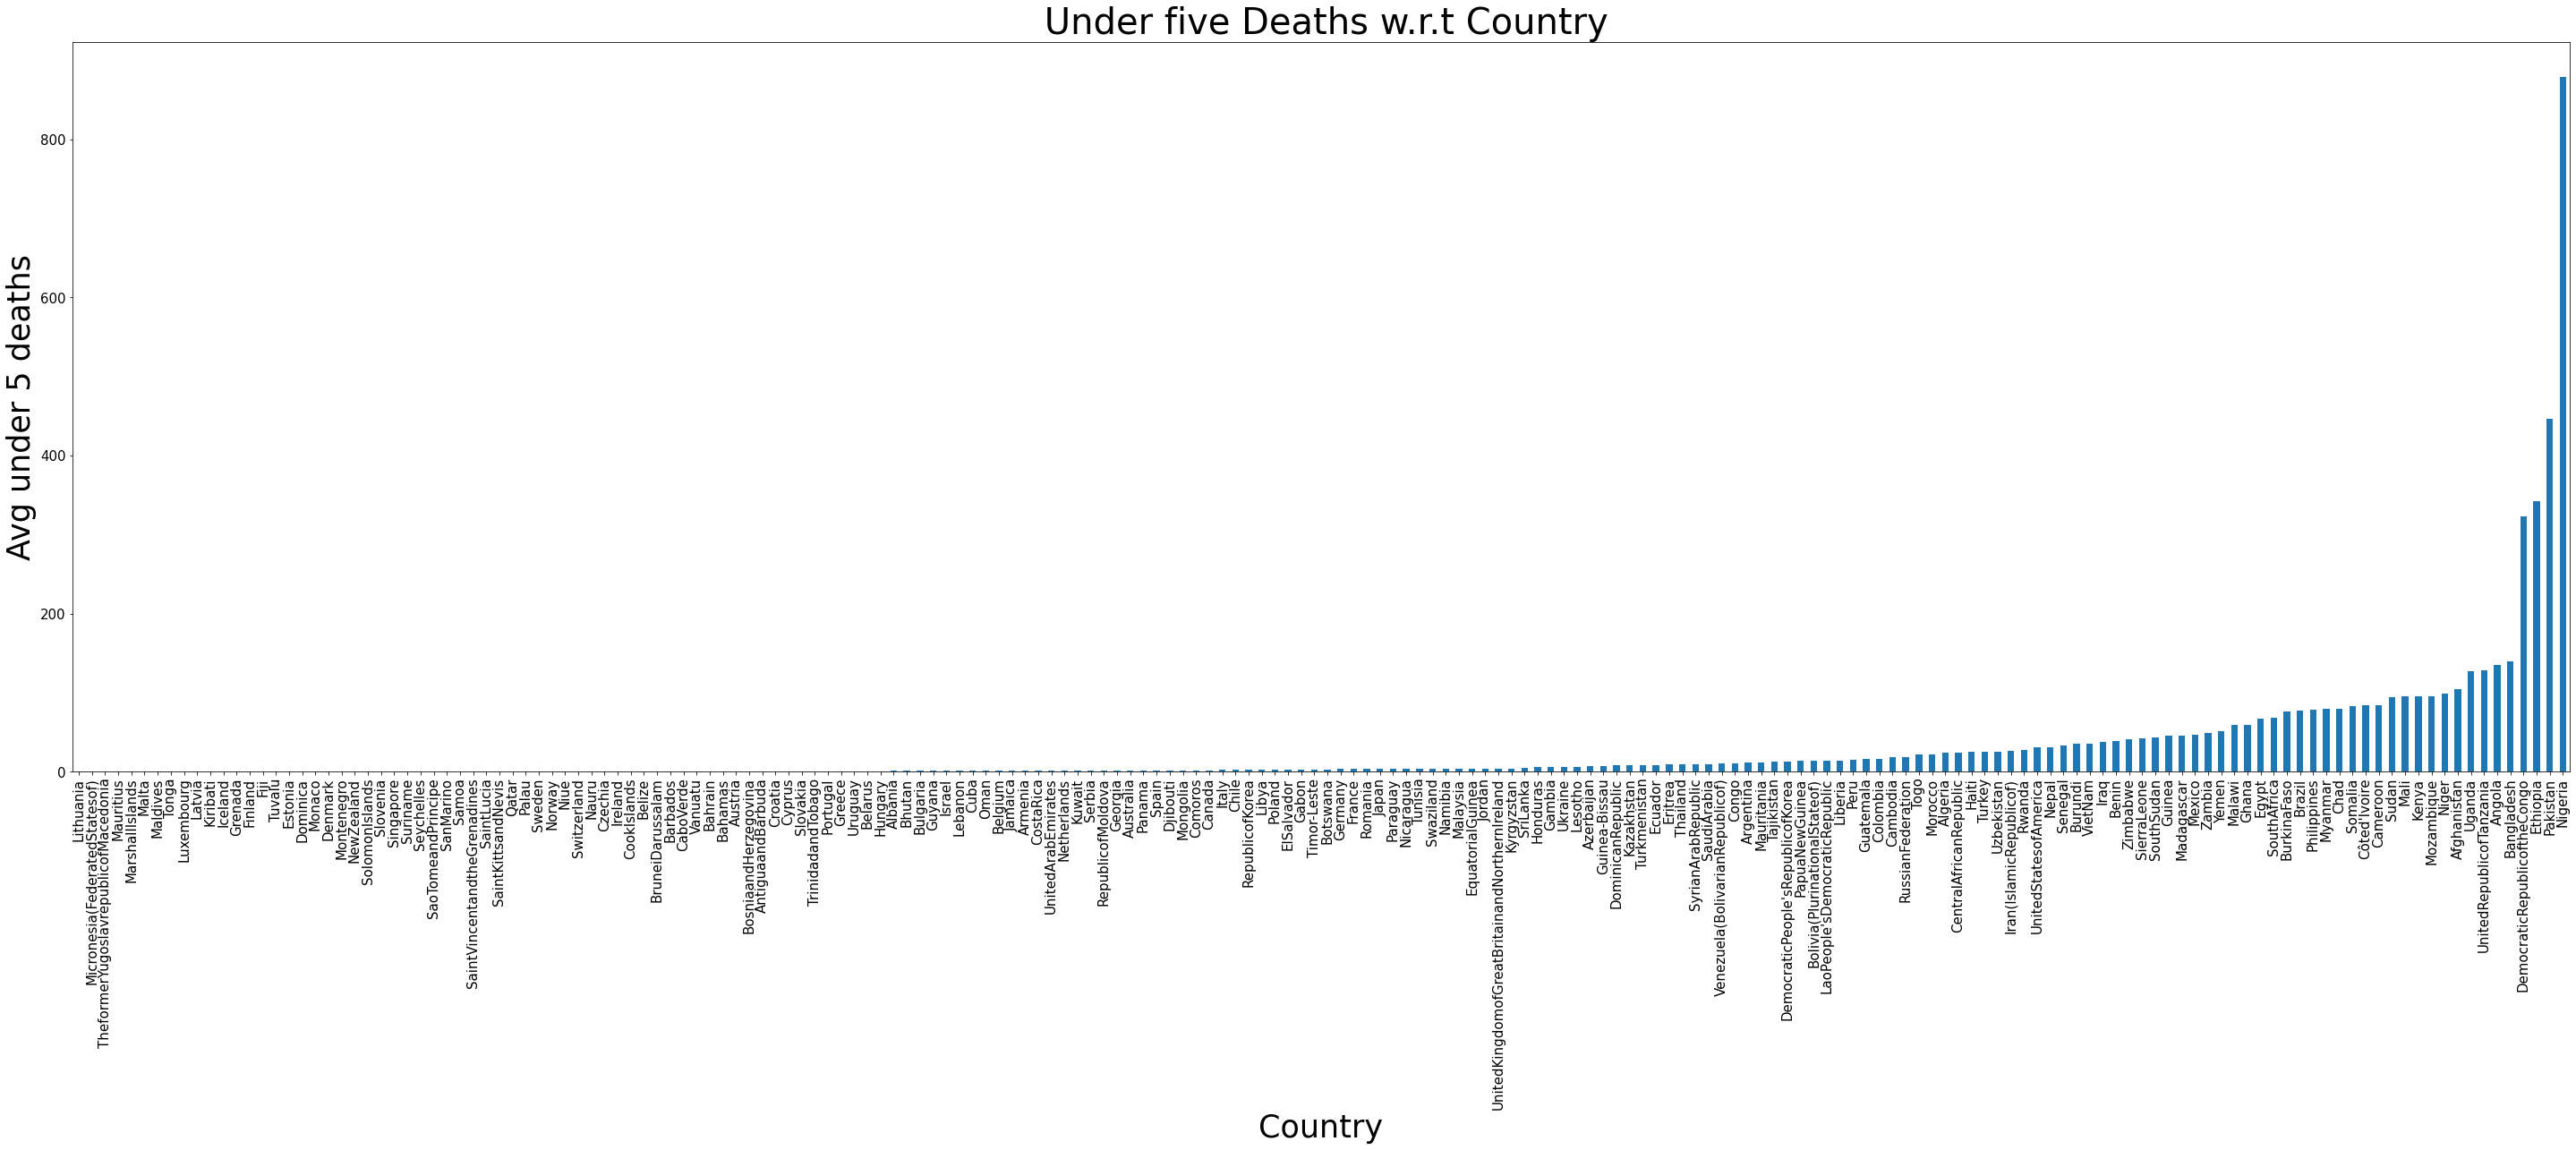

In [86]:
le_country = df.groupby('country')['under_five_deaths'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=15)
plt.title(" Under five Deaths w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg under 5 deaths",fontsize=35)
plt.show()

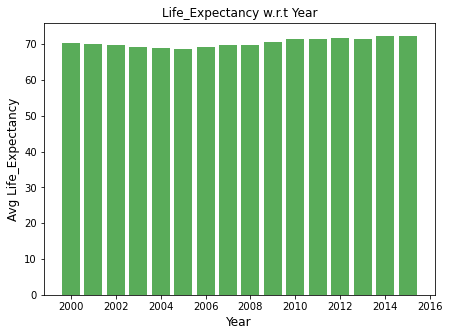

In [87]:
plt.figure(figsize=(7,5))
plt.bar(df.groupby('year')['year'].count().index,df.groupby('year')['life_expectancy'].mean(),color='green',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

# Let's answer the following questions one by one:

## How do Infant and Adult mortality rates affect life expectancy?
## What is the impact of schooling on the lifespan of humans?
## Does Life Expectancy have a positive or negative relationship with drinking alcohol?
## How different dieseases affect life expectancy in developed and developing countries?

# A)The correlation between infant mortality rate and adult mortality rate and the average lifespan is as follows:
#IMR and Lifespan: -0.196557
#AMR and Lifespan: -0.696359
#We see that the correlation between these two and average lifespan is negative, which means that if the infant mortality rate or the adult mortality rate rises, then the average lifespan decrease, which is quite intuitive

In [88]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

# b) Let's draw a scatter plot for Schooling vs Lifespan and the analyse it using the correlation coefficient

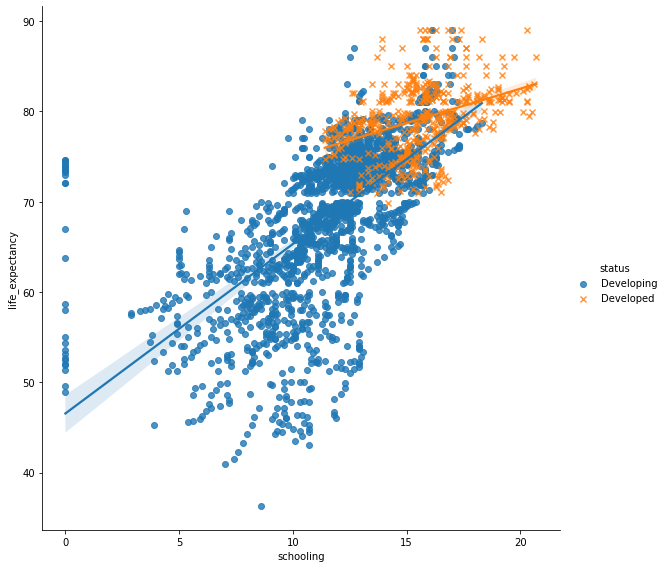

In [89]:
sns.pairplot(df, x_vars=["schooling"], y_vars=["life_expectancy"],
             hue="status",markers=["o", "x"], height=8, kind="reg");

# We can see that schooling has a very strong direct correlation with the average lifespan, with a Pearson's correlation coefficient of 0.75. This may be due to the fact that schooling teaches many things about a healthy lifestyle and even first aids, which can be life saving in critical conditions

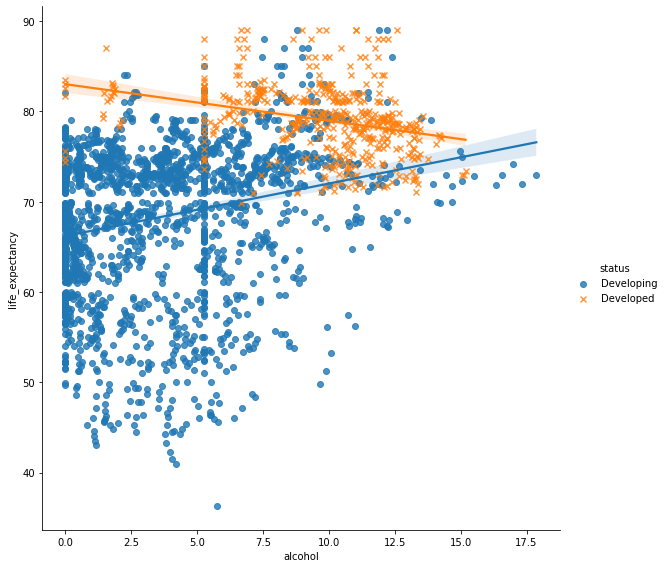

In [90]:
# Let's see the correlation between the life expectancy and various lifestyle habits like Alcohol.
#Alcohol and Lifespan: 0.390487
#So, we can say that alcohol affects the life expectancy upto some extent as seen by the correlation coefficient!
sns.pairplot(df, x_vars=["alcohol"], y_vars=["life_expectancy"],
             hue="status",markers=["o", "x"], height=8, kind="reg")

# c)Let's see the correlation between the life expectancy and various lifestyle habits like Alcohol.
# Alcohol and Lifespan: 0.390487
# So, we can say that alcohol affects the life expectancy upto some extent as seen by the correlation coefficient!
## I’m guessing that this is due to the fact that only wealthier countries can afford alcohol or the consumption of alcohol is more prevalent among wealthier populations.
## That is why developing countries and alcohol have positive relation and developed countries and alcohol have negative

# There is a slight decrease in the life expectancy value in case of developed countries whereas in case of Developed countries the life expectancy value is gradually rising which means that developing countries are taking measures for setting up vaccine of hepatitis B

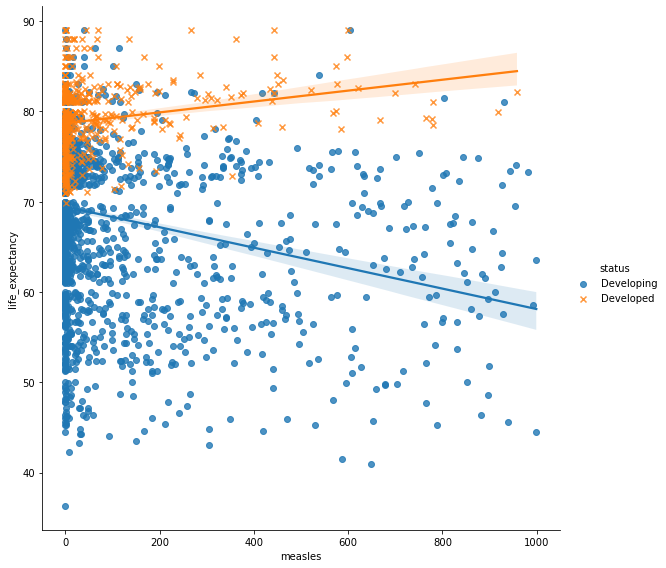

In [91]:
sns.pairplot(df, x_vars=["measles"], y_vars=["life_expectancy"],
             hue="status",markers=["o", "x"], height=8, kind="reg");


# In case of Measles, according to the graph the developed countries seems to have vaccines available to tackle measles whereas developing countries life expectancy values is decreasing day by day maybe because of lack of resources to handle measles

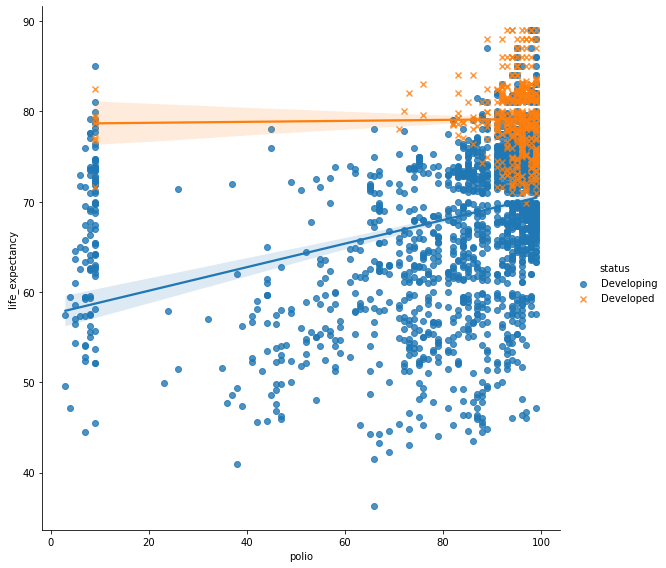

In [92]:
sns.pairplot(df, x_vars=["polio"], y_vars=["life_expectancy"],
             hue="status",markers=["o", "x"], height=8, kind="reg");


# Developed countries seems to have successfully eradicated polio diesease because of vaccines whereas in developing countries there was low expectancy value initially but now it is gradually increasing maybe because of proper doses being given

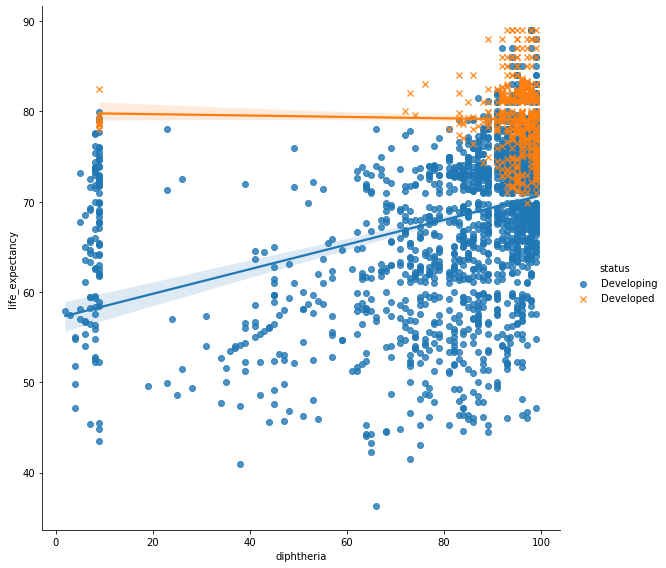

In [93]:
sns.pairplot(df, x_vars=["diphtheria"], y_vars=["life_expectancy"],
             hue="status",markers=["o", "x"], height=8, kind="reg");

# Developed countries seems to have successfully eradicated diptheria diesease because of vaccines whereas in developing countries there was low expectancy value initially but now it is gradually increasing maybe because of proper doses being given

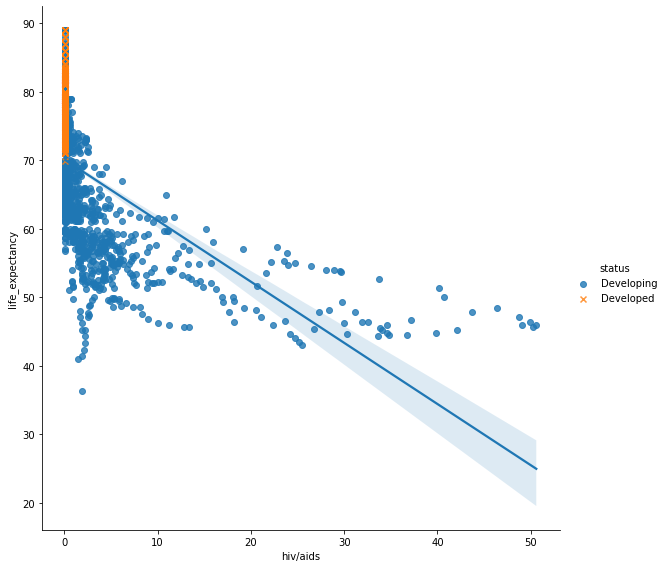

In [94]:
sns.pairplot(df, x_vars=["hiv/aids"], y_vars=["life_expectancy"],
             hue="status",markers=["o", "x"], height=8, kind="reg");


# The graph shows that developing countries still have not been able to handle hiv/aids at all as the life expectancy value is decreasing at a rapid range. This can be due to rising population and no education been given


# conclusions :-

# The dataset although collected by WHO contained a lot of missing values and we saw that most of the missing values were from the countries with very less population and were data collection is a very tedious task.
## A lot of outliers were detected which were dealt by Winsorization
## Japan although being hit badly by world war II came back very strong and is currently the country with the highest life expectancy followed by Sweden which is a big Achievement.
## We largely saw how developing countries have very less life expectancy when we see diseases like HIV/AIDS, polio etc and how Schooling plays a big role in increasing the life expectancy of developing countries as people become much more educated and help improve the welfare and healthcare of the country along with economy
## Alcoholism is a big issue in the developed country where people have good amount of money to spend and this shows how careless are people in terms of their health when it comes to alcoholism

# Recommendations-

# ##1)  The Developed countries should help developing countries in eradicating the diseases which are affecting the life of the people by providing vaccinations
## 2)The government should focus more on the schooling of the kids which will become face of the country in future and provide them with good food and educate them properly.
## 3)The governemnt of developing countries should launch various schemes to motivate people to send their kids to schools
## 4)Government should organize free healthcare camps to provide free vaccinations for the needy and poor people so that they dont have to spend their precious money and they also stay healthy to treat their families well.
## 5)The government should increase the subsidiy on liquor and increase healthcare and welfare camps to generate awareness among people, how band overdrinking is and how it affects your body.
## 6)WHO should with the help of developed nations should help the governemnt of developing countries in providing free food and education and organize healthcare camps


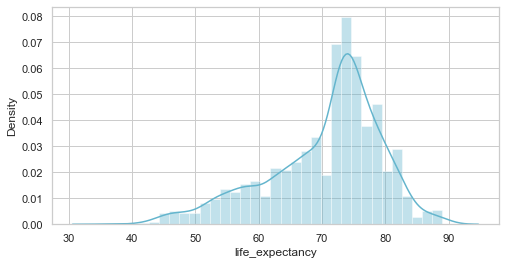

In [95]:
# Before proceeding with machone learning model lets have a look at the distribution of our 'Y'
sns.set(style='whitegrid')
f,ax = plt.subplots(1,1,figsize = (8,4))
ax = sns.distplot(df['life_expectancy'], kde = True, color = 'c')

# Model buidling 

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
Linear_model= LinearRegression()
Linear_model.fit(X_train,y_train)
Linear_model.score(X_train,y_train)

0.9646028582664359

## Model evaluation 

In [97]:
# Let's find the R2 score (Coefficient of determination) 
# The coefficient of determination, denoted as 𝑅², tells you which amount of variation in 𝑦 can be explained
# by the dependence on 𝐱 using the particular regression model. 
# Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.
from sklearn.metrics import r2_score
predictions = Linear_model.predict(X_test)
r2_score(y_test, predictions) #

0.921051361423803

In [98]:
# MSE (Mean Squared Error) represents the difference between the original and predicted values extracted
# by squared the average difference over the data set.
mean_squared_error(y_test, predictions, squared=False)


2.5893209864808187

In [99]:
# RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
import math
math.sqrt(mean_squared_error(y_test, predictions, squared=False))

1.6091367208788752

In [100]:

# MAE (Mean absolute error) represents the difference between the original and predicted values extracted 
#by averaged the absolute difference over the data set.
mean_absolute_error(y_test, predictions)

1.305058695874495

In [101]:
Linear_model.score(X_train, y_train)

0.9646028582664359

In [110]:
print('intercept:',Linear_model.intercept_)

intercept: -9473.471288329034


In [111]:
print('slope:', Linear_model.coef_)

slope: [ 2.41922817e-01 -7.82767545e-04  5.43977656e-01 -6.11164122e-02
  1.52786220e-04 -2.90817011e-03 -5.51903881e-04 -4.24750074e-01
  5.65809447e-03 -4.00873091e-02  4.10820383e-03 -2.80799689e-01
 -1.58460015e-05 -3.87251331e-09 -1.39954532e-02  4.98165572e-02
 -2.14535662e-01  7.92068618e-02  1.33971525e+01  1.06070991e+01
 -1.13219471e+00  1.36735751e+01  1.27324585e+01  1.13030991e+01
  9.06814643e+03  9.06845066e+03  9.06790947e+00  1.28889101e+01
  1.35506403e+01  6.40694439e+00  1.27733490e+01  8.46574648e+00
  9.06780949e+03  7.50512063e+00 -4.36810404e-01  3.87402623e+00
  5.14294132e+00  1.44435771e+01 -1.06109069e+00  7.87743933e+00
  1.41670147e+01  9.06004640e+03  3.71082626e+00 -3.00897710e+00
  1.04721125e+01  3.19309822e+00  1.37663626e+00  1.94187360e+01
 -8.43009534e+00 -1.73624859e-01  1.77235857e+01  1.11413827e+01
  5.32560975e-02  9.91957215e-01  8.68706465e+00  1.67804323e+01
  9.06336808e+03  1.58517862e+01  9.06695936e+03  9.06415348e+03
 -6.44155137e+00  

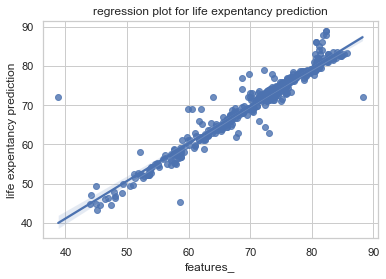

In [112]:
sns.regplot(x=predictions, y=y_test)
plt.xlabel('features_')
plt.ylabel('life expentancy prediction')
plt.title('regression plot for life expentancy prediction');